In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [274]:
# show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [275]:
common_data_set = pd.read_csv('common_data_set.csv')
ucla_grades = pd.read_csv('ucla_grades.csv')
berkeley_grades = pd.read_csv('berkeley_grades.csv')
common_data_set.head(20)

common_data_set.head(10) # prints first 10 rows
common_data_set # since this only has 17 rows, we can just print the whole thing

year       school  total_applied  total_accepted  uw_gpa_avg  sat_25  \
0   2019         UCLA         108831           13432       3.900  1290.0   
1   2020         UCLA         108877           15602       3.900  1290.0   
2   2021         UCLA         139490           15028       3.920     NaN   
3   2022         UCLA         149815           12844       3.930     NaN   
4   2023         UCLA         145910           12737       3.930     NaN   
5   2024         UCLA         146276           13114       3.930     NaN   
6   2020  UC Berkeley          87398           14676       3.930  1330.0   
7   2021  UC Berkeley         112846           16410       3.867     NaN   
8   2022  UC Berkeley         128226           14614       3.900     NaN   
9   2023  UC Berkeley         125916           14769       3.900     NaN   
10  2024  UC Berkeley         124245           13714       3.900     NaN   
11  2019      Hravard          43330            2009         NaN     NaN   
12  2020      Hravard          40248            2015         NaN     NaN   
13  2021      Harvard          57786            2318         NaN     NaN   
14  2022      Harvard          61221            1984         NaN     NaN   
15  2023      Harvard          56937            1965         NaN     NaN   
16  2024      Harvard          54008            1970         NaN     NaN   

    sat_avg  sat_75  act_25  act_avg  act_75  sat_math_25  sat_math_75  \
0       NaN  1510.0    27.0      NaN    34.0        640.0        790.0   
1       NaN  1510.0    29.0      NaN    34.0        640.0        780.0   
2       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
3       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
4       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
5       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
6    1430.0  1520.0    28.0     31.0    34.0        670.0        790.0   
7       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
8       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
9       NaN     NaN     NaN      NaN     NaN          NaN          NaN   
10      NaN     NaN     NaN      NaN     NaN          NaN          NaN   
11      NaN     NaN    33.0      NaN    35.0        750.0        800.0   
12      NaN     NaN    33.0      NaN    35.0        740.0        800.0   
13      NaN     NaN    33.0      NaN    36.0        750.0        800.0   
14      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
15      NaN     NaN    34.0     35.0    36.0        760.0        800.0   
16      NaN     NaN    34.0     35.0    36.0        770.0        800.0   

    sat_english_25  sat_english_75  act_math_25  act_math_75  act_english_25  \
0            640.0           740.0         26.0         34.0            27.0   
1            650.0           740.0         27.0         34.0             NaN   
2              NaN             NaN          NaN          NaN             NaN   
3              NaN             NaN          NaN          NaN             NaN   
4              NaN             NaN          NaN          NaN             NaN   
5              NaN             NaN          NaN          NaN             NaN   
6            640.0           740.0         27.0         35.0            28.0   
7              NaN             NaN          NaN          NaN             NaN   
8              NaN             NaN          NaN          NaN             NaN   
9              NaN             NaN          NaN          NaN             NaN   
10             NaN             NaN          NaN          NaN             NaN   
11           710.0           770.0         31.0         36.0            34.0   
12           720.0           780.0         31.0         35.0            35.0   
13           730.0           780.0         32.0         35.0            35.0   
14           730.0           780.0         32.0         35.0            35.0   
15           740.0    

#### Cleaning CDS

In [276]:
# Look at the general information of the dataframe
common_data_set.shape

# Look at data types of each column
common_data_set.dtypes

year                int64
school             object
total_applied       int64
total_accepted      int64
uw_gpa_avg        float64
sat_25            float64
sat_avg           float64
sat_75            float64
act_25            float64
act_avg           float64
act_75            float64
sat_math_25       float64
sat_math_75       float64
sat_english_25    float64
sat_english_75    float64
act_math_25       float64
act_math_75       float64
act_english_25    float64
act_english_75    float64
top_10p            object
top_25p            object
top_50p            object
bottom_50p         object
bottom_25p         object
uw_gpa_400         object
uw_gpa_375_399     object
uw_gpa_350_374     object
uw_gpa_325_349     object
uw_gpa_300_324     object
uw_gpa_100_299     object
dtype: object

In [277]:
# Change "Hravard" to "Harvard"
common_data_set['school'] = common_data_set['school'].replace('Hravard', 'Harvard') # replace function

# # Get rid of all % signs
common_data_set = common_data_set.replace('%', '', regex = True)

# # Change column type to floats
s = common_data_set.select_dtypes(include='object').columns # use select_dtypes to get the object columns
s = s.drop('school') # get rid of the school column
common_data_set[s] = common_data_set[s].astype("float") # change dtype to float
print(common_data_set.dtypes) # check!
common_data_set.tail(7)

# drop the gpa "top" whatever column 
common_data_set = common_data_set.drop(columns=['top_10p', 'top_25p', 'top_50p', 'bottom_50p', 'bottom_25p'])
# common_data_set.tail()

year                int64
school             object
total_applied       int64
total_accepted      int64
uw_gpa_avg        float64
sat_25            float64
sat_avg           float64
sat_75            float64
act_25            float64
act_avg           float64
act_75            float64
sat_math_25       float64
sat_math_75       float64
sat_english_25    float64
sat_english_75    float64
act_math_25       float64
act_math_75       float64
act_english_25    float64
act_english_75    float64
top_10p           float64
top_25p           float64
top_50p           float64
bottom_50p        float64
bottom_25p        float64
uw_gpa_400        float64
uw_gpa_375_399    float64
uw_gpa_350_374    float64
uw_gpa_325_349    float64
uw_gpa_300_324    float64
uw_gpa_100_299    float64
dtype: object


#### UCLA Grades
Let's get rid of unnecessary rows

In [278]:
# getting rid of unnecessary rows

# we're only looking at STATS 10; 20; 100, 101, 102 series
ucla_grades.head()
# get rid of unnecessary white spaces
ucla_grades['ENROLLMENT TERM'] = ucla_grades['ENROLLMENT TERM'].str.strip().str.upper()
ucla_grades['SUBJECT AREA'] = ucla_grades['SUBJECT AREA'].str.strip().str.upper()
ucla_grades['CATLG NBR'] = ucla_grades['CATLG NBR'].str.strip().str.upper()
ucla_grades['GRD OFF'] = ucla_grades['GRD OFF'].str.strip().str.upper()
ucla_grades['INSTR NAME'] = ucla_grades['INSTR NAME'].str.strip().str.upper()
ucla_grades['LONG CRSE TITLE'] = ucla_grades['LONG CRSE TITLE'].str.strip().str.upper()

# # shorthand loop
for col in ['ENROLLMENT TERM', 'SUBJECT AREA', 'CATLG NBR', 'GRD OFF', 'LONG CRSE TITLE', 'INSTR NAME']:
    ucla_grades[col] = ucla_grades[col].astype(str).str.strip().str.upper()


# # get rid of the rows where CATLG NUB != 10, 20, 100A, 100B, 100C, 101A, 101B, 101C, 102A, 102B, 102C
classes_to_keep = ['10', '20', '100A', '100B', '100C', '101A', '101B', '101C', '102A', '102B', '102C']
ucla_grades = ucla_grades[ucla_grades['CATLG NBR'].isin(classes_to_keep)] 

# # see how many of each class are in the dataset
ucla_grades['CATLG NBR'].value_counts()

# # see the shape of the dataframe
ucla_grades.shape

ucla_grades['ENROLLMENT TERM'].unique()
ucla_grades['GRD OFF'].unique()

ucla_grades.head(50)

ENROLLMENT TERM SUBJECT AREA CATLG NBR GRD OFF  GRD COUNT  ENRL TOT  \
0              21F        STATS        10      A+         58       150   
1              21F        STATS        10       A         40       150   
2              21F        STATS        10      A-         23       150   
3              21F        STATS        10      B+          3       150   
4              21F        STATS        10       B          9       150   
5              21F        STATS        10      B-          6       150   
6              21F        STATS        10      C+          3       150   
7              21F        STATS        10       C          6       150   
8              21F        STATS        10      NP          1       150   
9              21F        STATS        10       P          1       150   
10             21F        STATS        10      A+         46       144   
11             21F        STATS        10       A         47       144   
12             21F        STATS        10      A-         13       144   
13             21F        STATS        10      B+          7       144   
14             21F        STATS        10       B         11       144   
15             21F        STATS        10      B-          6       144   
16             21F        STATS        10      C+          9       144   
17             21F        STATS        10       C          3       144   
18             21F        STATS        10      D+          1       144   
19             21F        STATS        10       P          1       144   
20             21F        STATS        10      A+         26       140   
21             21F        STATS        10       A         54       140   
22             21F        STATS        10      A-         15       140   
23             21F        STATS        10      B+          8       140   
24             21F        STATS        10       B          7       140   
25             21F        STATS        10      B-          5       140   
26             21F        STATS        10      C+          6       140   
27             21F        STATS        10       C          4       140   
28             21F        STATS        10      D+          2       140   
29             21F        STATS        10       D          1       140   
30             21F        STATS        10      D-          2       140   
31             21F        STATS        10       F          7       140   
32             21F        STATS        10       P          4       140   
33             21F        STATS        10      A+         37       138   
34             21F        STATS        10       A         53       138   
35             21F        STATS        10      A-          6       138   
36             21F        STATS        10      B+         13       138   
37             21F        STATS        10       B          4       138   
38             21F        STATS        10      B-          5       138   
39             21F        STATS        10      C+          2       138   
40             21F        STATS        10       C          3       138   
41             21F        STATS        10      C-          5       138   
42             21F        STATS        10      D+          2       138   
43             21F        STATS        10       D          1       138   
44             21F        STATS        10       F          2       138   
45             21F        STATS        10      NP          3       138   
46             21F        STATS        10       P          2       138   
47             21F        STATS        10      A+          1       149   
48             21F        STATS        10       A         30       149   
49             21F        STATS        10      A-         32       149   

                          LONG CRSE TITLE      INSTR NAME  
0   INTRODUCTION TO STATISTICAL REASONING      CHA, MARIA  
1   INTRODUCTION TO STATISTICAL REASONING      CHA, MARIA  
2   INTRODUCTION TO STATISTICAL REASONING      C

Get rid of grades that aren't letter grades

In [279]:
grades_to_remove = ['NP', 'P', 'I', 'S', 'DR']

# get rid of the rows with those those values
ucla_grades = ucla_grades[~ucla_grades['GRD OFF'].isin(grades_to_remove)].copy()

# combine classes with multiple lectures (eg 2 lectures taught by same instructor in the same quarter)
ucla_grades = (
    ucla_grades
    .groupby(['ENROLLMENT TERM', 'SUBJECT AREA', 'CATLG NBR', 'LONG CRSE TITLE', 'INSTR NAME', 'GRD OFF'], sort = False)
    .agg({'GRD COUNT': 'sum'})
    .reset_index()
)

# add up the total grades
ucla_grades['ENRL TOT'] = ucla_grades.groupby(
    ['ENROLLMENT TERM', 'SUBJECT AREA', 'CATLG NBR', 'LONG CRSE TITLE', 'INSTR NAME']
)['GRD COUNT'].transform('sum')


ucla_grades.head(50)
ucla_grades['GRD OFF'].unique()

array(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'D+', 'D', 'D-', 'F',
       'C-'], dtype=object)

In [280]:
berkeley_grades.head()
berkeley_grades['ENROLLMENT TERM'].unique()

# change the enrollment term to follow the formatting of UCLA
berkeley_grades['ENROLLMENT TERM'] = berkeley_grades['ENROLLMENT TERM'].replace({
    'Fall 2020': '20F',
    'Spring 2021': '21S',
    'Summer 2021': '211',
    'Fall 2021': '21F',
    'Spring 2022': '22S',
    'Summer 2022': '221',
    'Fall 2022': '22F',
    'Spring 2023': '23S',
    'Summer 2023': '231',
    'Fall 2023': '23F',
    'Spring 2024': '24S',
    'Summer 2024': '241',
    'Fall 2024': '24F',
    'Spring 2025': '25S',
    'Summer 2025': '251'})

berkeley_grades['ENROLLMENT TERM'].unique()
berkeley_grades.head()
berkeley_grades['GRD OFF'].unique()

array(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'F', 'D-', 'D',
       'D+'], dtype=object)

In [281]:
ucla_grades.to_csv('ucla_grades_cleaned.csv', encoding='utf-8', index=False)
berkeley_grades.to_csv('berkeley_grades_cleaned.csv', encoding='utf-8', index=False)
common_data_set.to_csv('common_data_set_cleaned.csv', encoding = 'utf-8', index=False)

#### Exploratory Data Analysis (EDA)

Purpose: stare at the data before we assume anything. We can't blindly go like "SAT has led to a decrease in GPA of those admitted," or simply find data that supports that hypothesis (confirmation bias). We must look at all the data fairly, and sometimes we'll find interesting patterns or patterns we don't expect! 

It's completely okay if we make a hypothesis and the data shows that there's nothing significant. For example, maybe GPAs have stayed relatively constant despite getting rid of SATs. If anything, you can imply that getting rid of SAT has not reduced the academic status of students here, or there could be a third variable in play! Usually, you would run statistics tests to prove causation but we learn that in the stats classes here so I will not be going over it. We're only going to look at CORRELATION.

#### Common Dataset Exploration


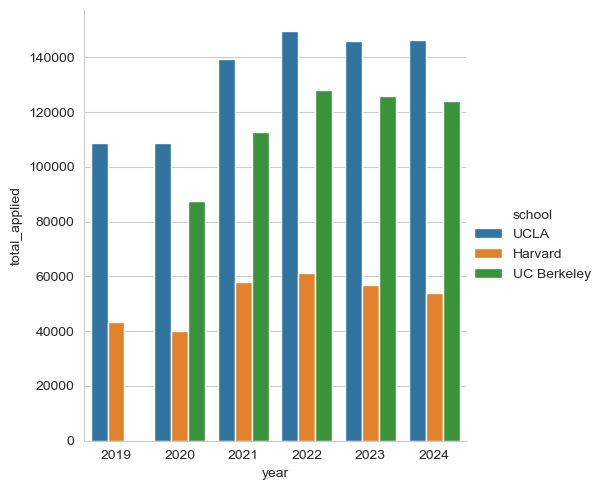

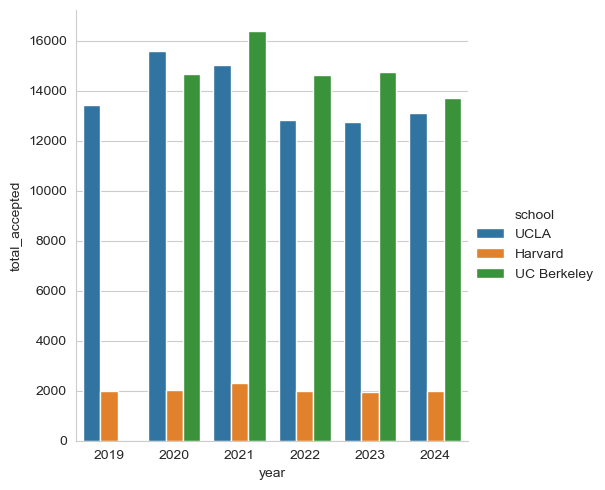

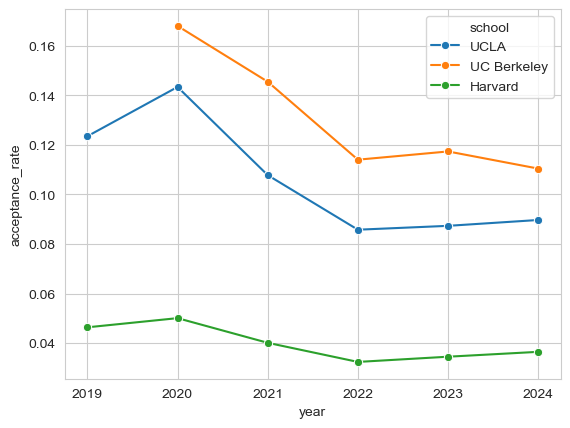

In [282]:
common_data_set
sns.catplot(data = common_data_set, x = 'year', y = 'total_applied', hue = 'school', kind = 'bar')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'total_accepted', hue = 'school', kind = 'bar')
plt.show()

common_data_set['acceptance_rate'] = common_data_set['total_accepted'] / common_data_set['total_applied']
sns.lineplot(data=common_data_set, x='year', y='acceptance_rate', hue='school', marker='o')
plt.show()

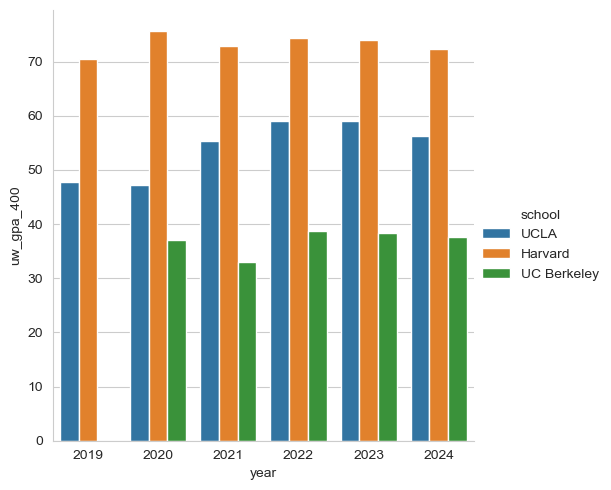

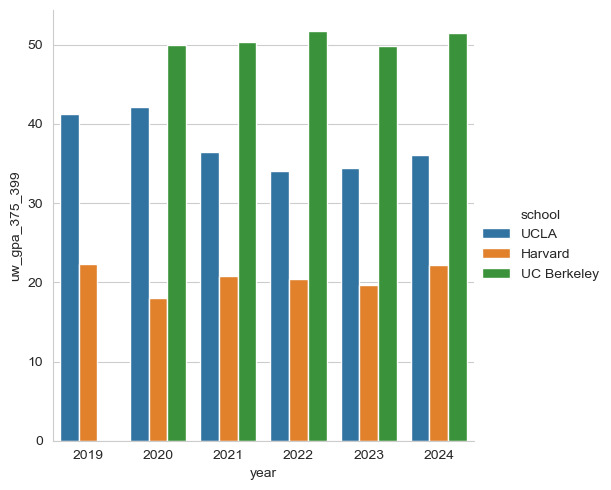

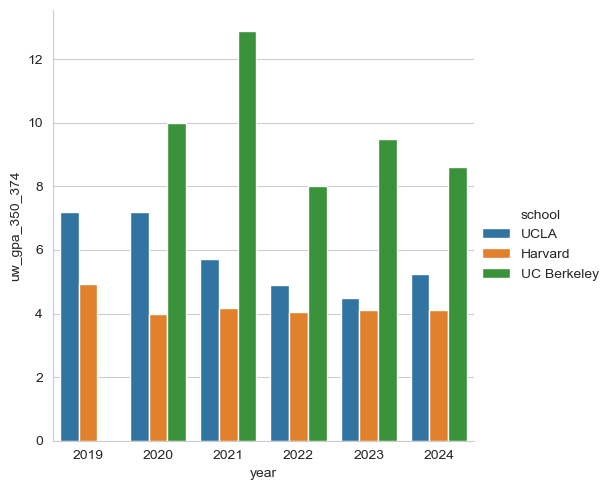

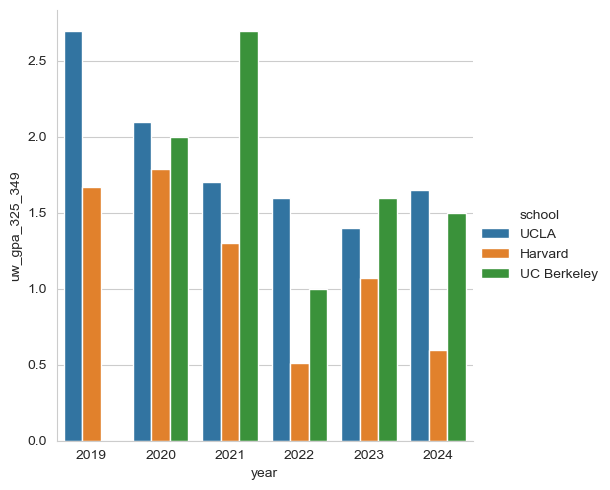

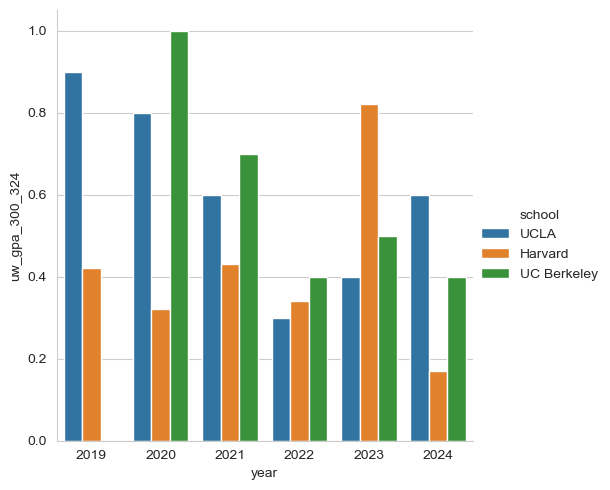

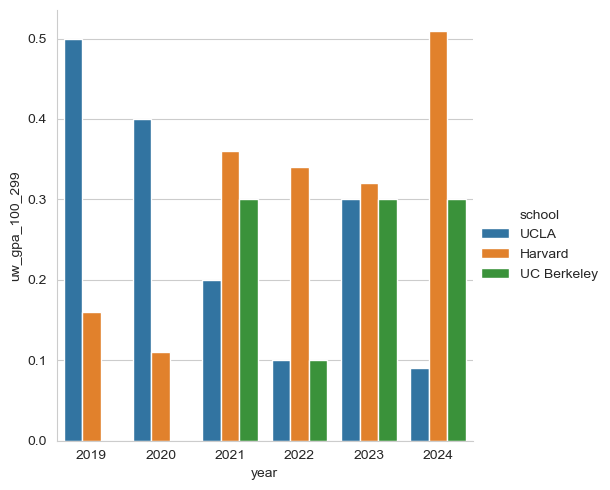

In [283]:
common_data_set

# look at the spread of gpa ranges
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_400', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_375_399', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_350_374', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_325_349', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data = common_data_set, x = 'year', y = 'uw_gpa_300_324', kind = 'bar', hue = 'school')
plt.show()
sns.catplot(data=common_data_set, x = 'year', y = 'uw_gpa_100_299', kind = 'bar', hue = 'school')

# do the same for the sats

#### Berkeley and UCLA Grades

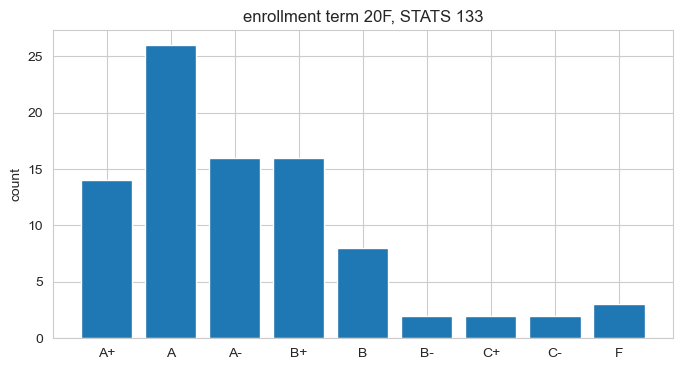

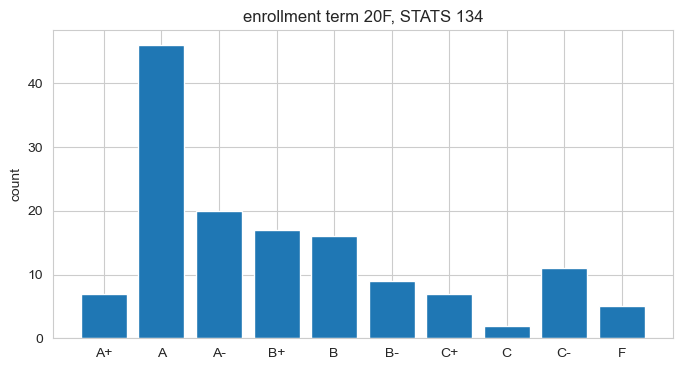

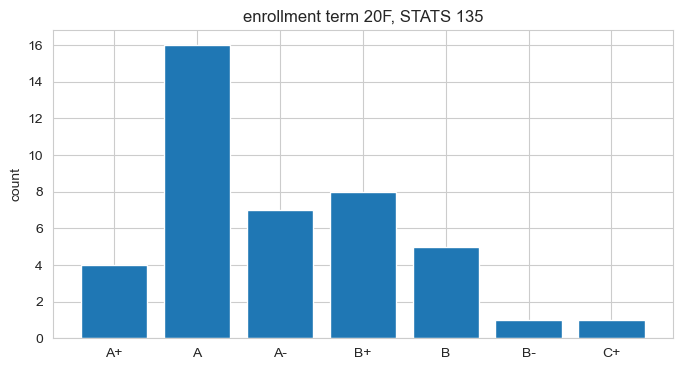

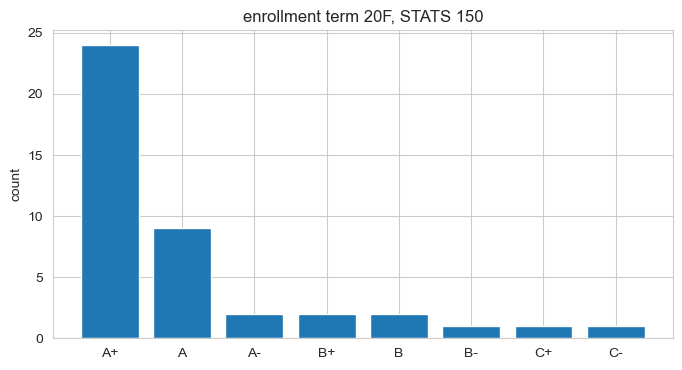

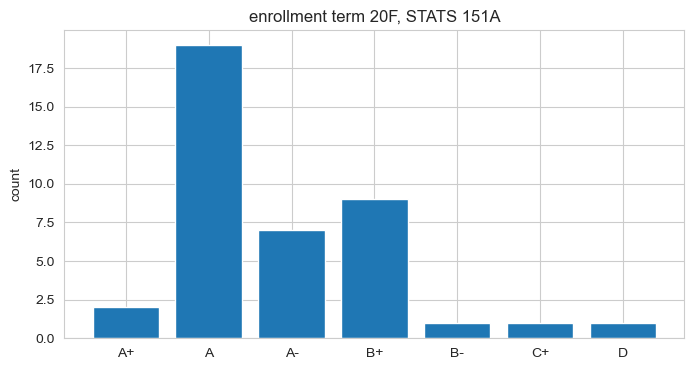

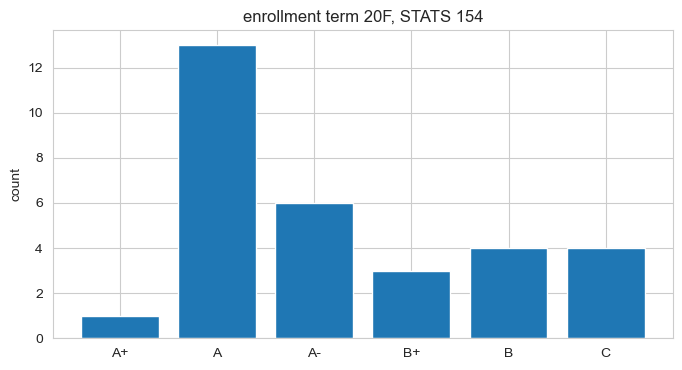

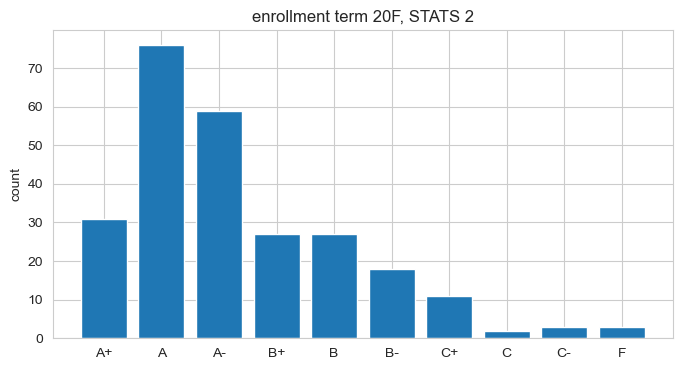

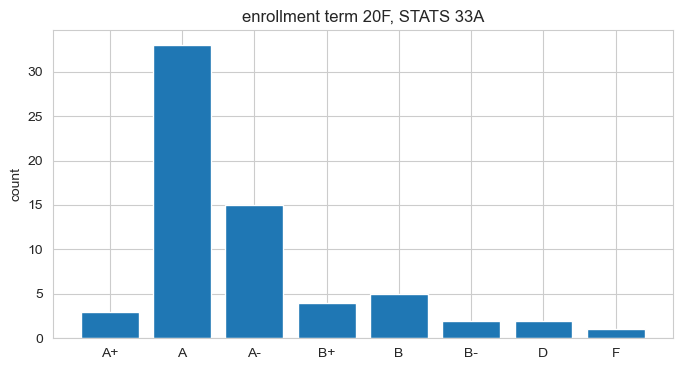

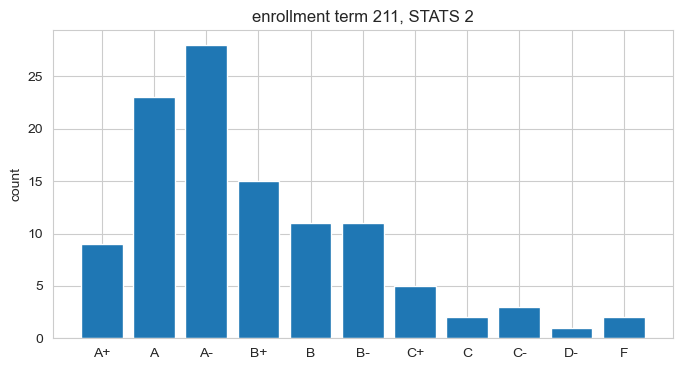

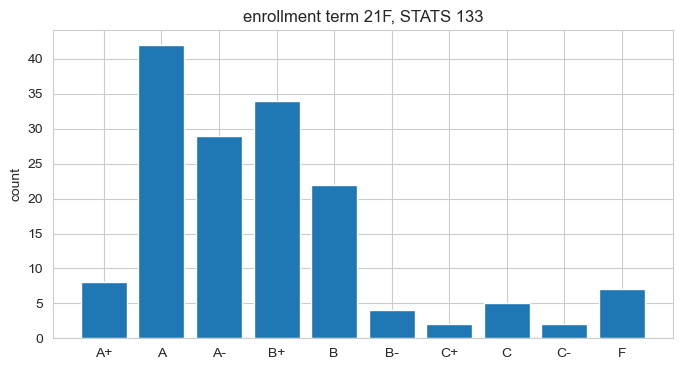

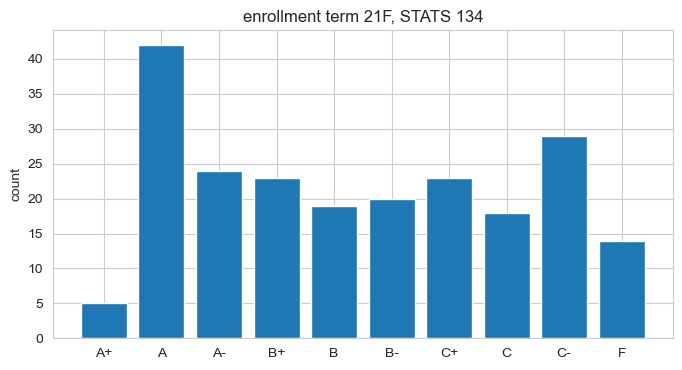

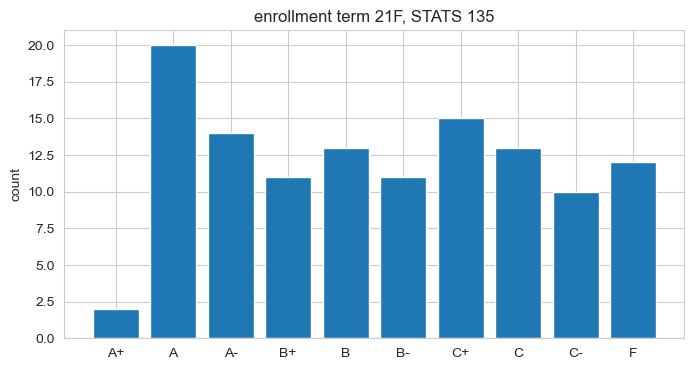

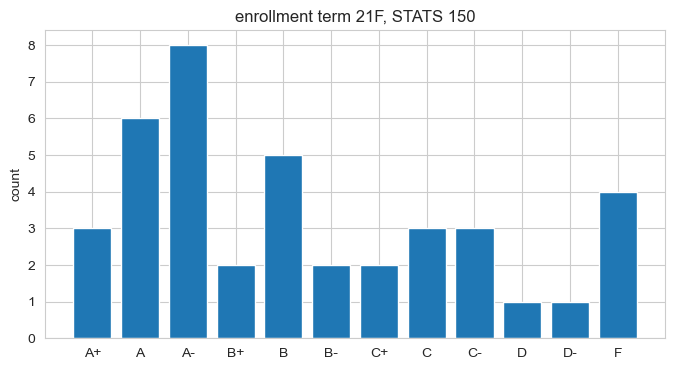

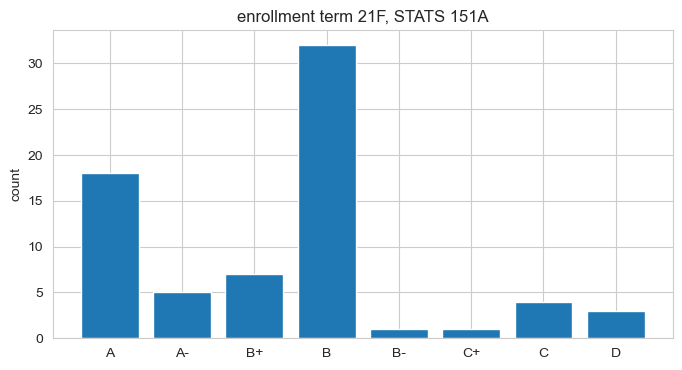

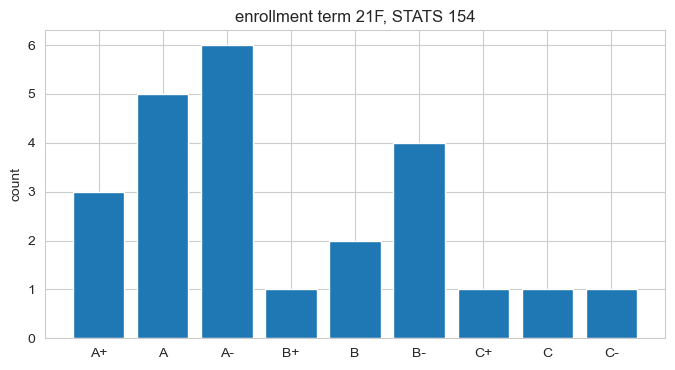

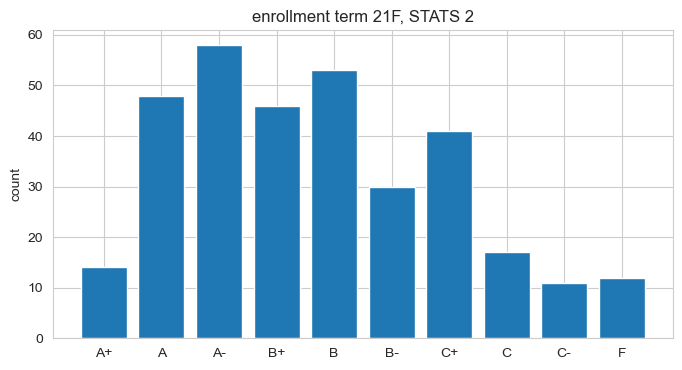

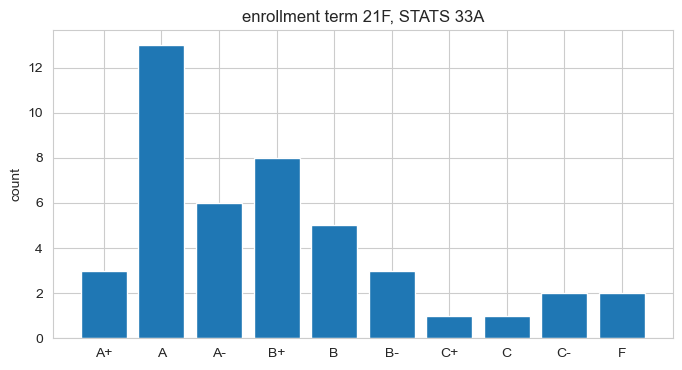

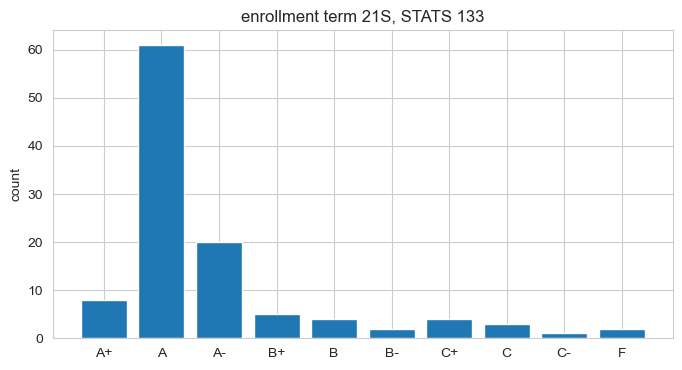

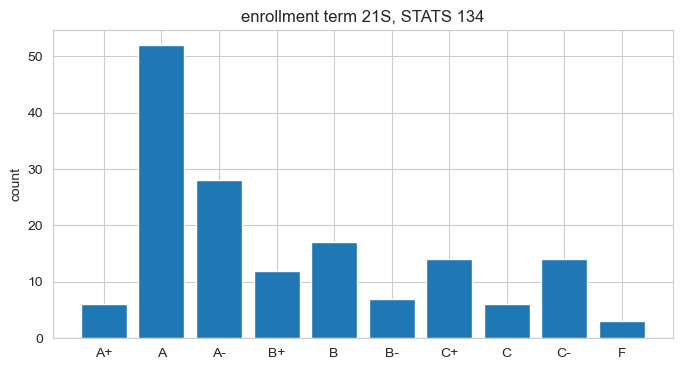

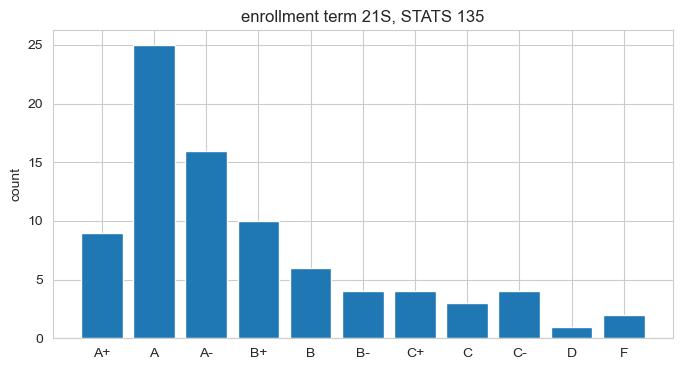

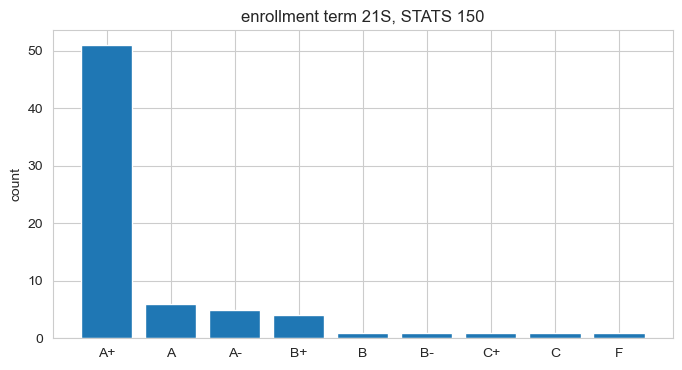

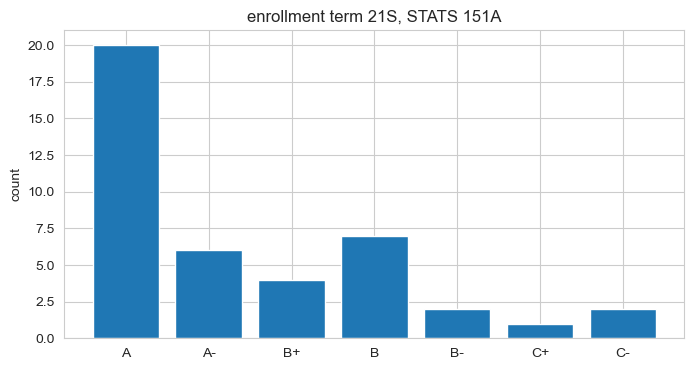

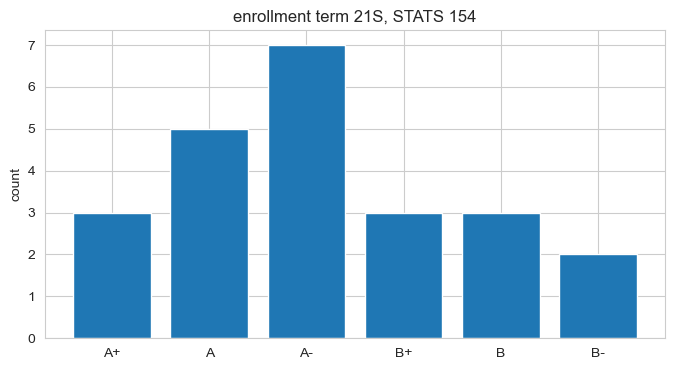

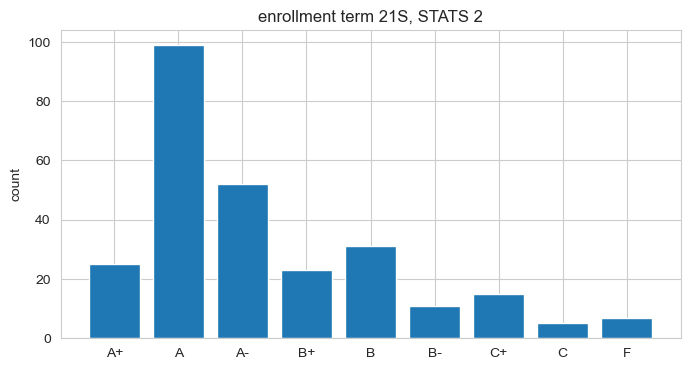

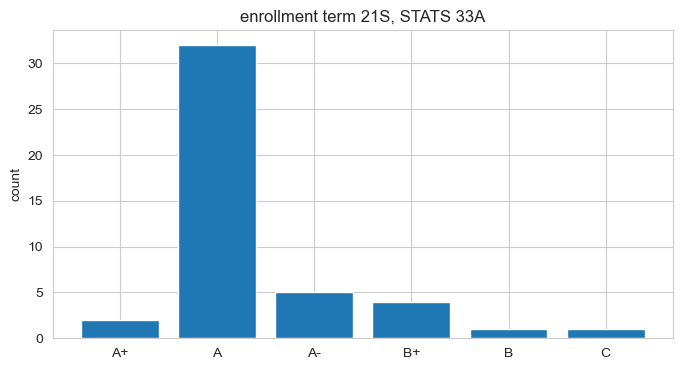

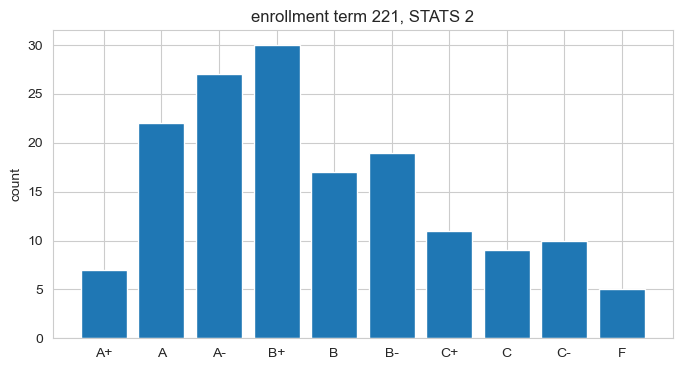

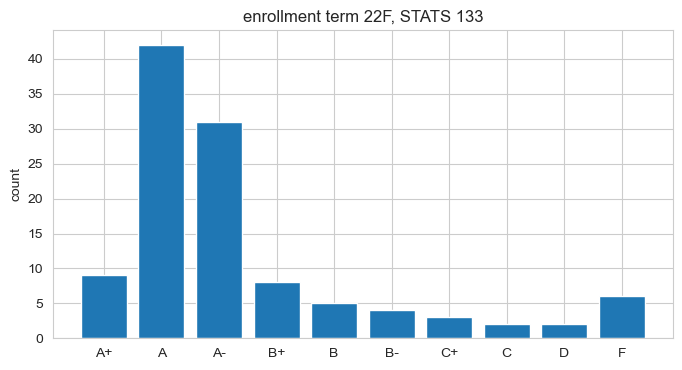

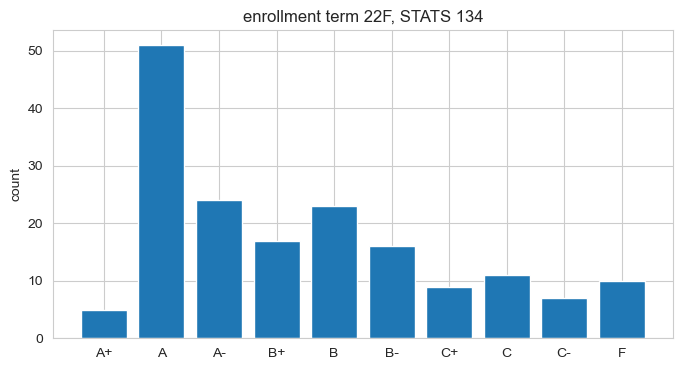

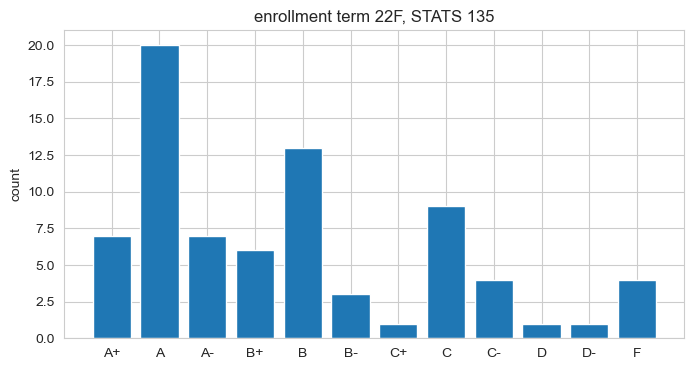

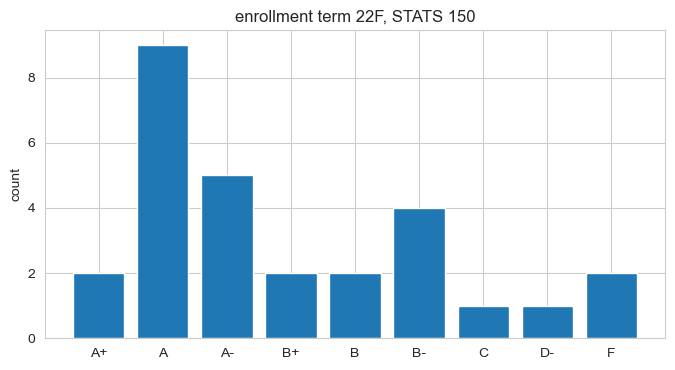

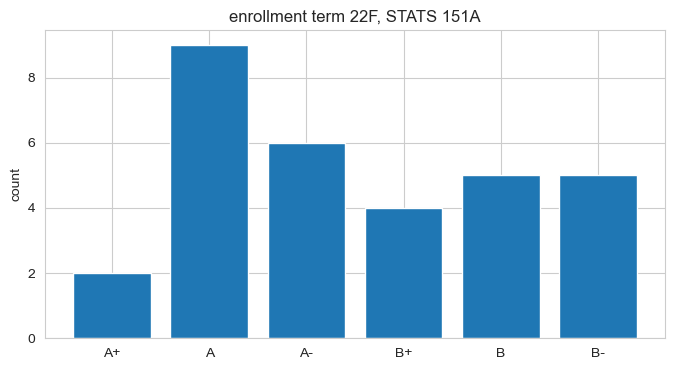

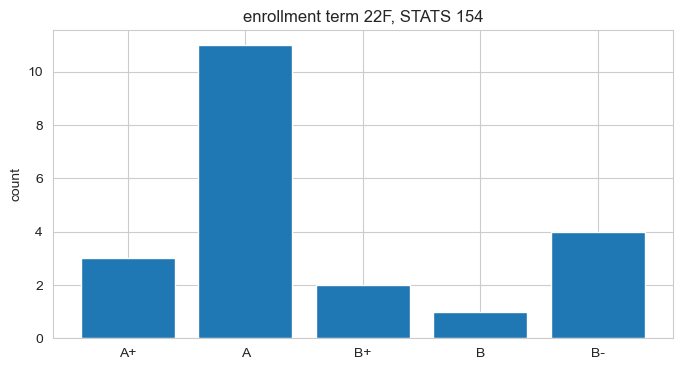

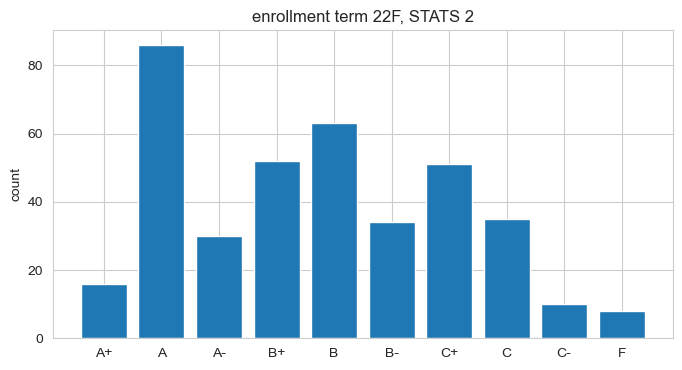

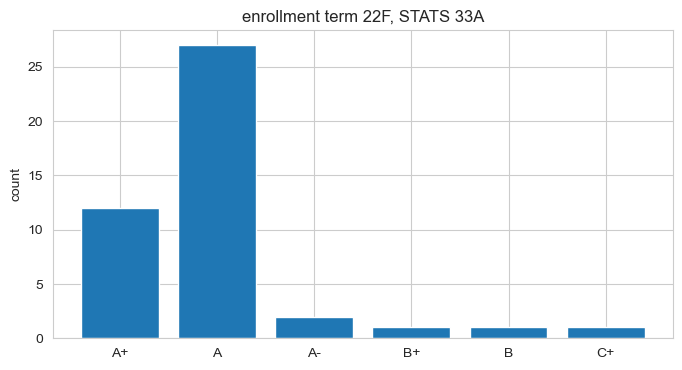

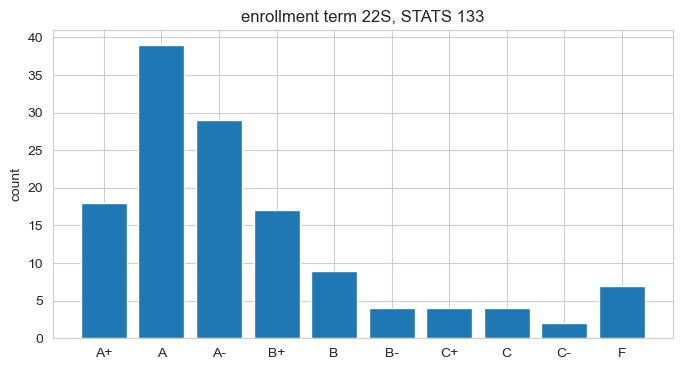

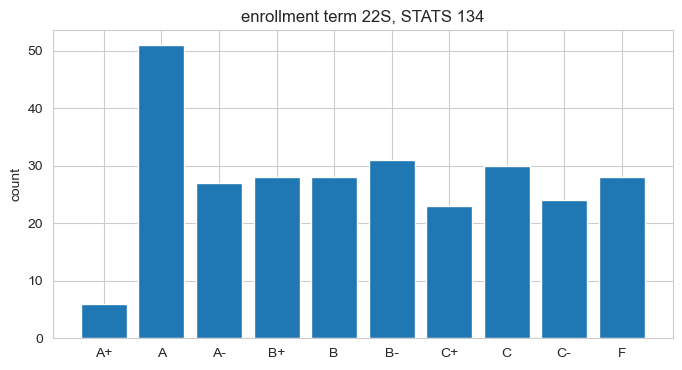

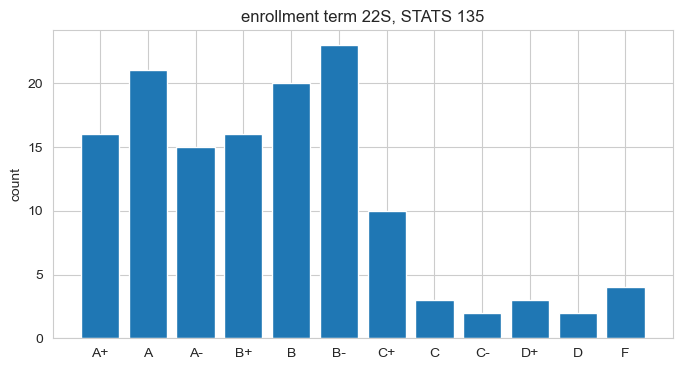

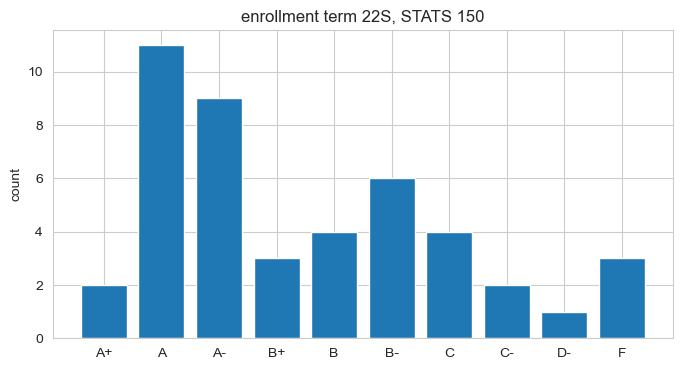

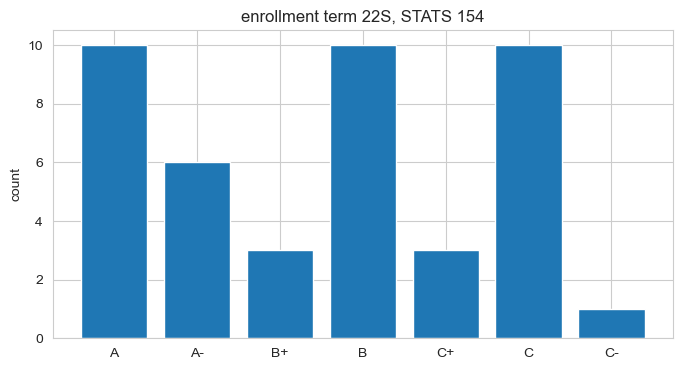

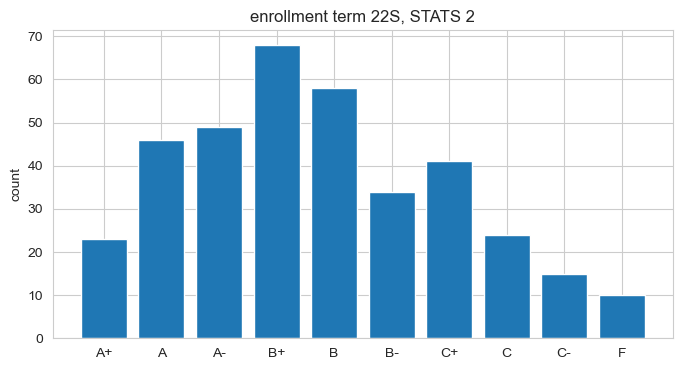

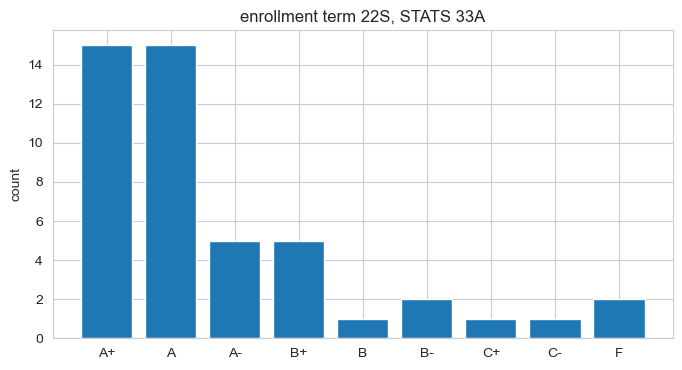

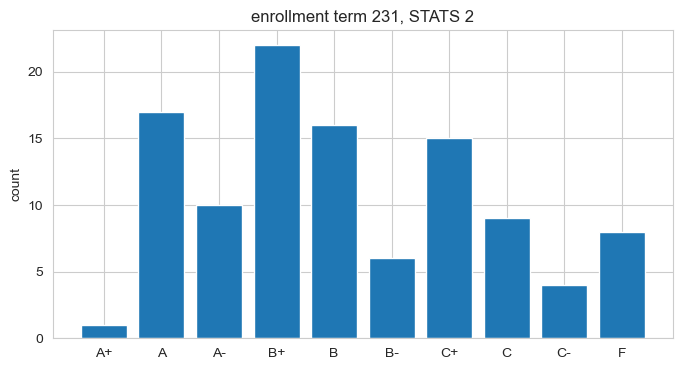

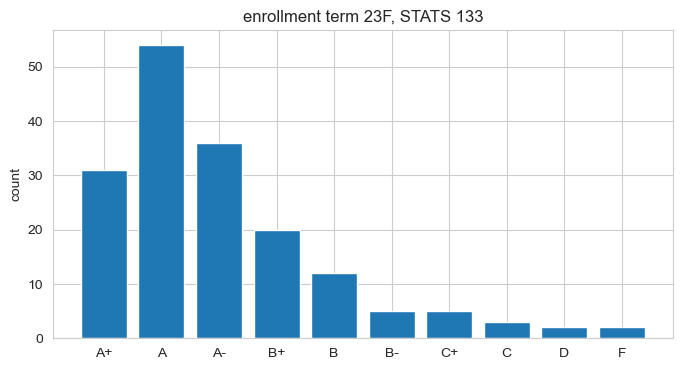

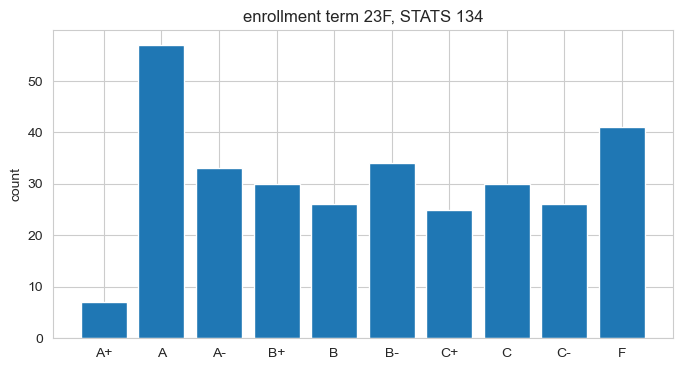

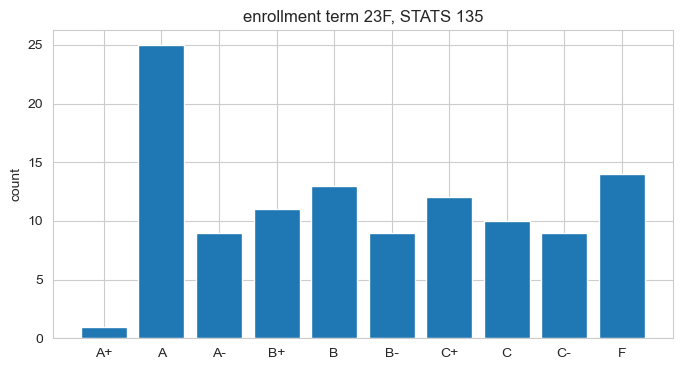

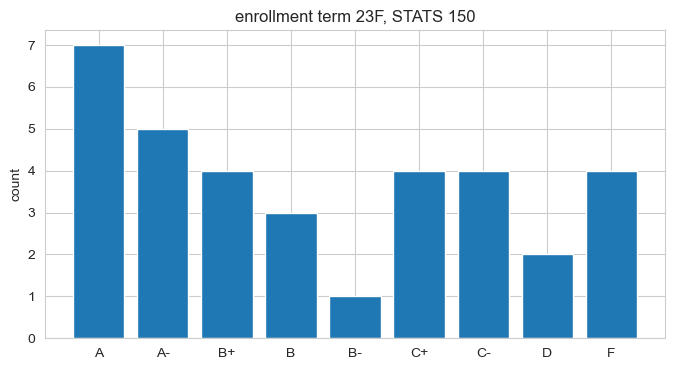

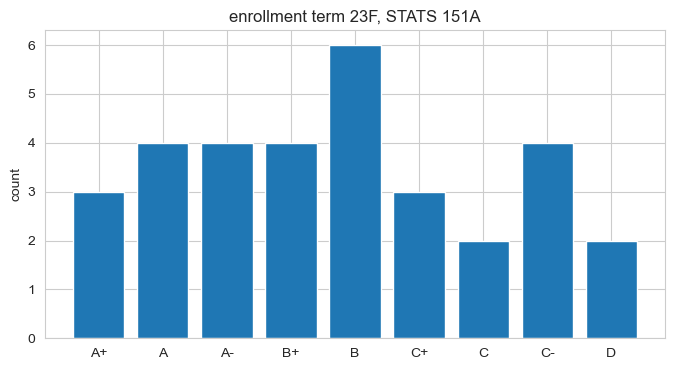

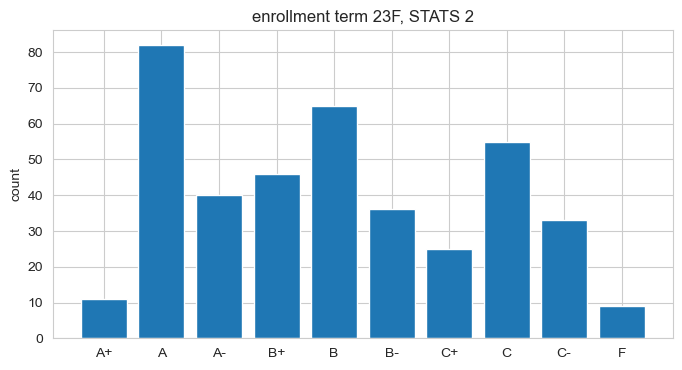

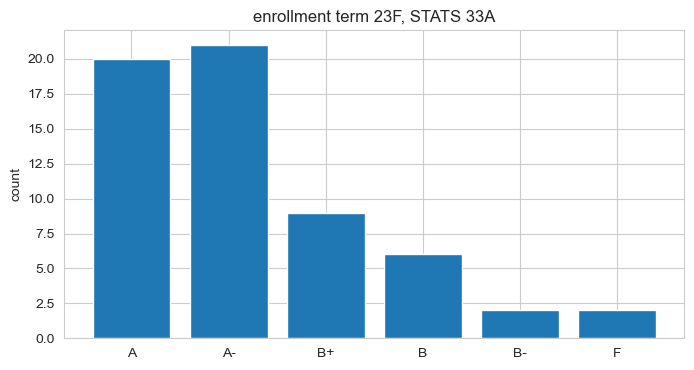

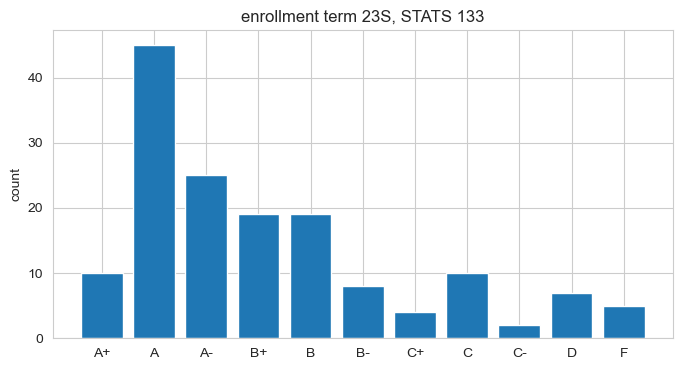

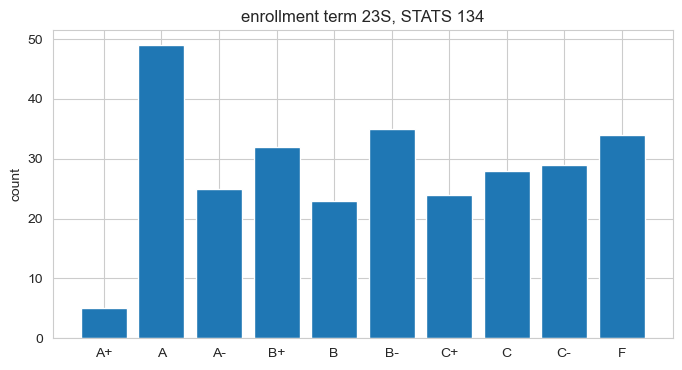

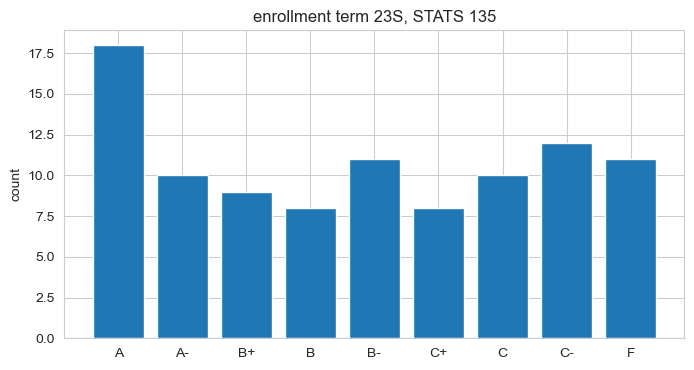

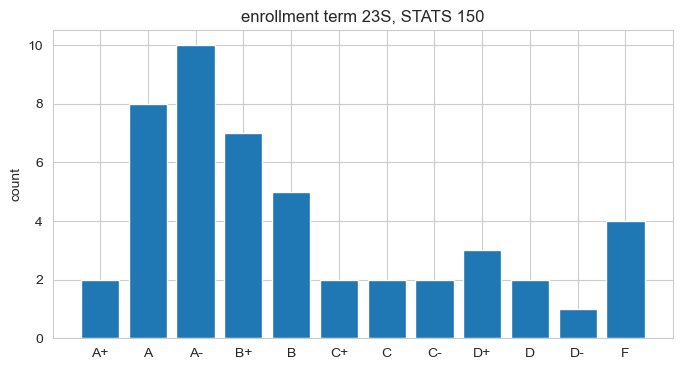

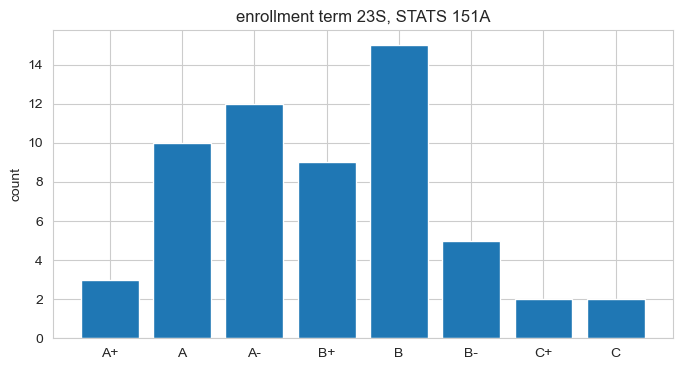

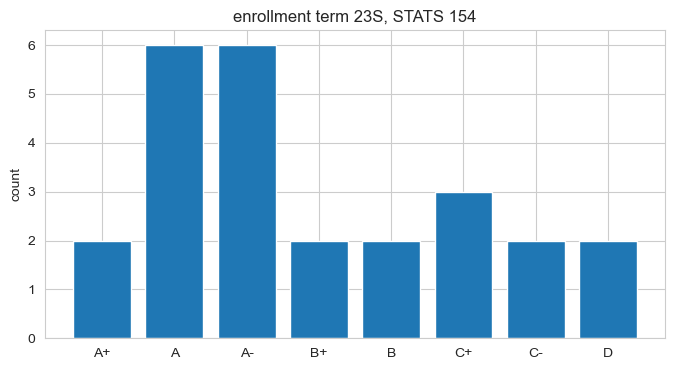

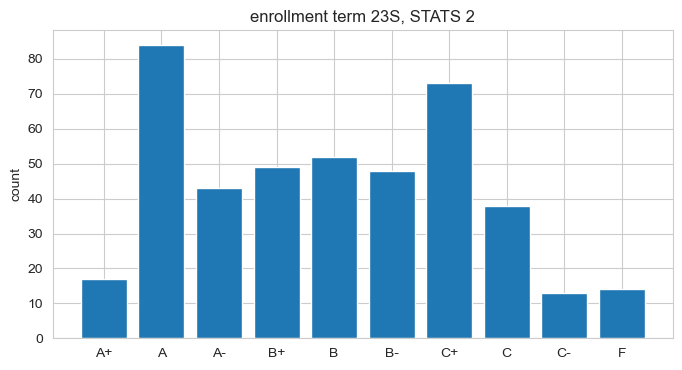

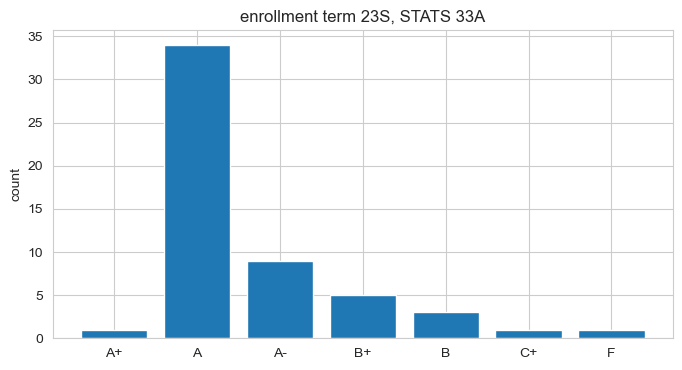

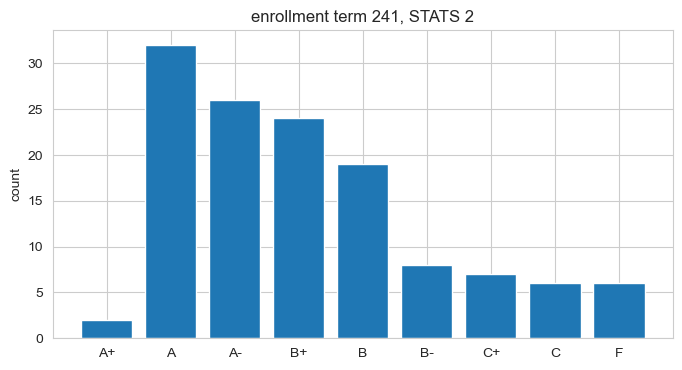

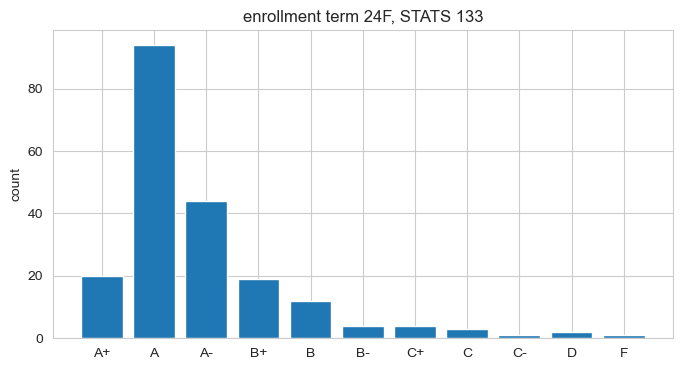

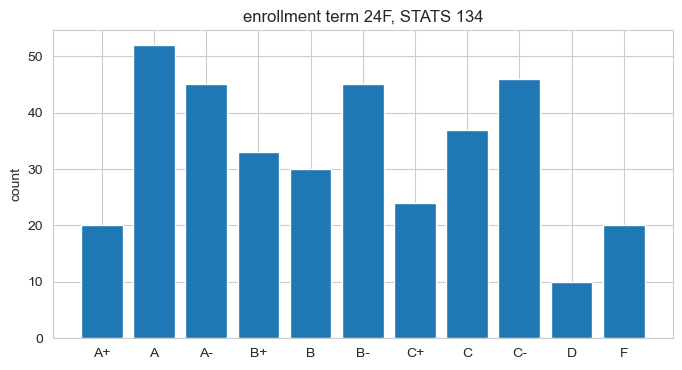

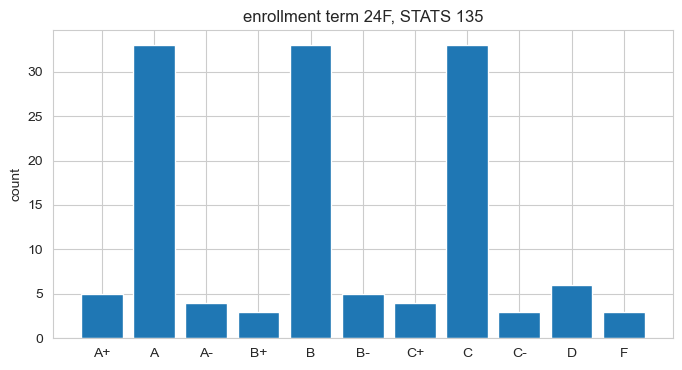

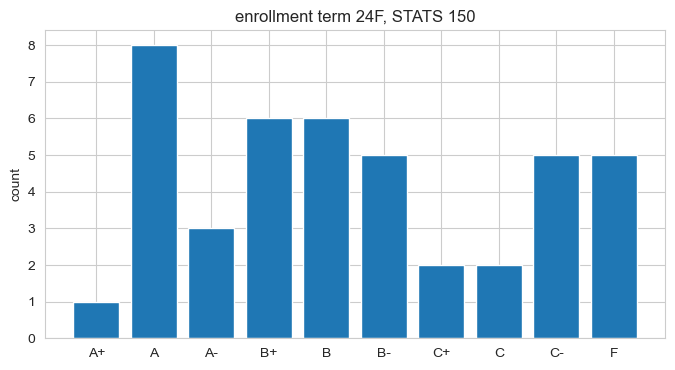

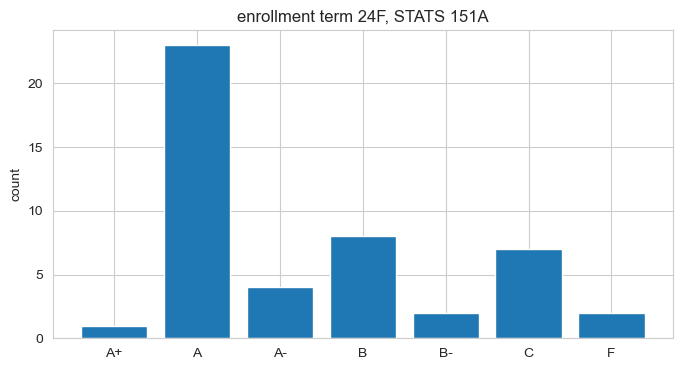

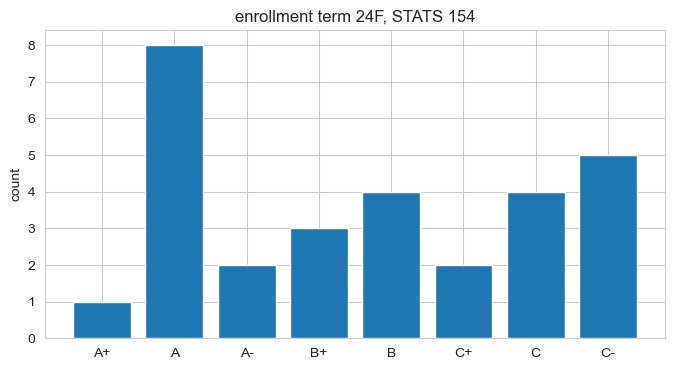

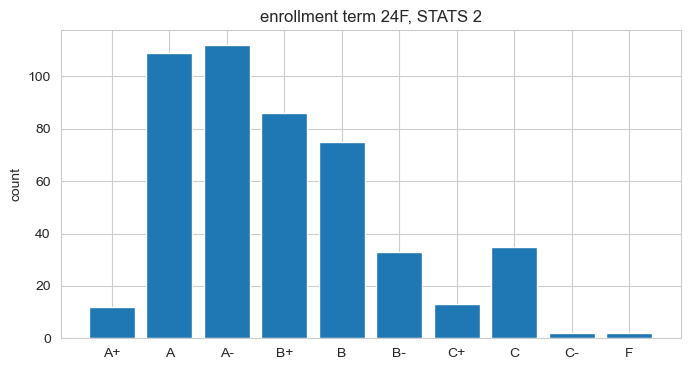

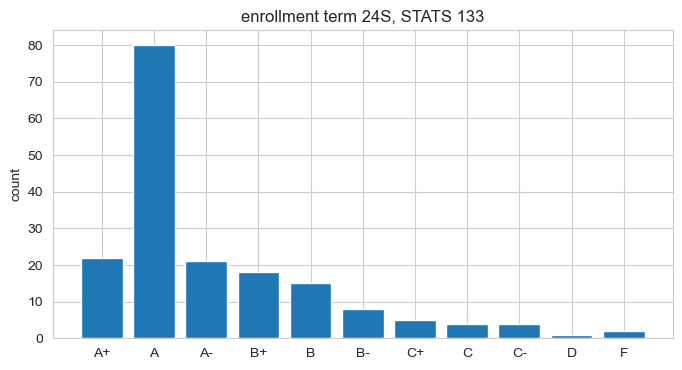

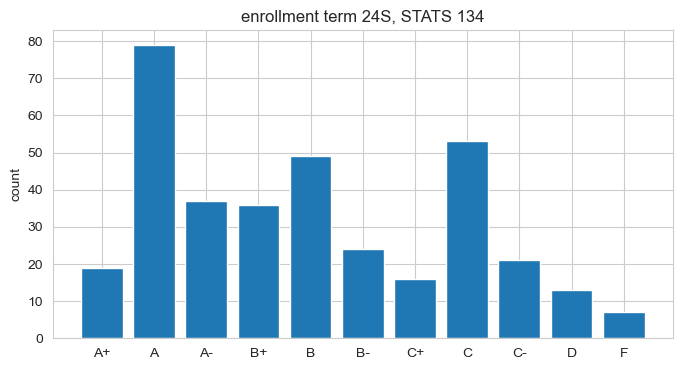

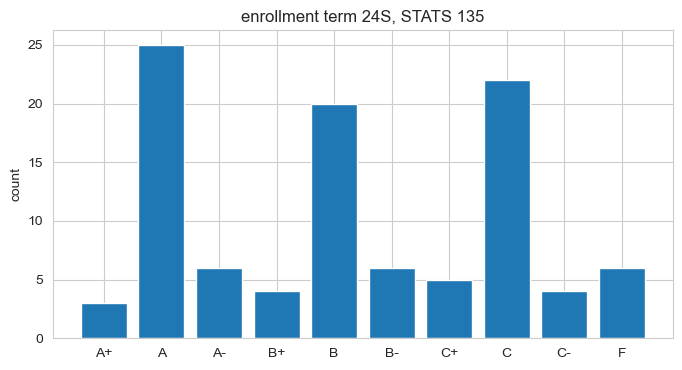

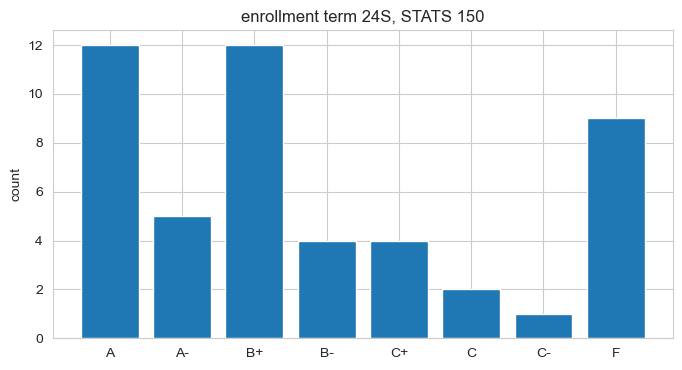

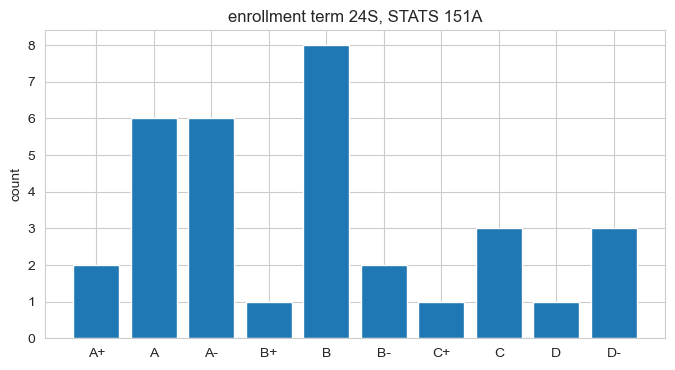

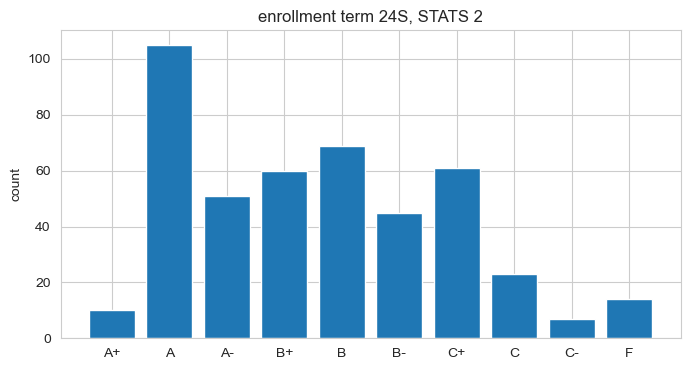

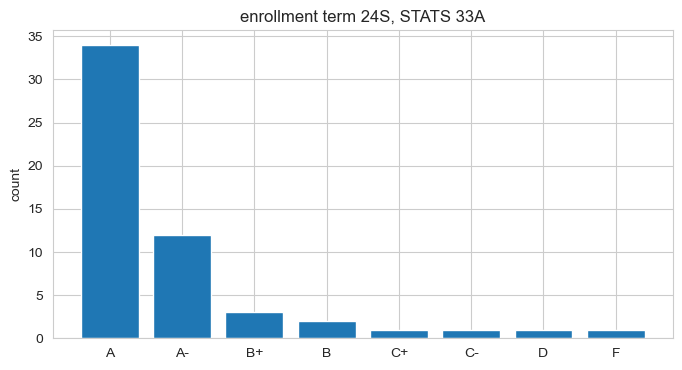

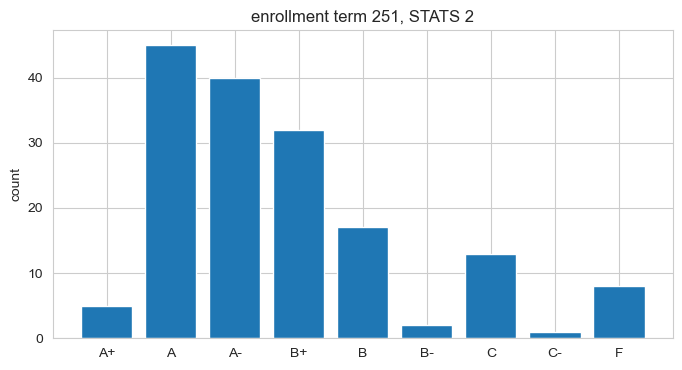

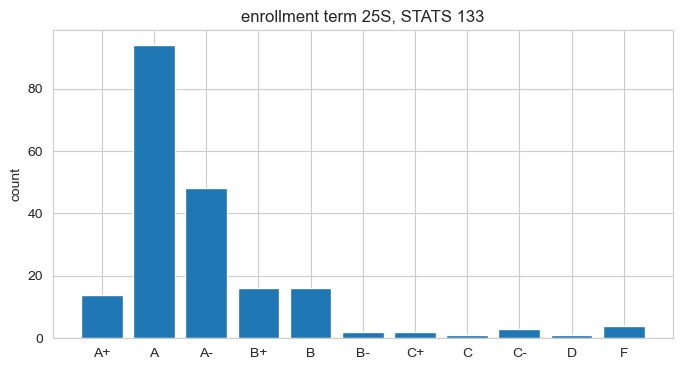

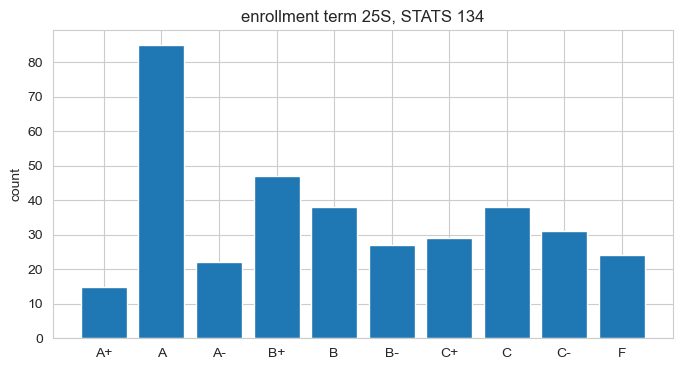

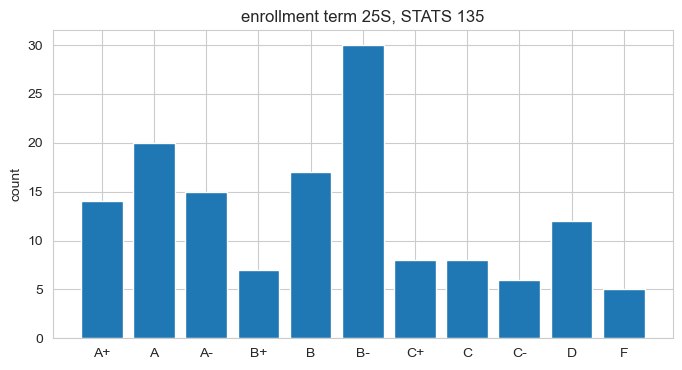

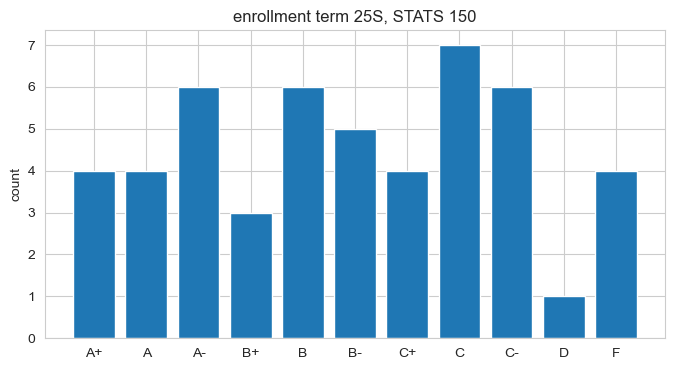

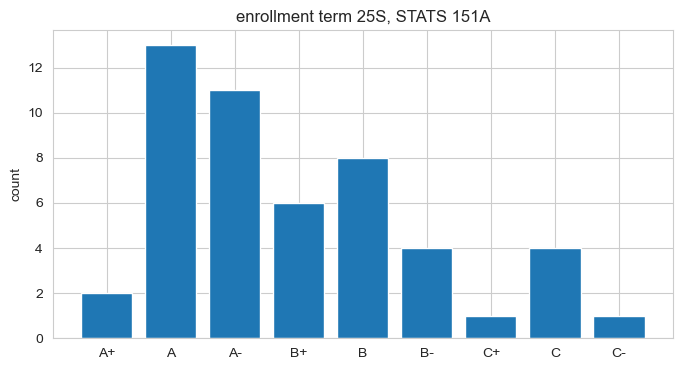

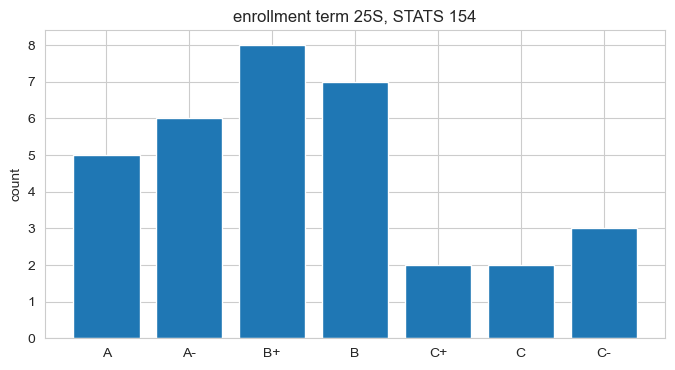

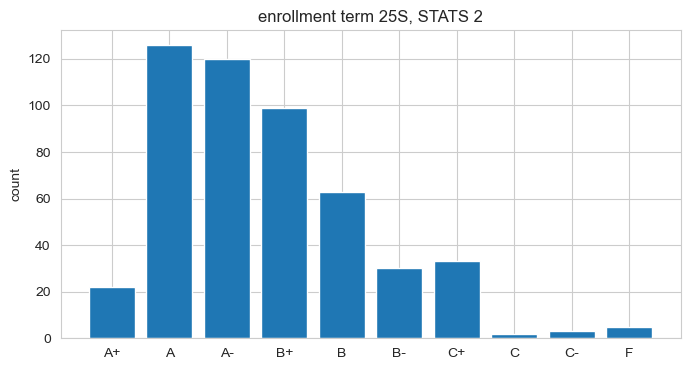

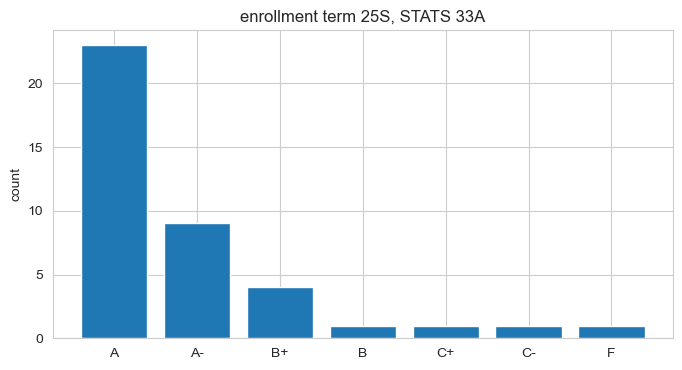

In [284]:
berkeley_grades.head()

# classes are differentiated through their enrollment term and course number
for (term, course), group in berkeley_grades.groupby(['ENROLLMENT TERM', 'CATLG NBR']):
    plt.figure(figsize=(8, 4))

    plt.bar(group['GRD OFF'], group['GRD COUNT'])
    plt.title(f"enrollment term {term}, STATS {course}")
    plt.ylabel('count')
    plt.show()


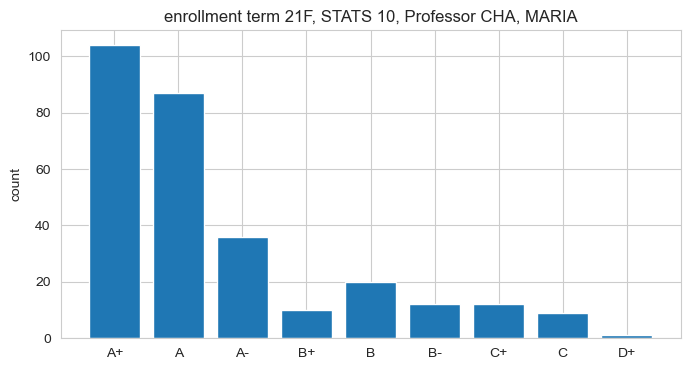

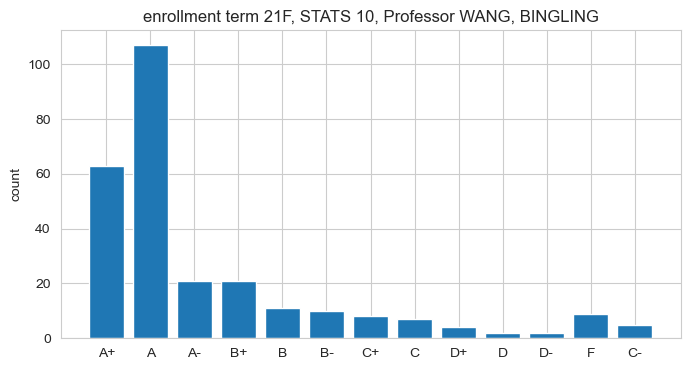

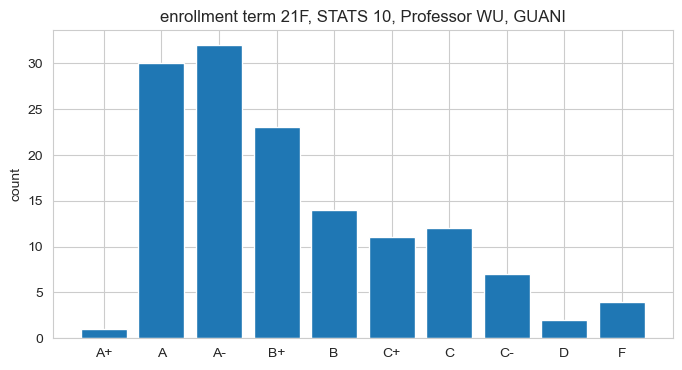

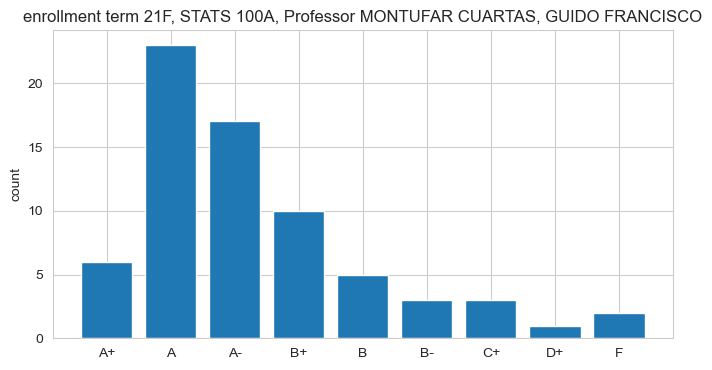

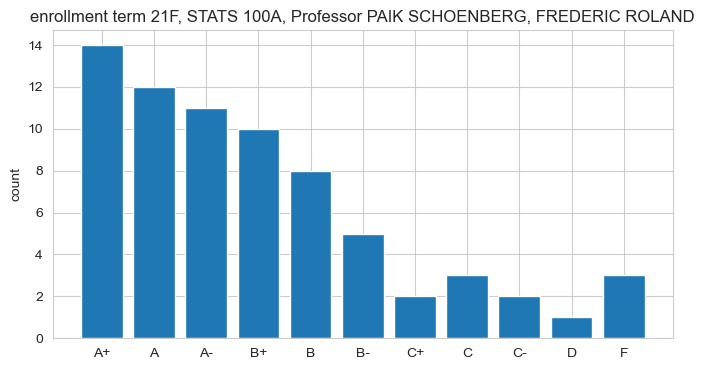

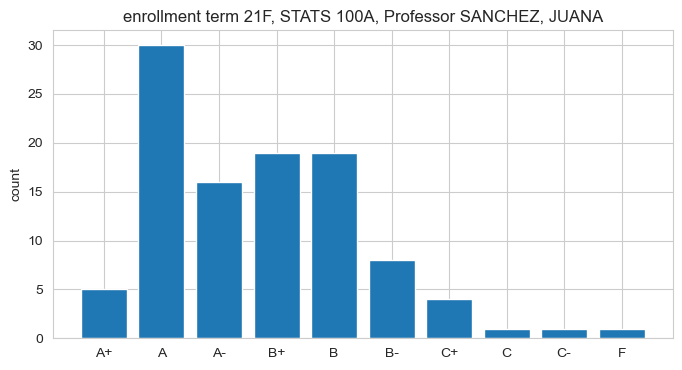

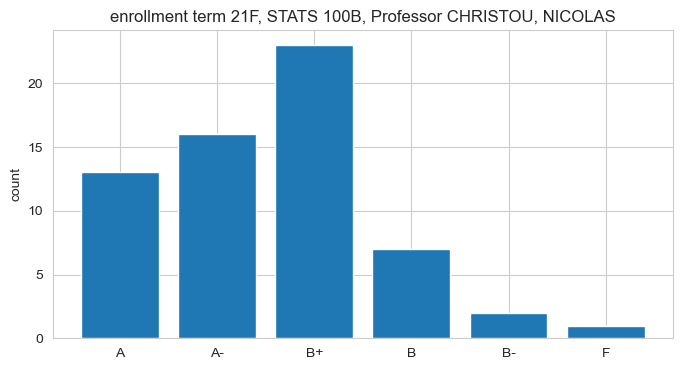

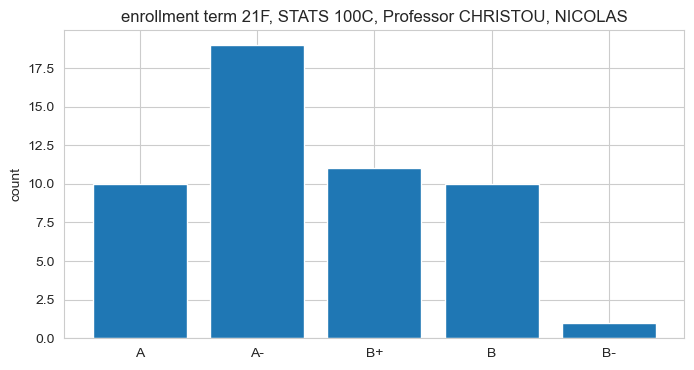

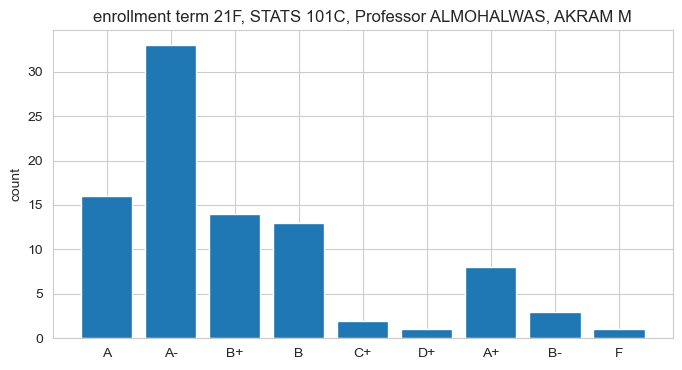

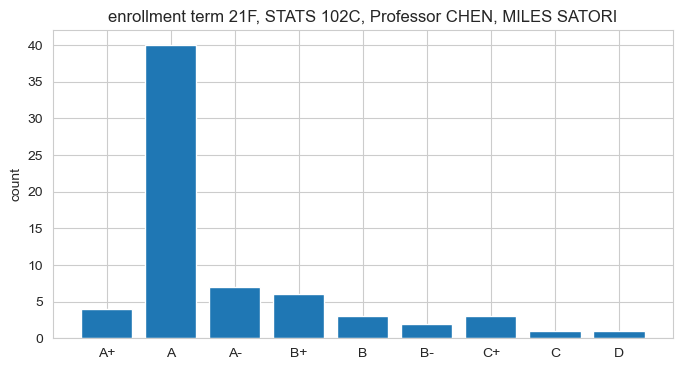

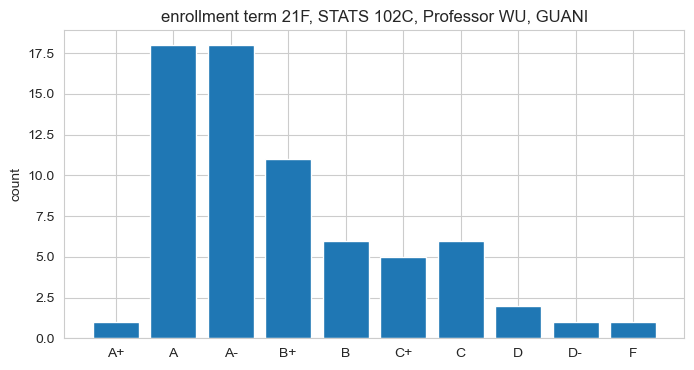

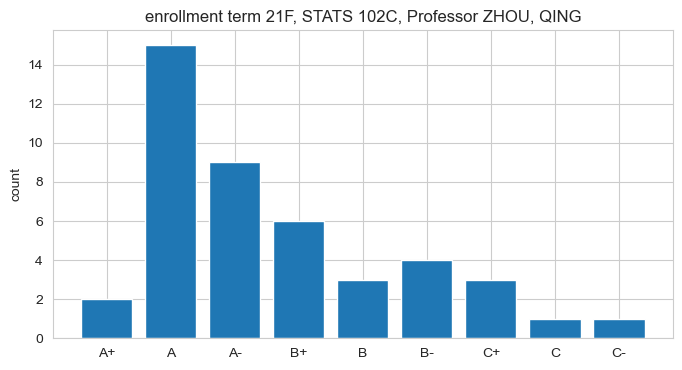

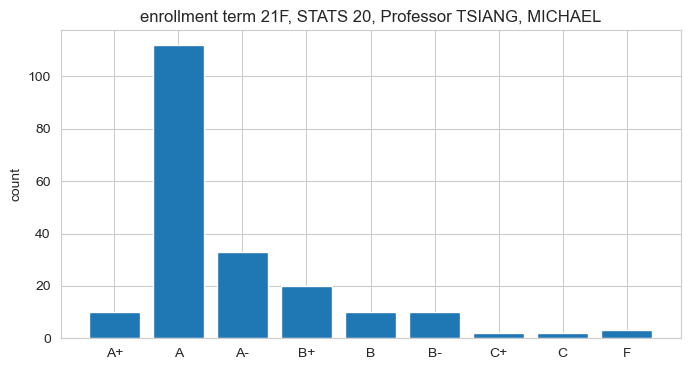

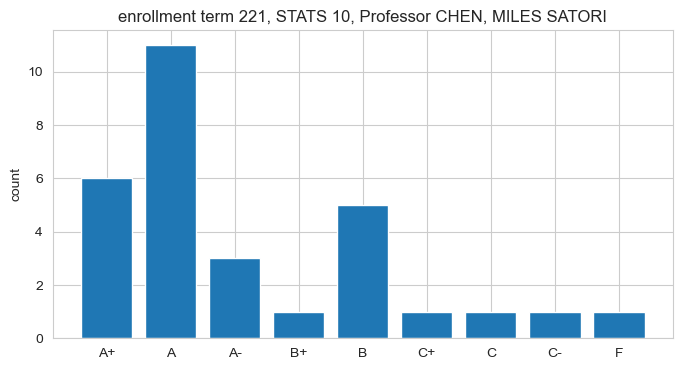

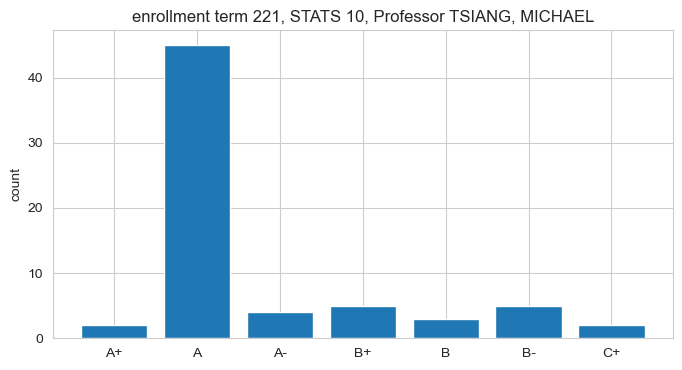

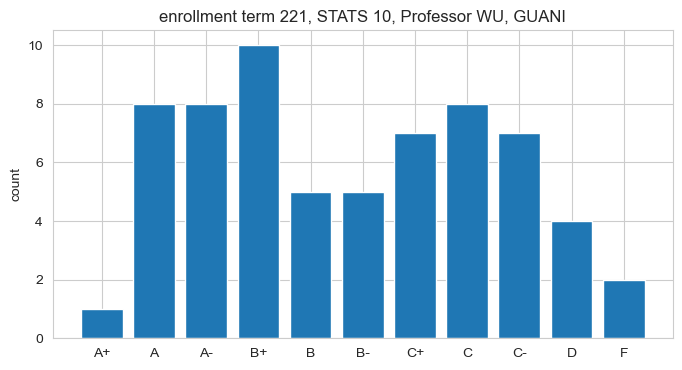

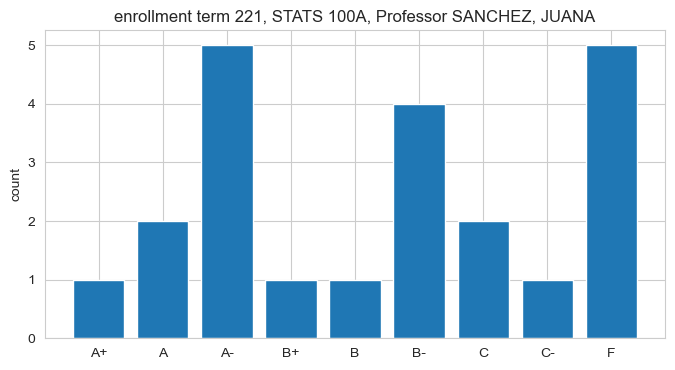

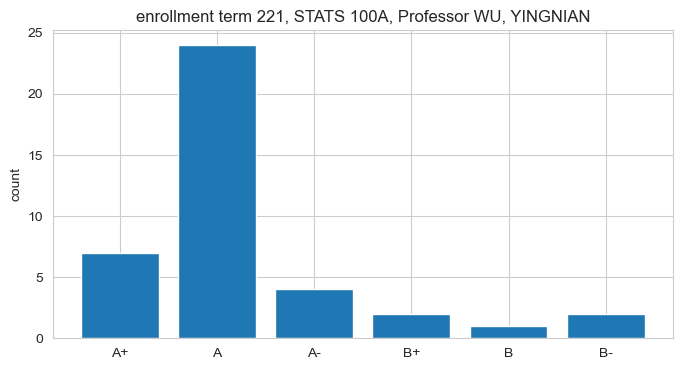

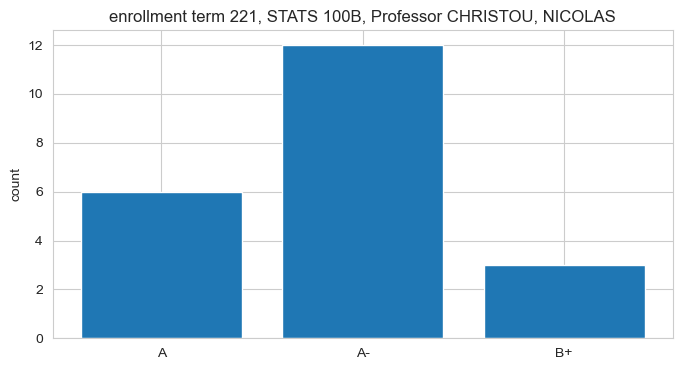

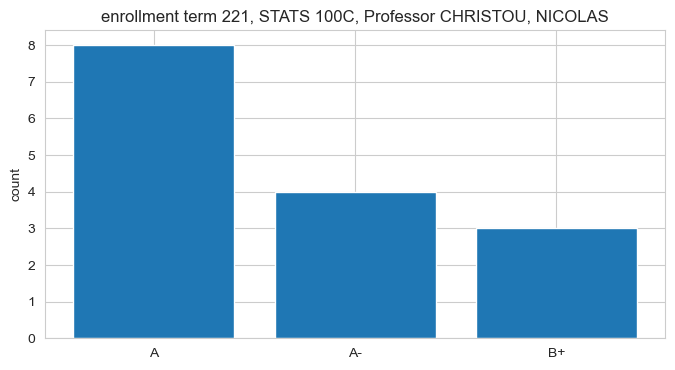

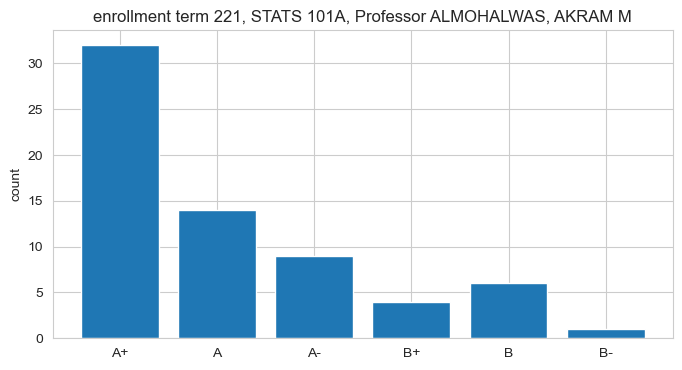

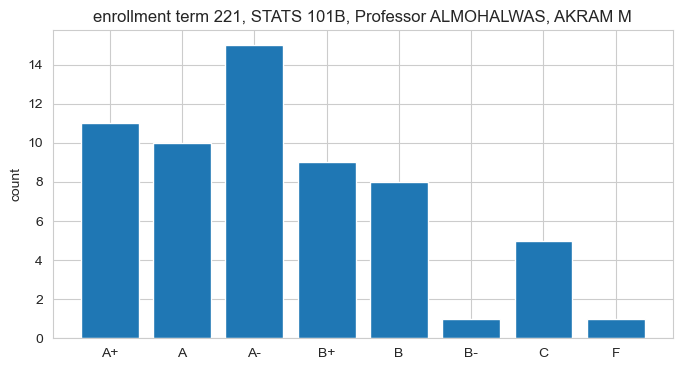

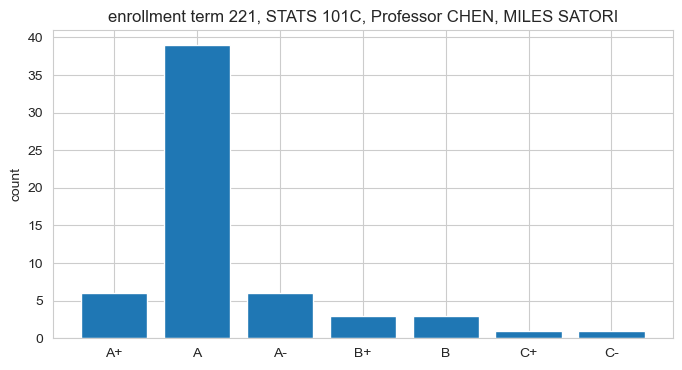

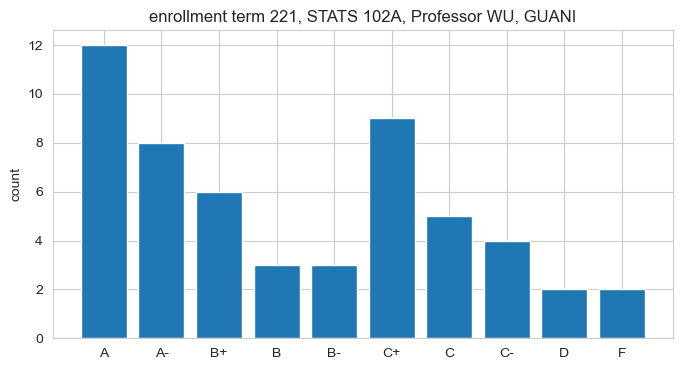

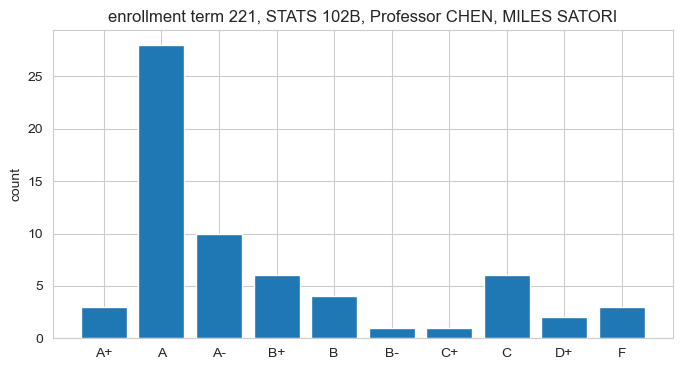

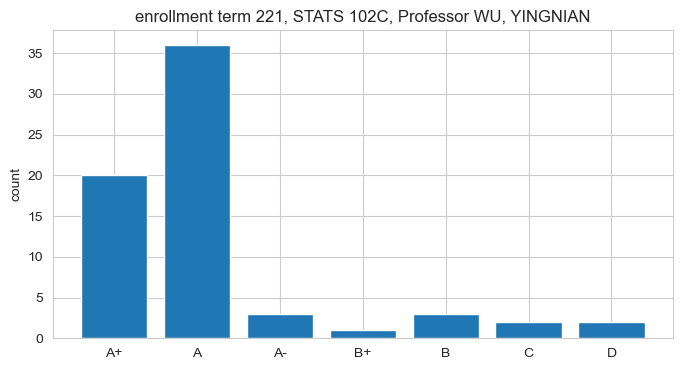

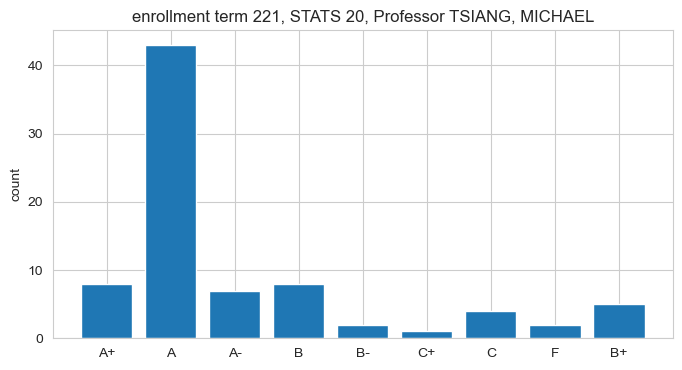

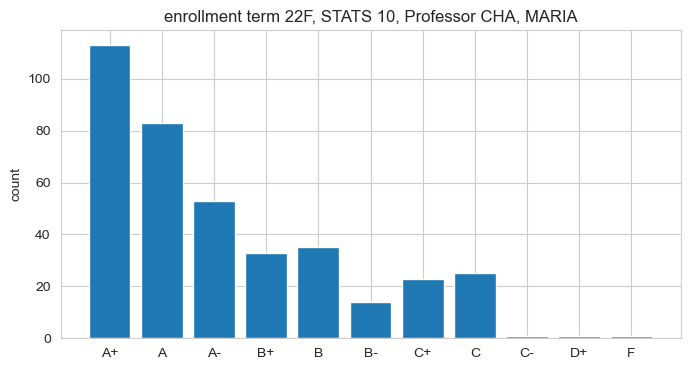

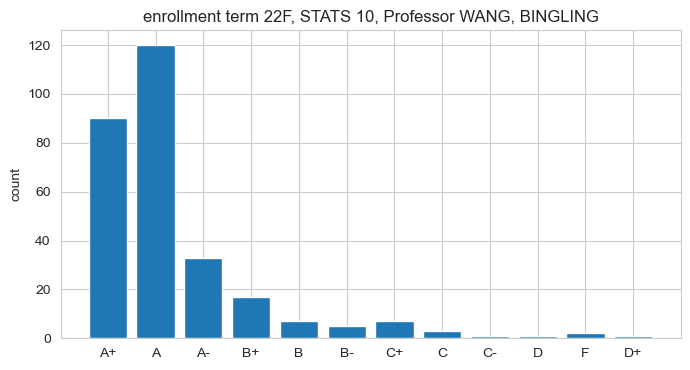

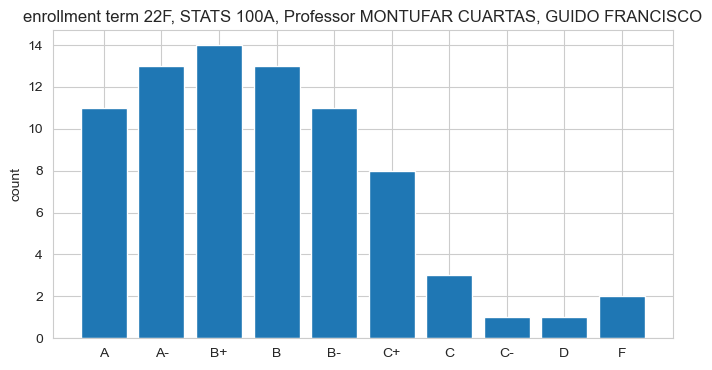

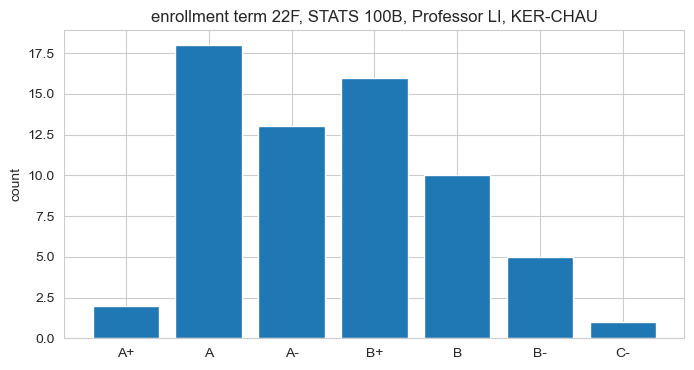

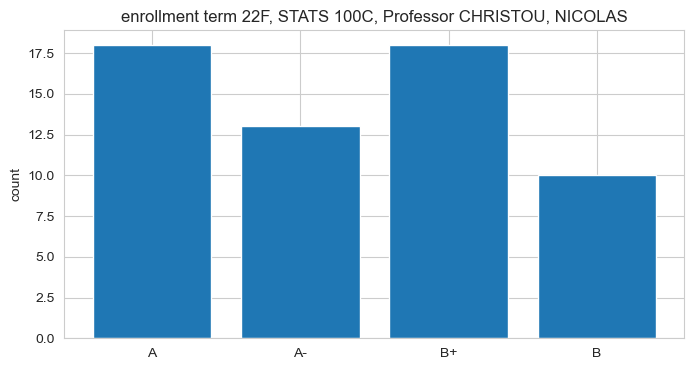

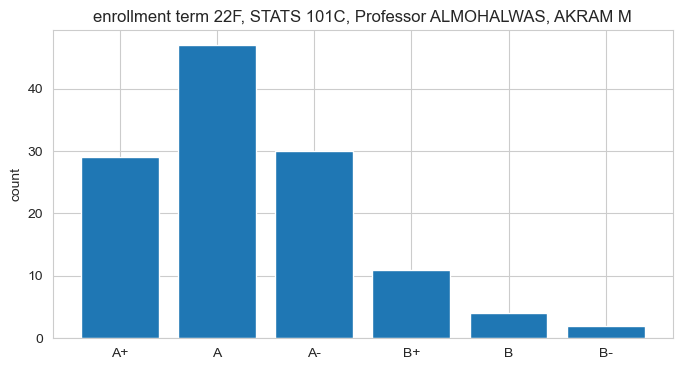

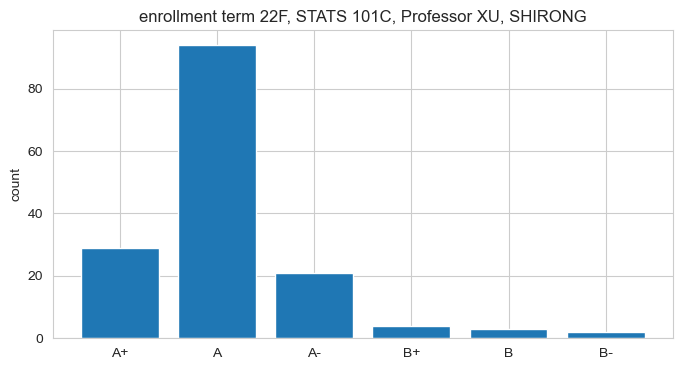

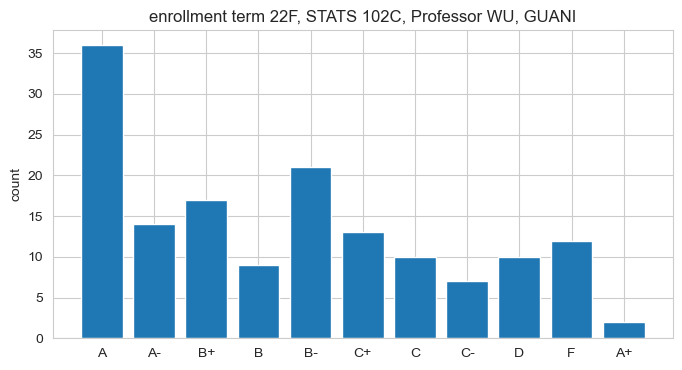

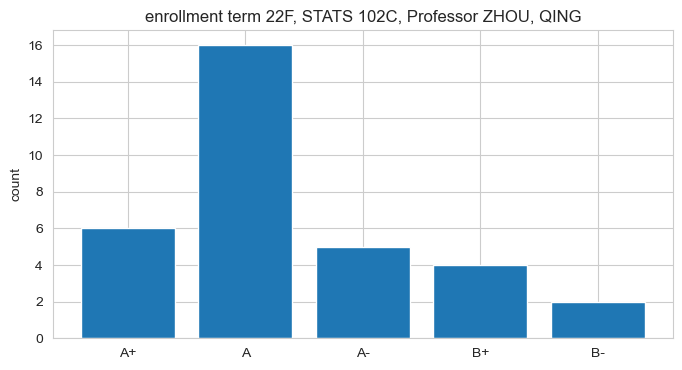

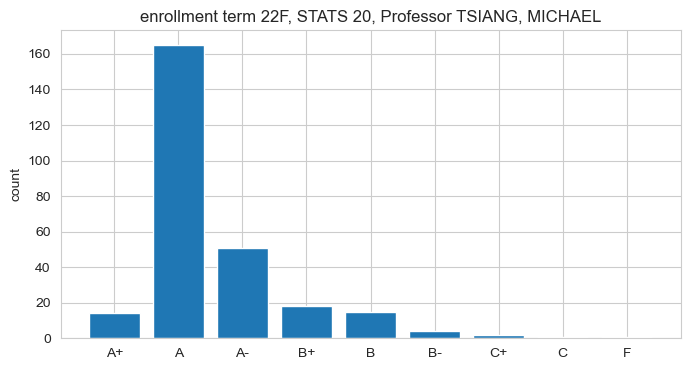

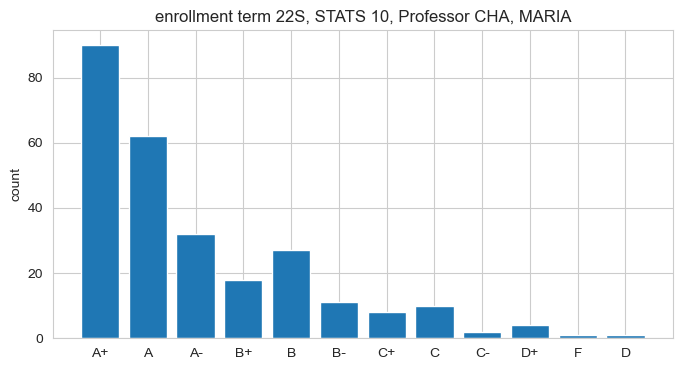

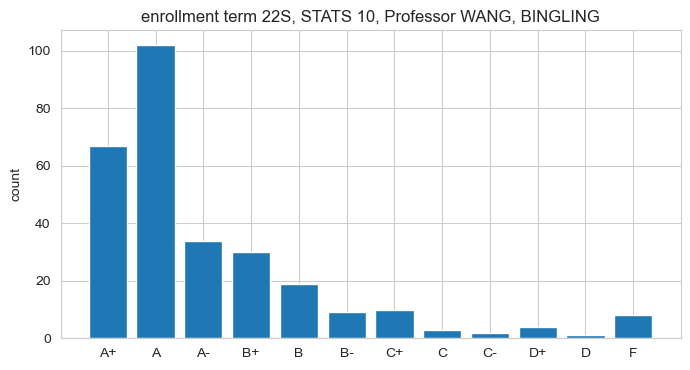

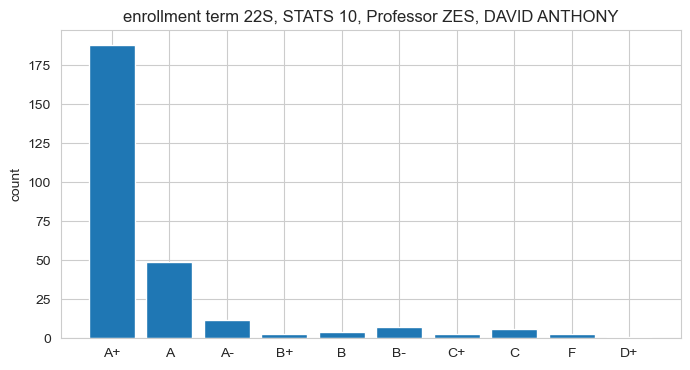

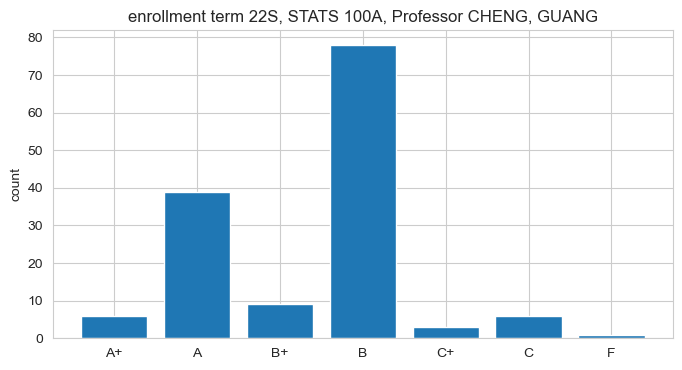

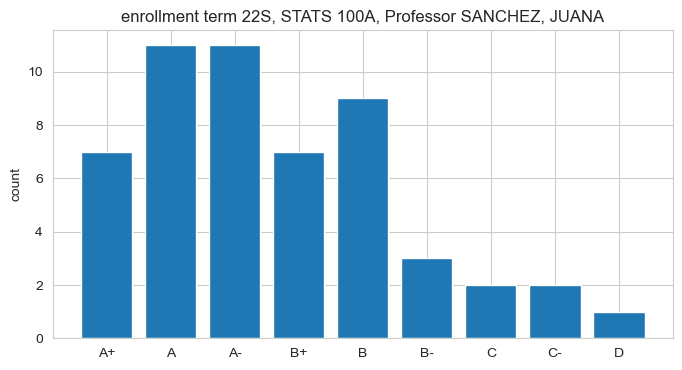

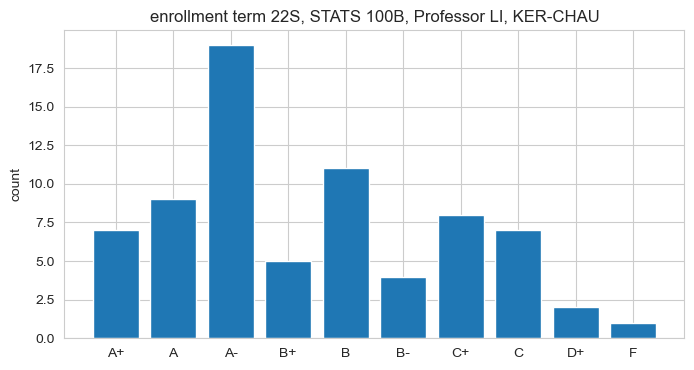

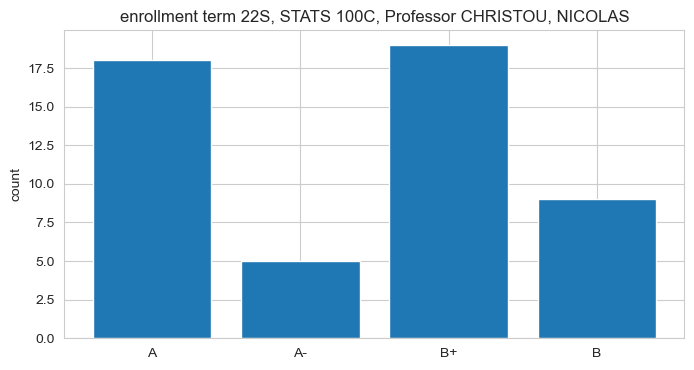

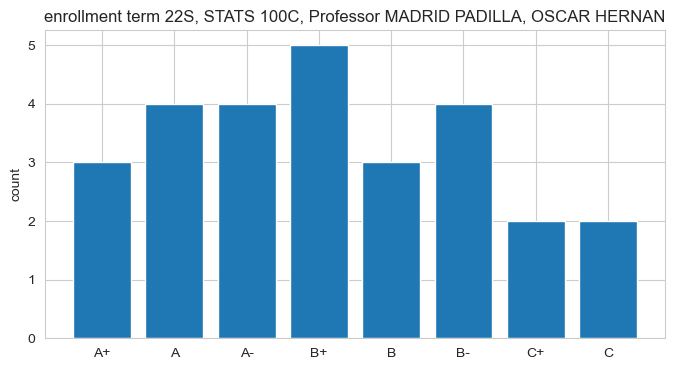

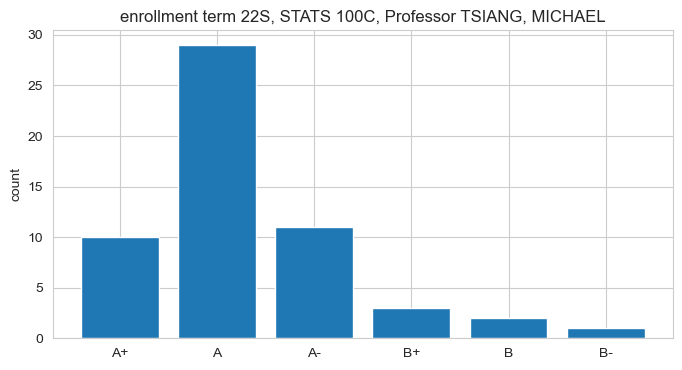

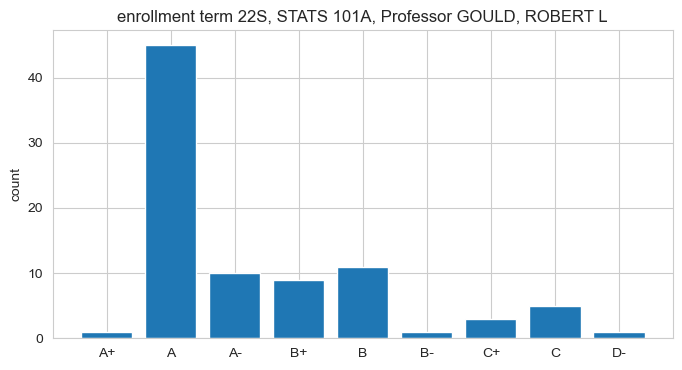

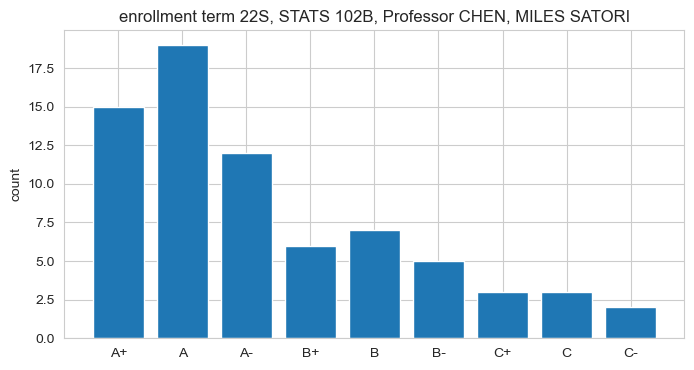

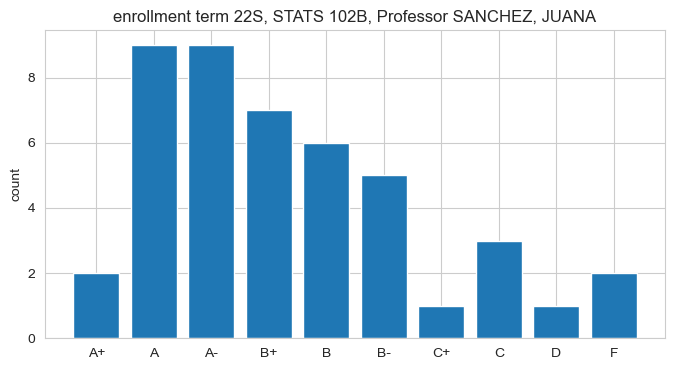

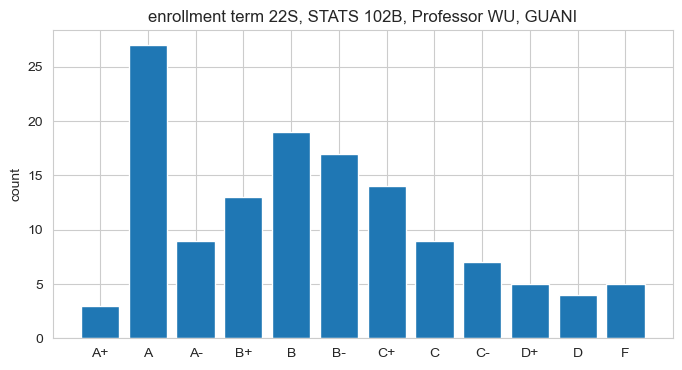

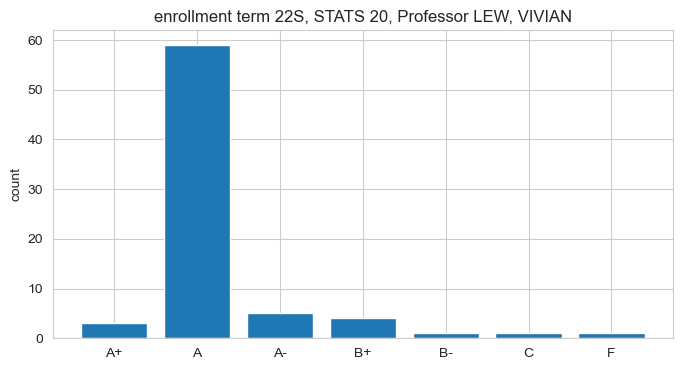

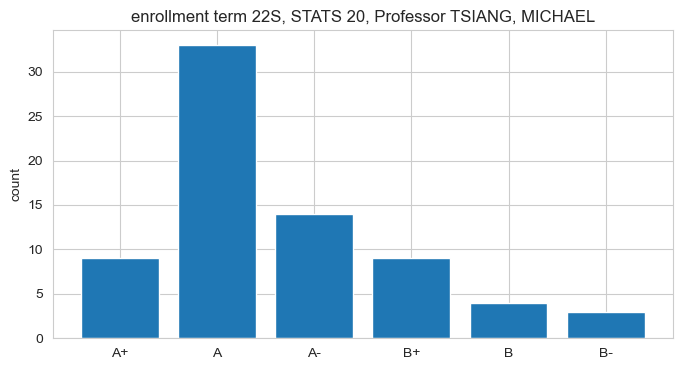

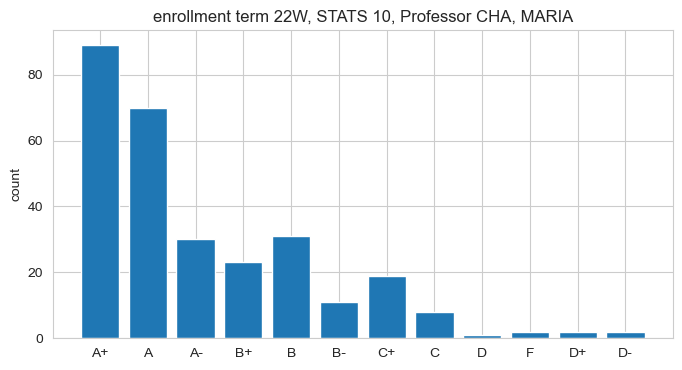

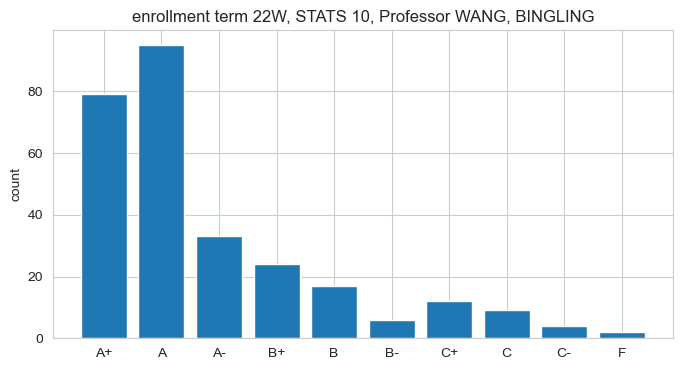

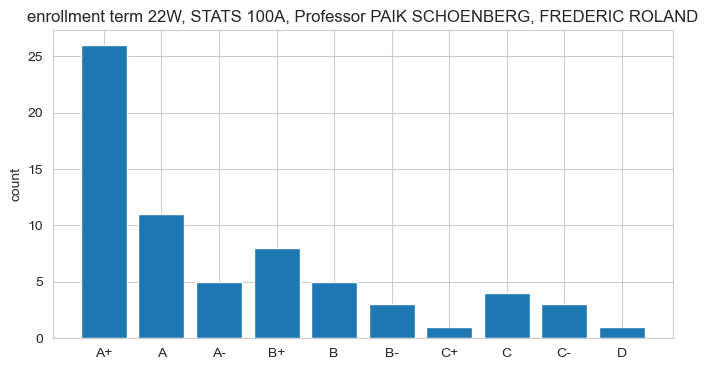

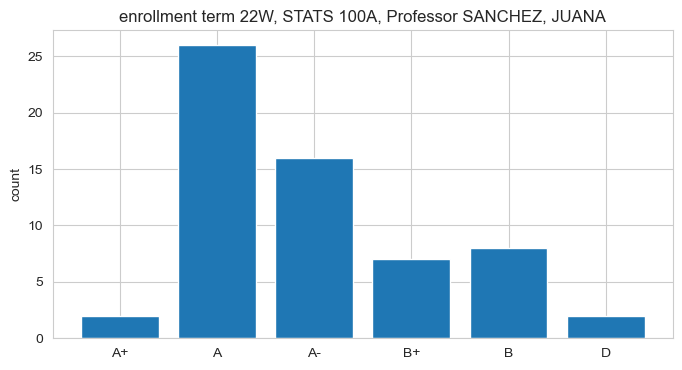

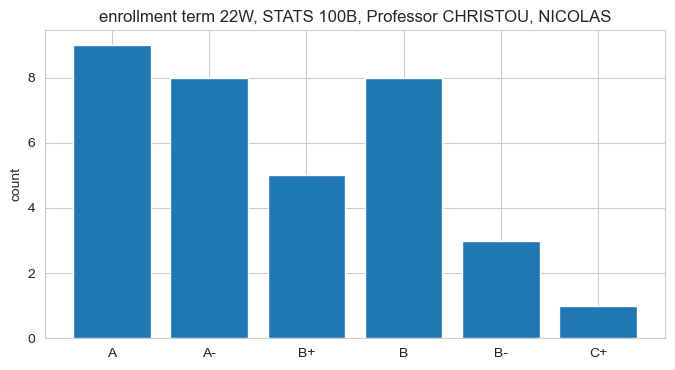

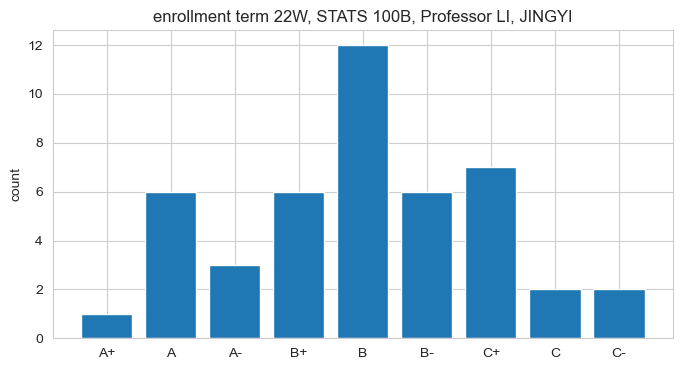

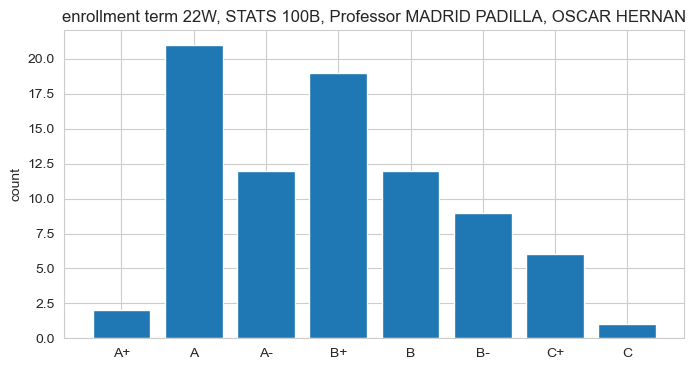

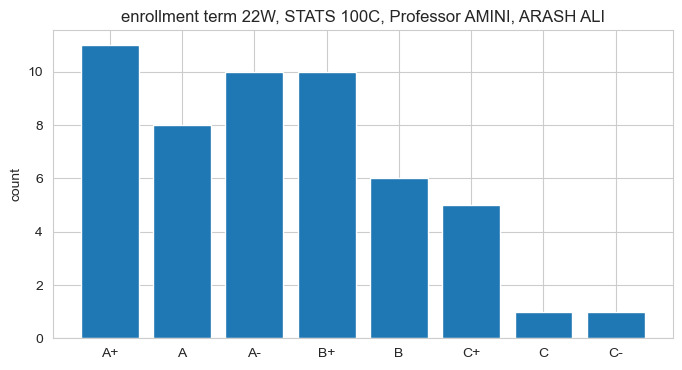

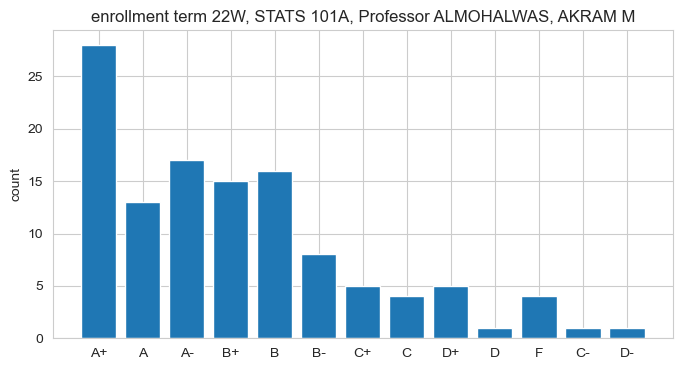

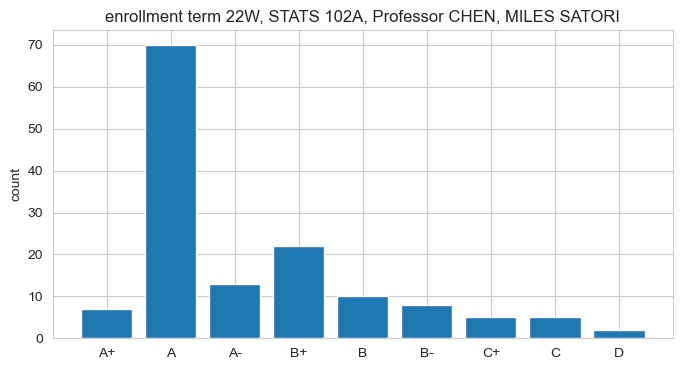

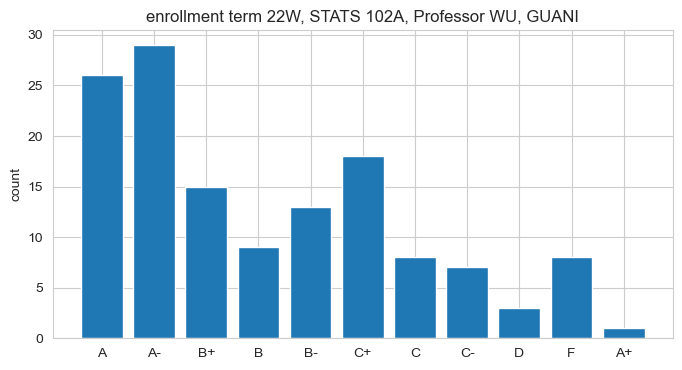

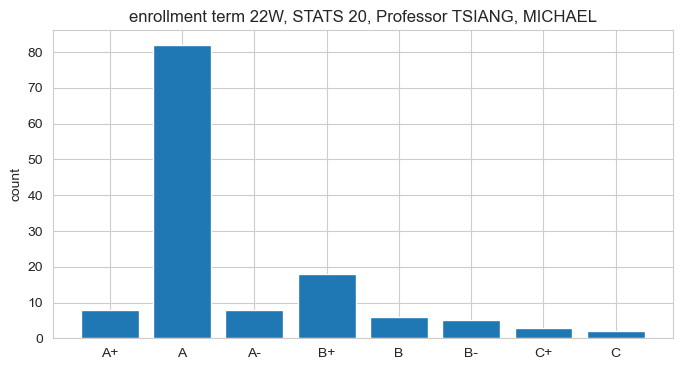

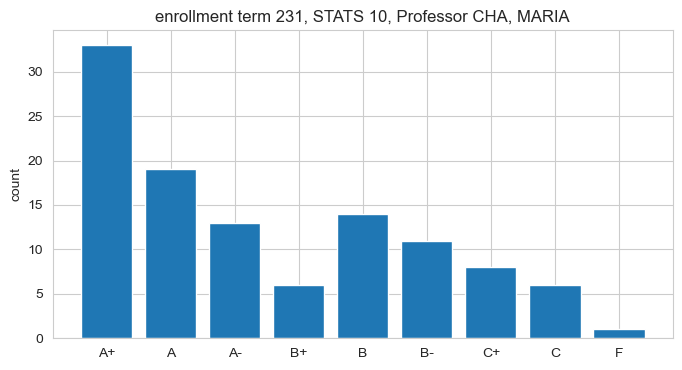

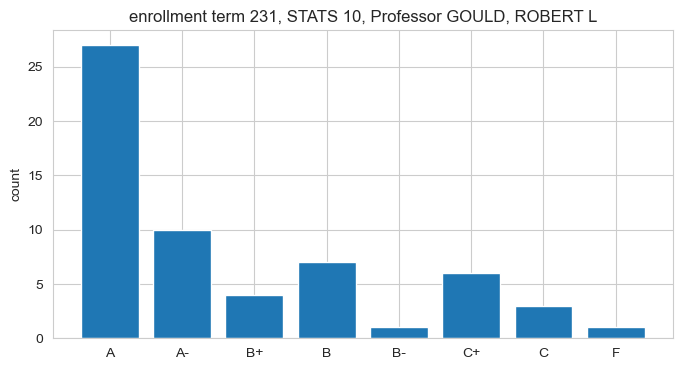

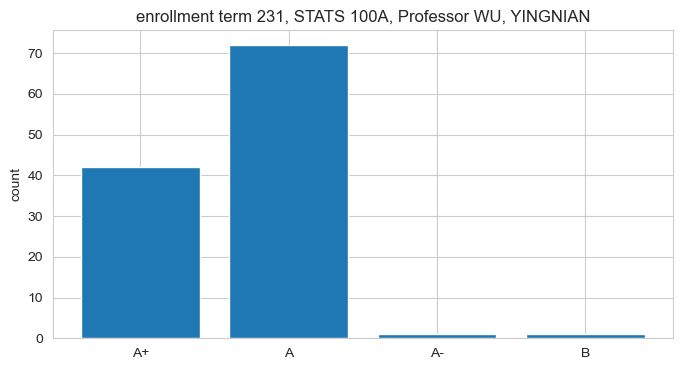

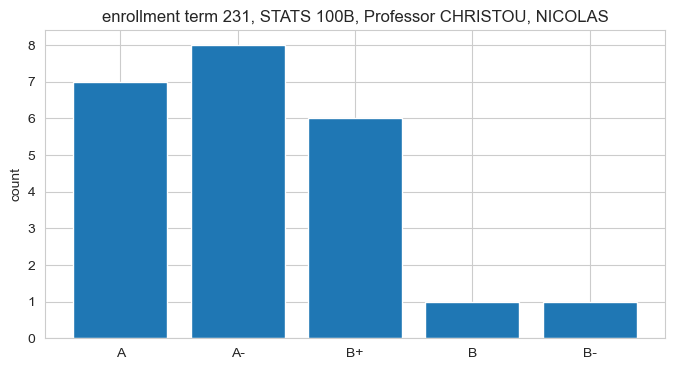

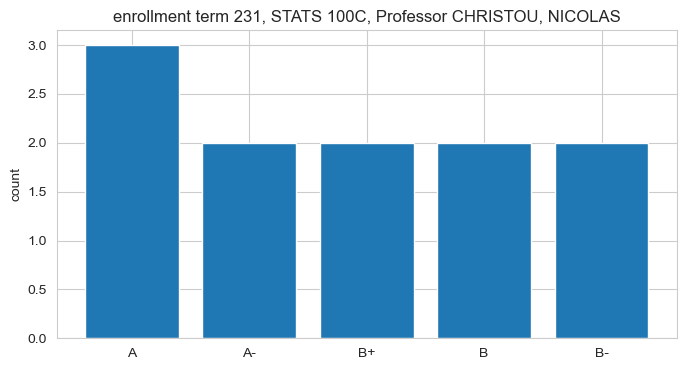

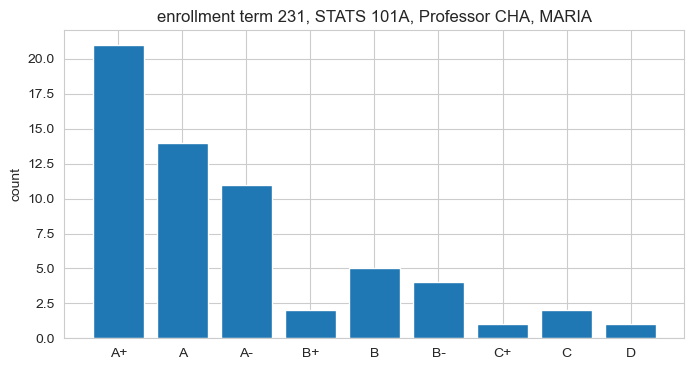

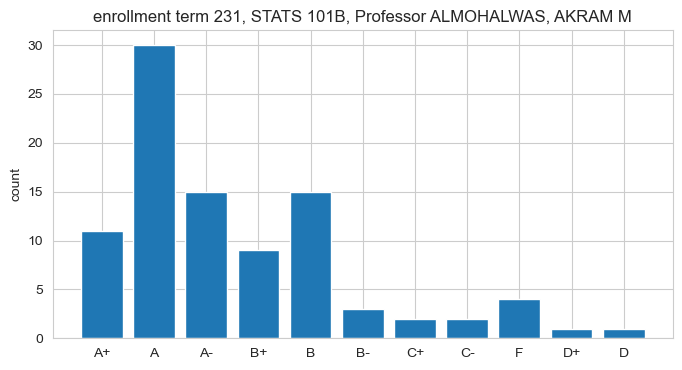

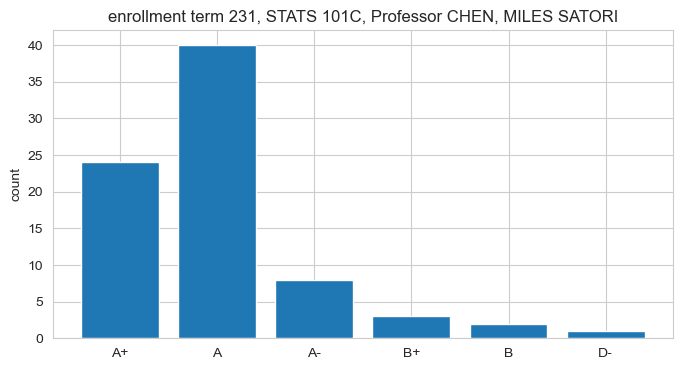

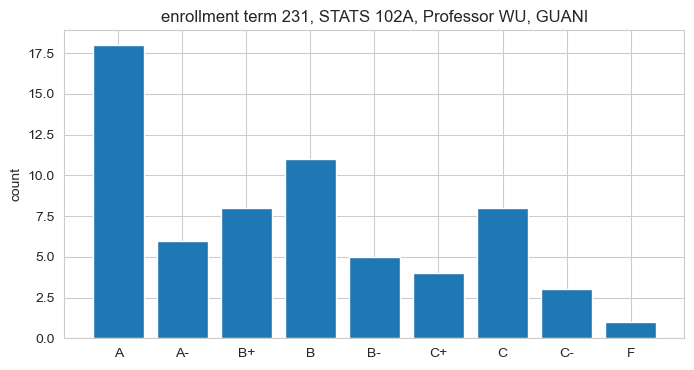

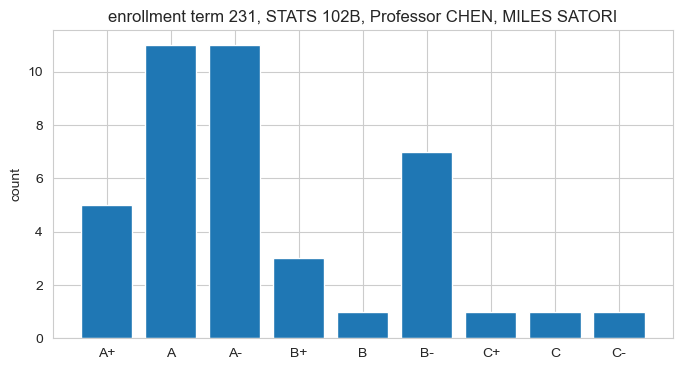

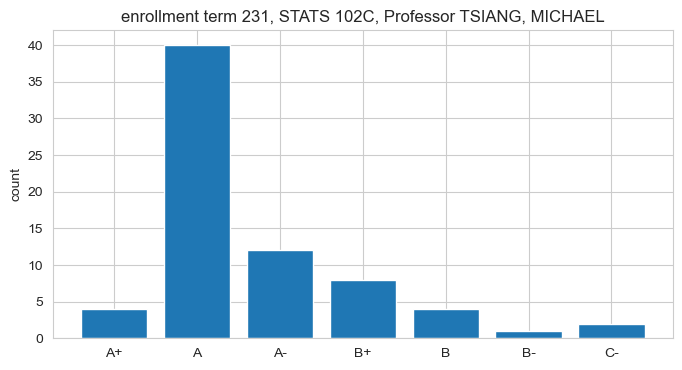

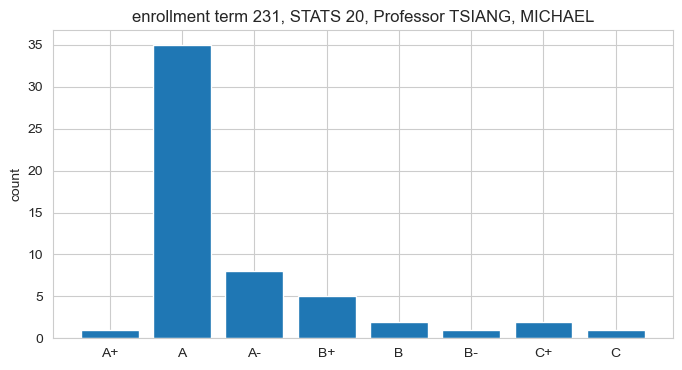

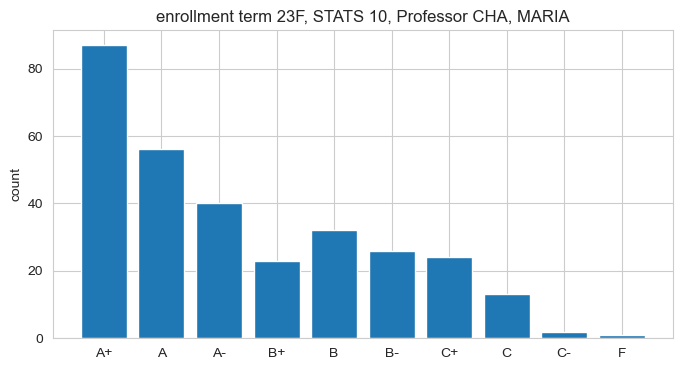

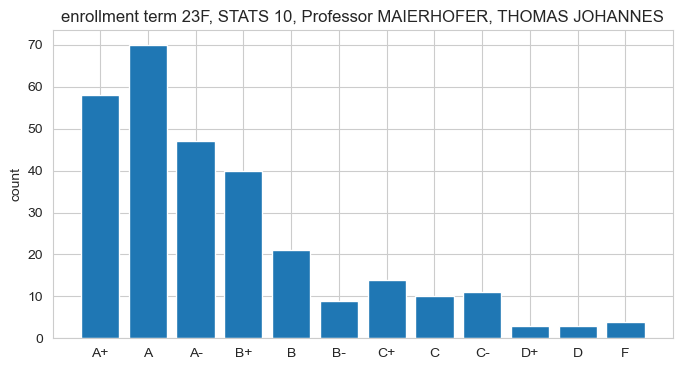

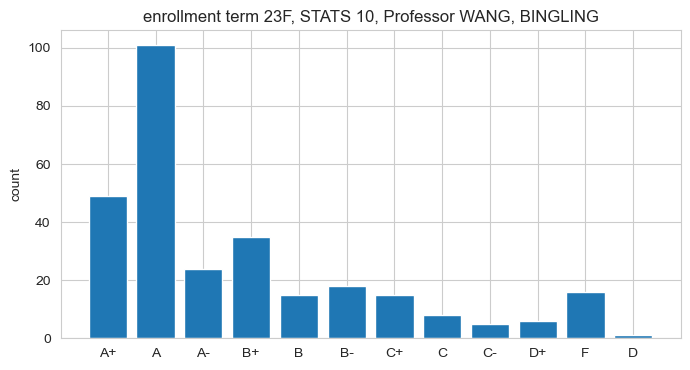

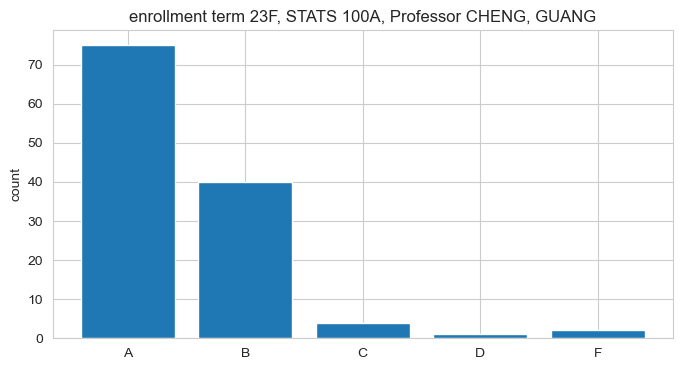

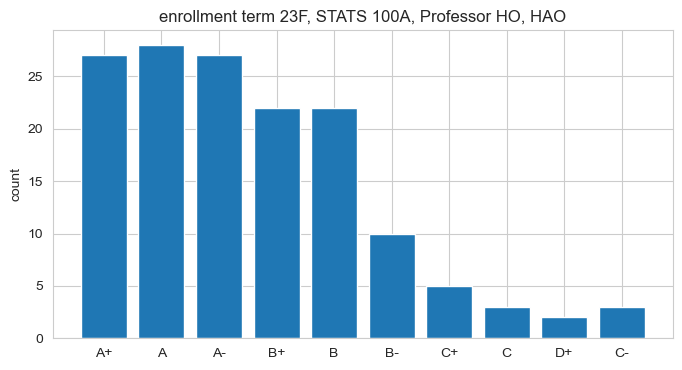

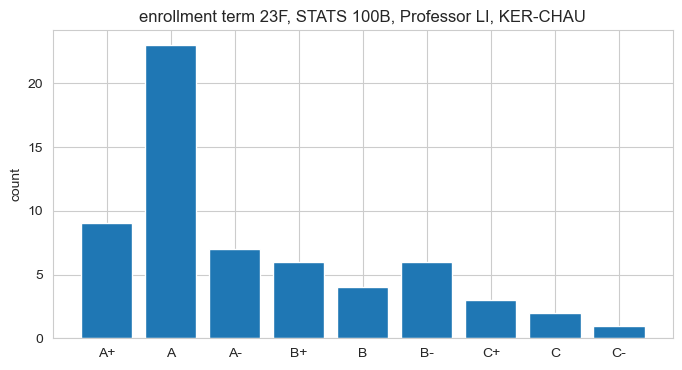

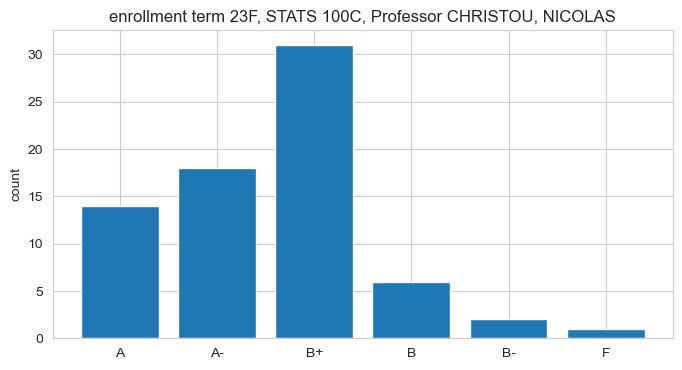

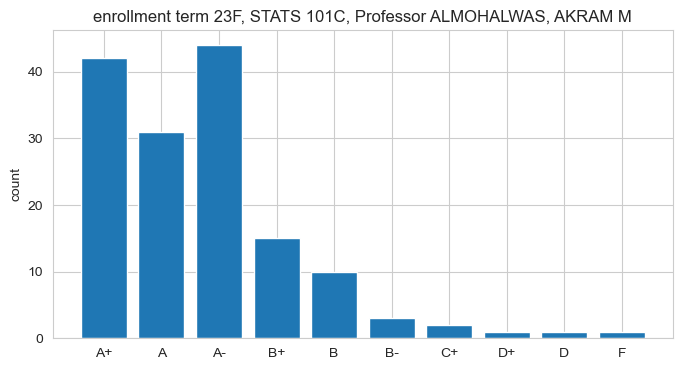

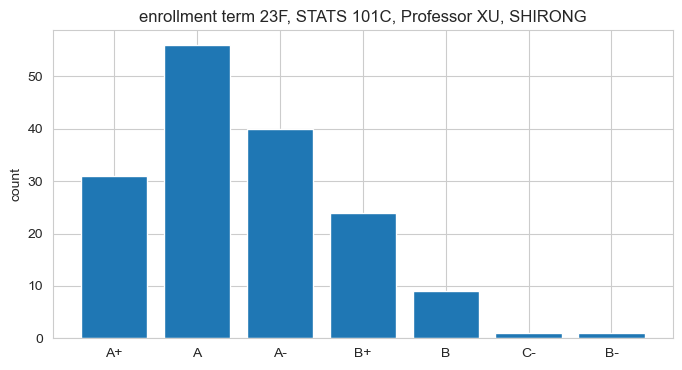

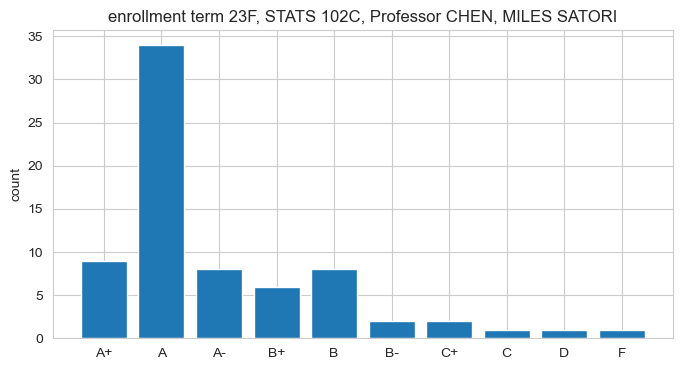

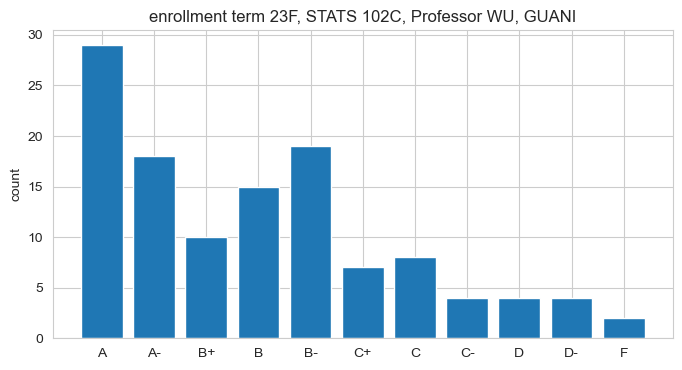

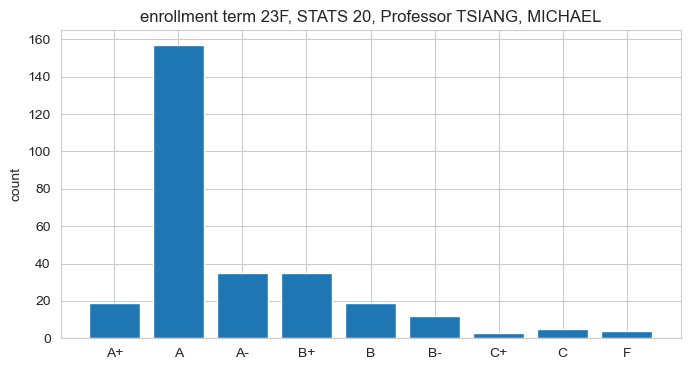

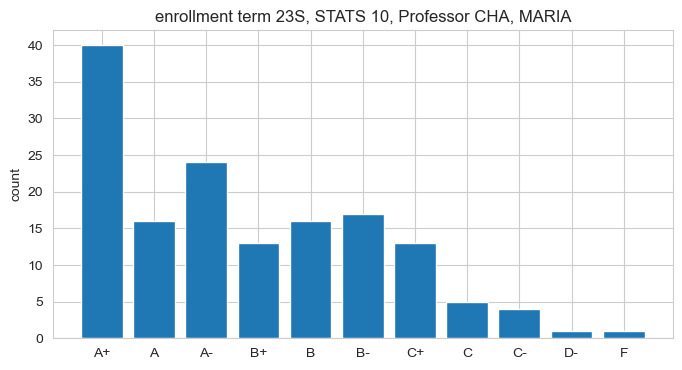

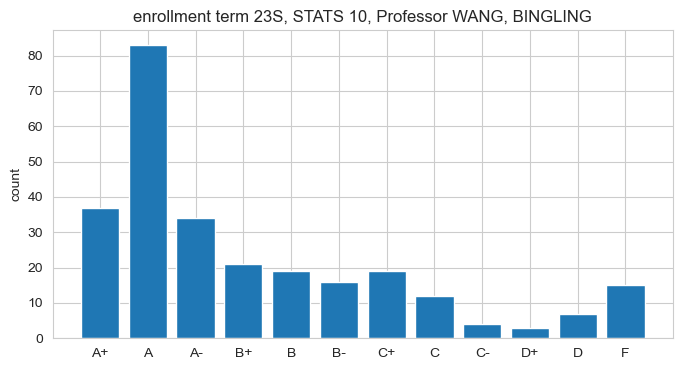

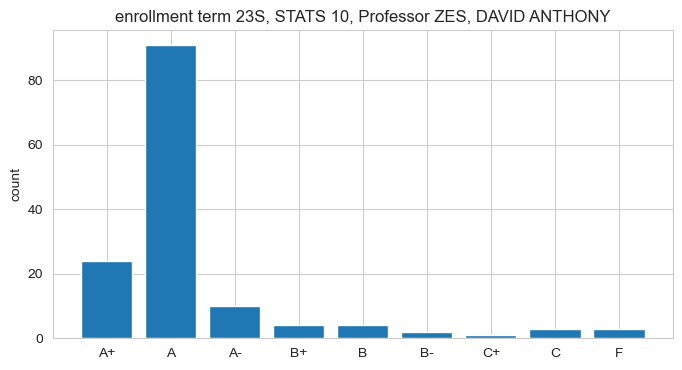

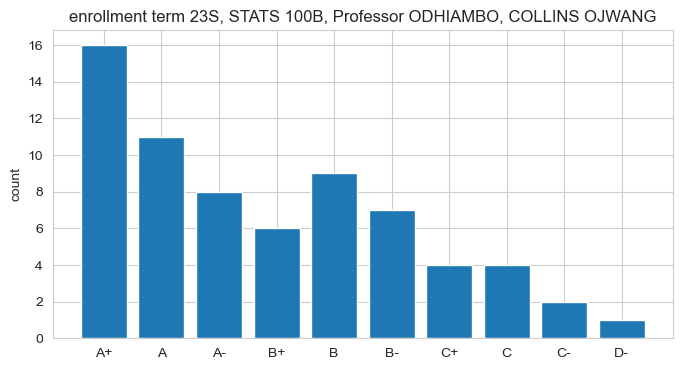

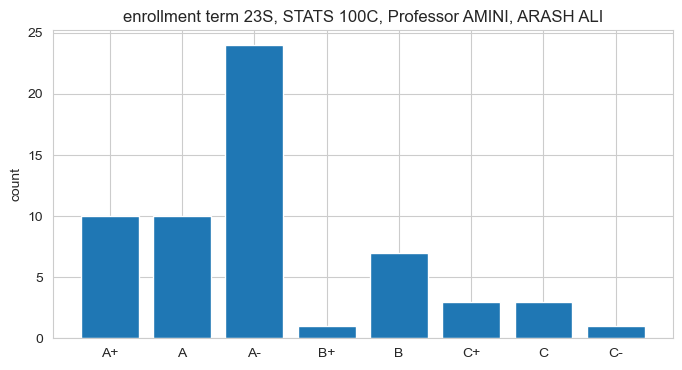

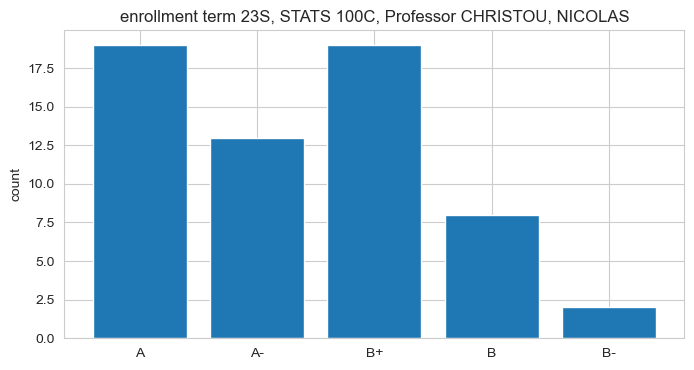

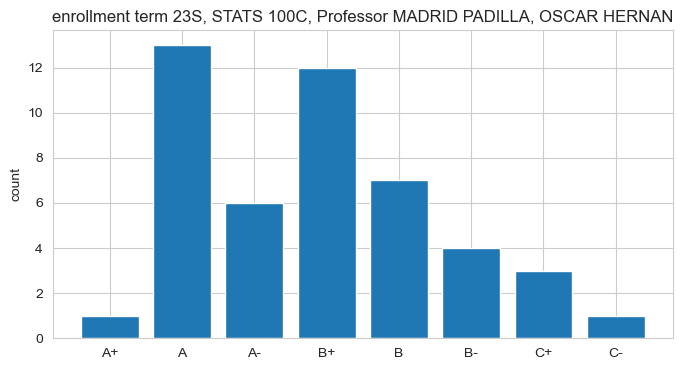

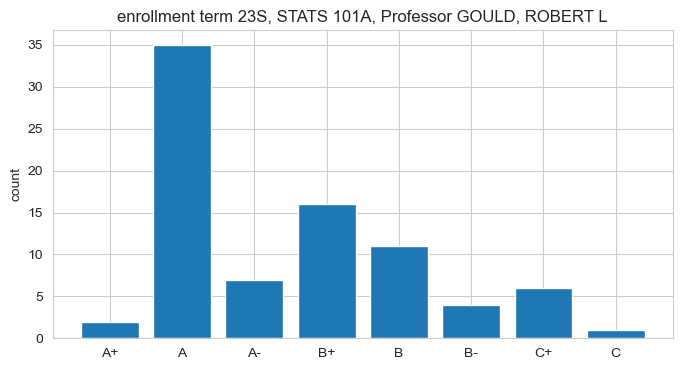

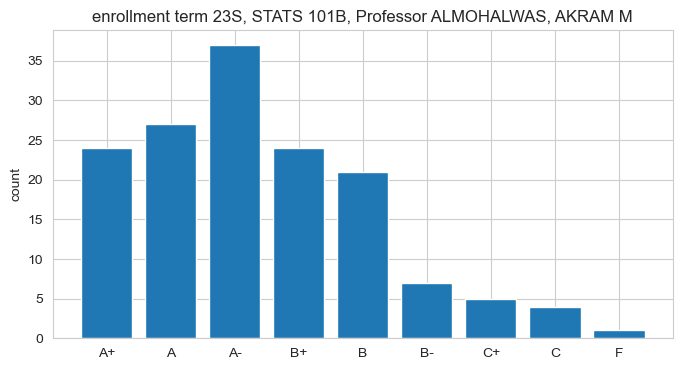

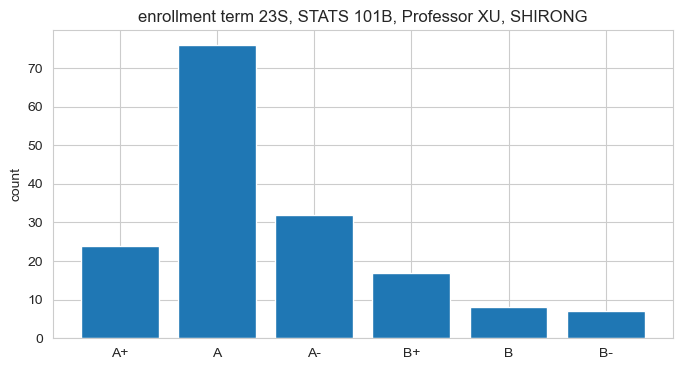

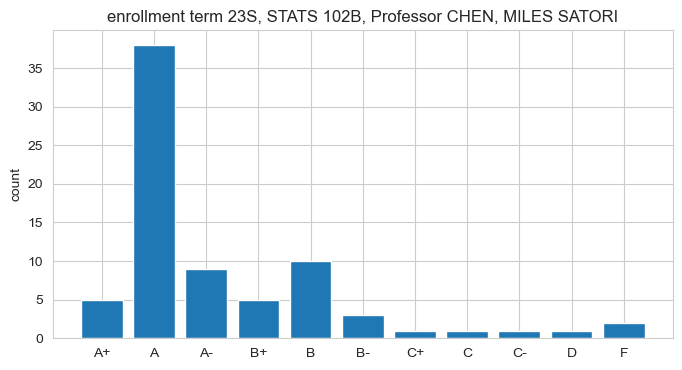

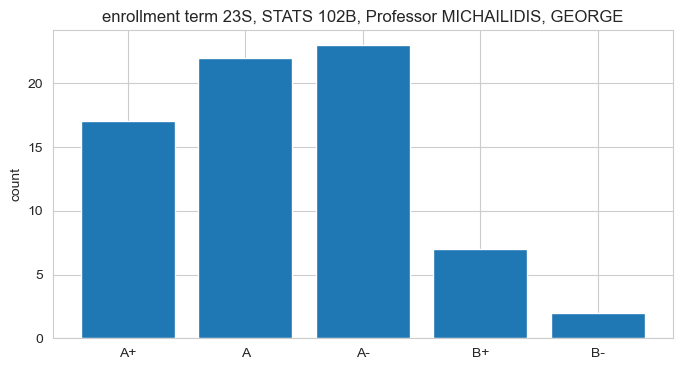

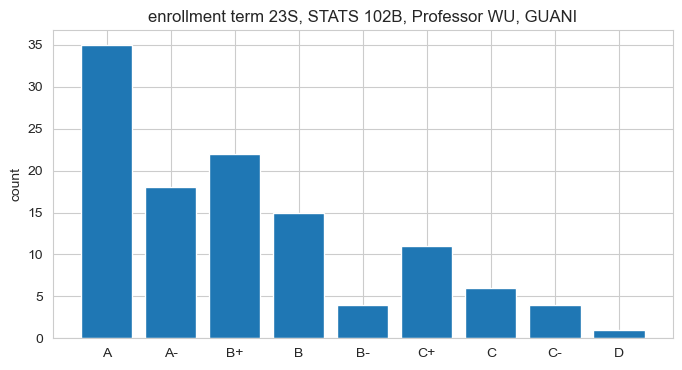

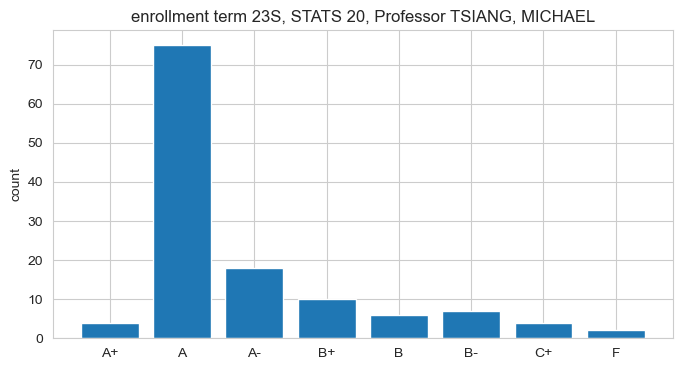

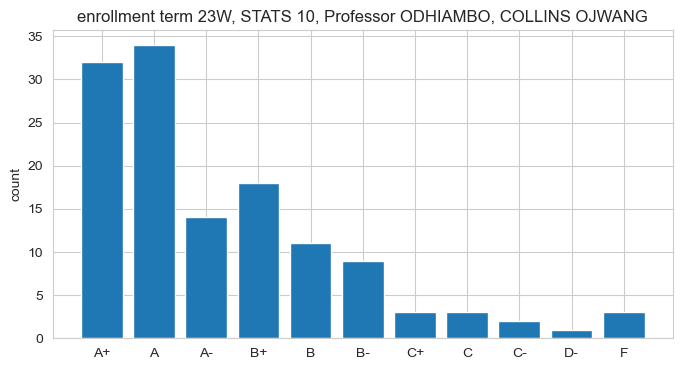

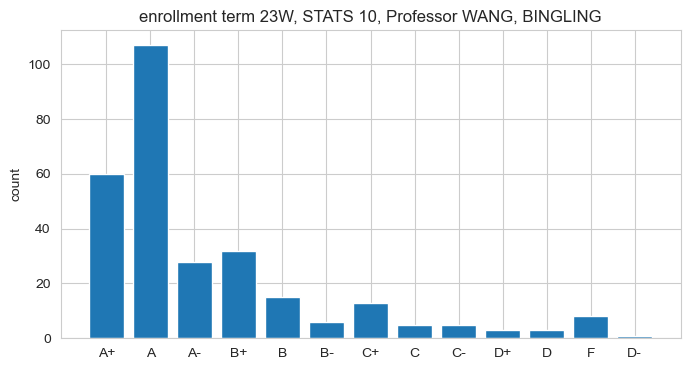

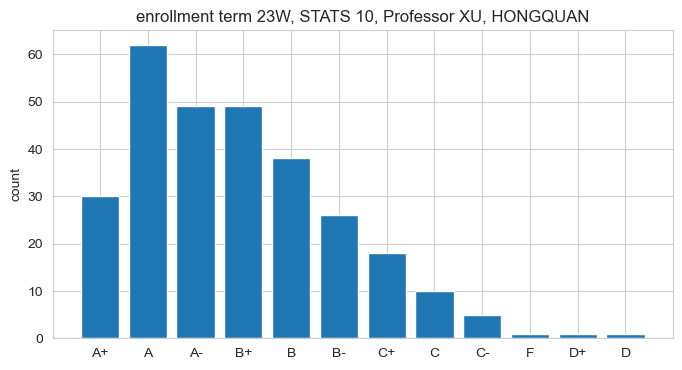

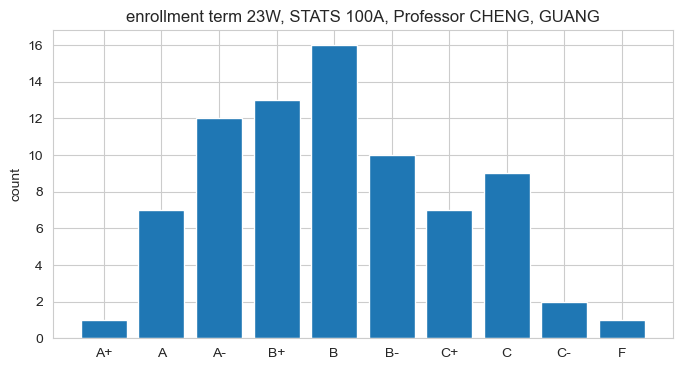

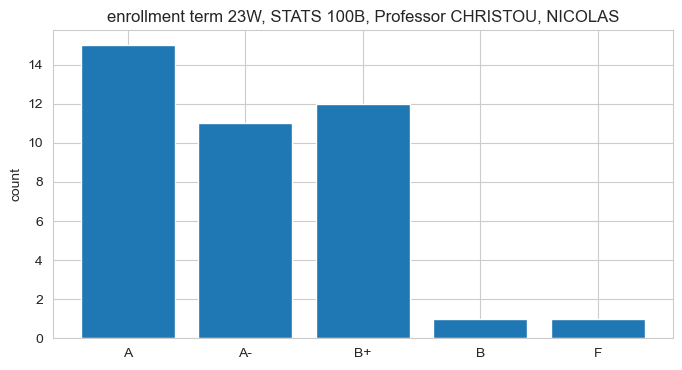

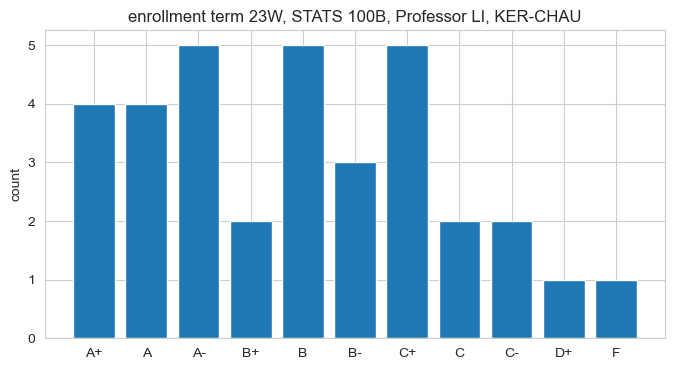

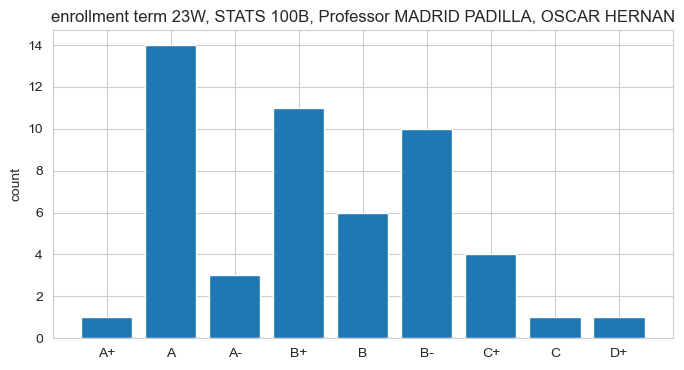

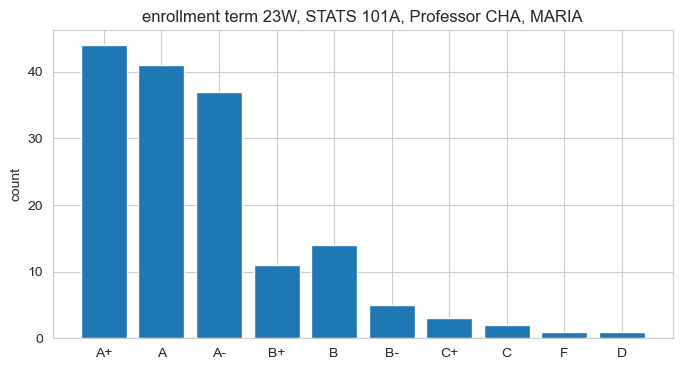

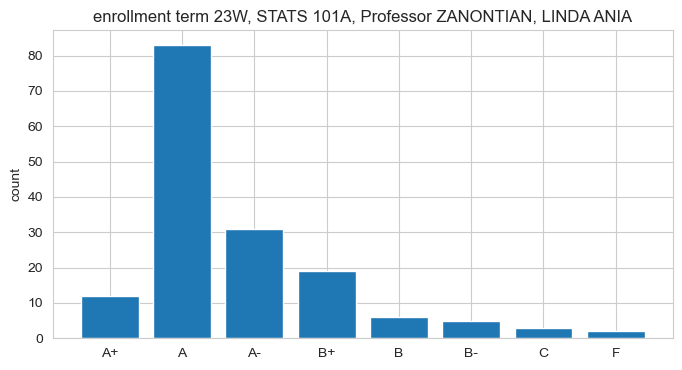

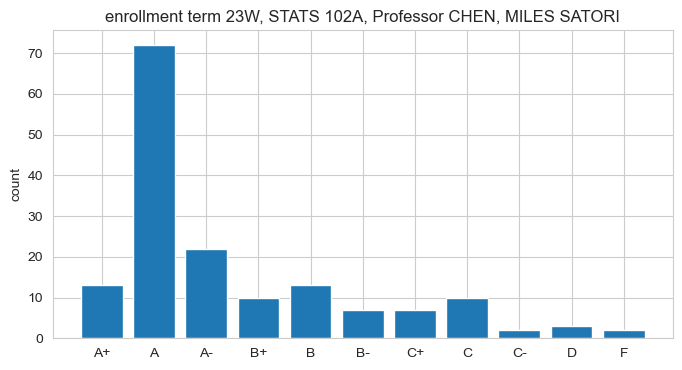

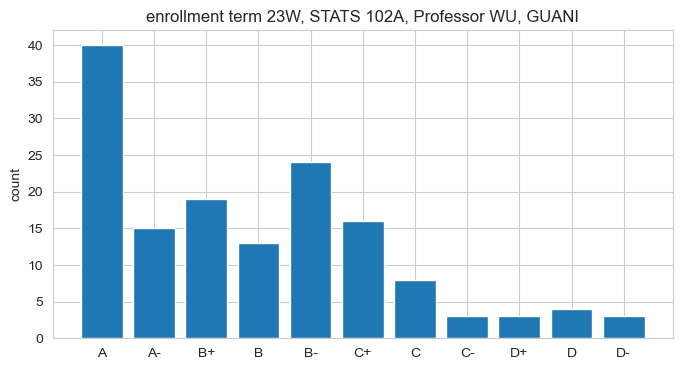

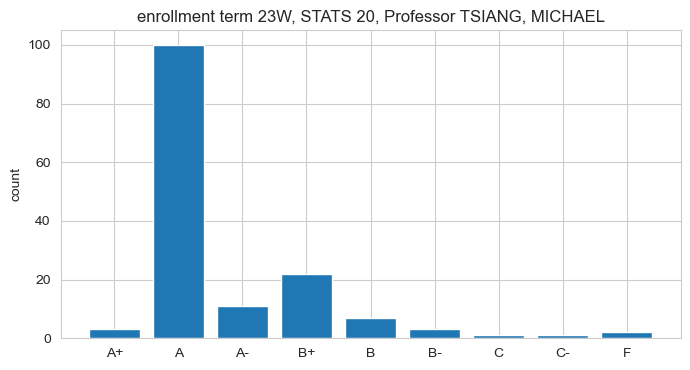

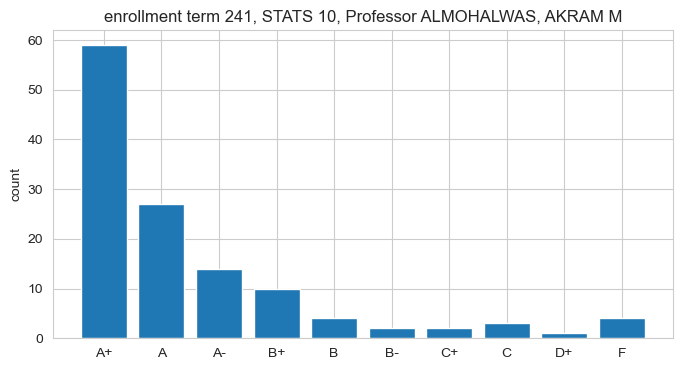

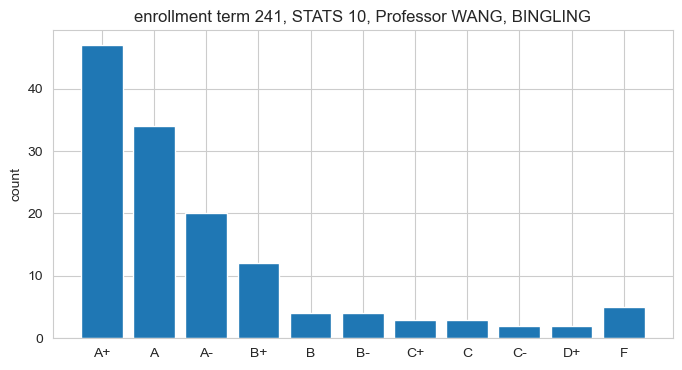

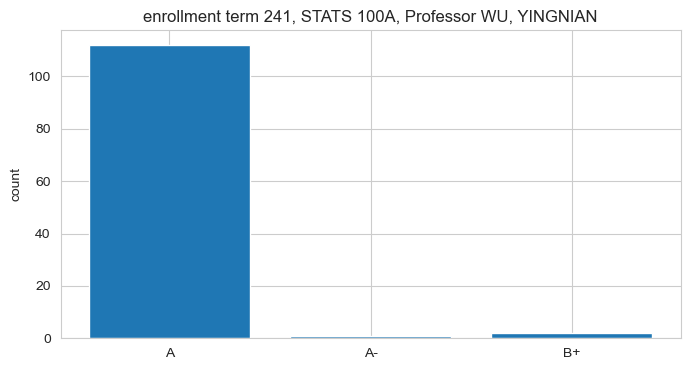

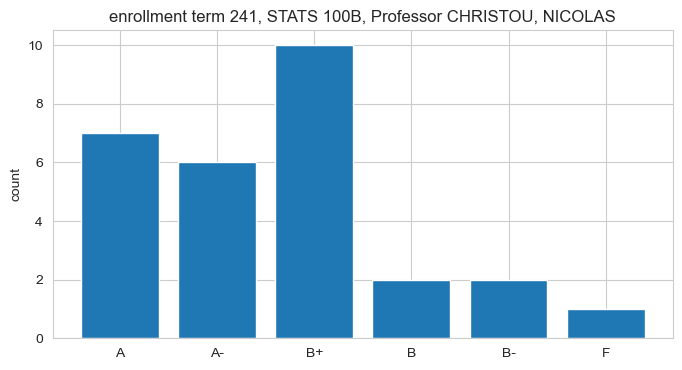

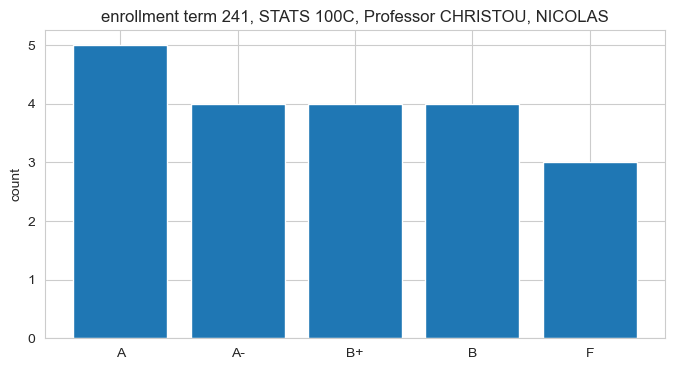

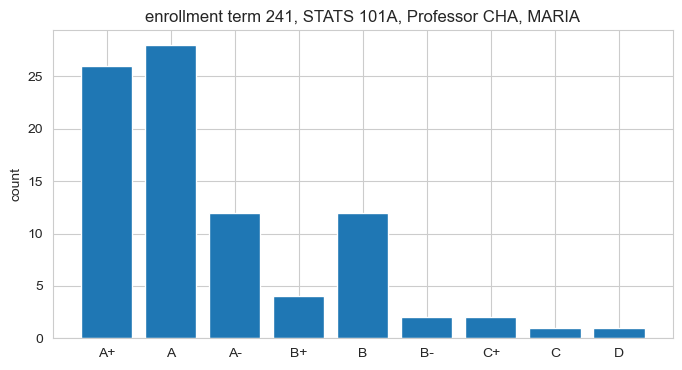

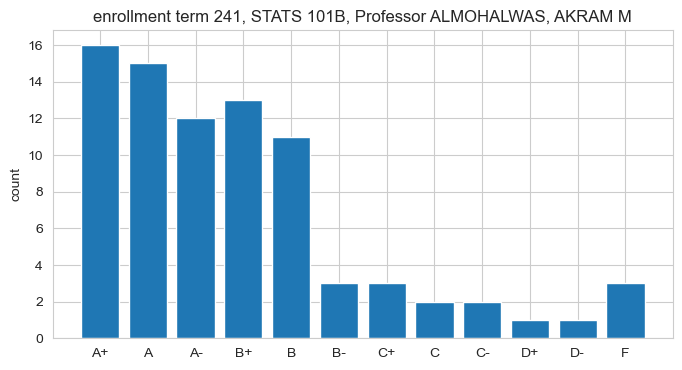

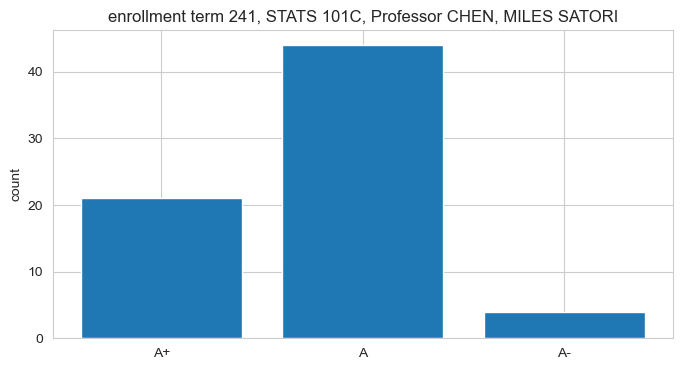

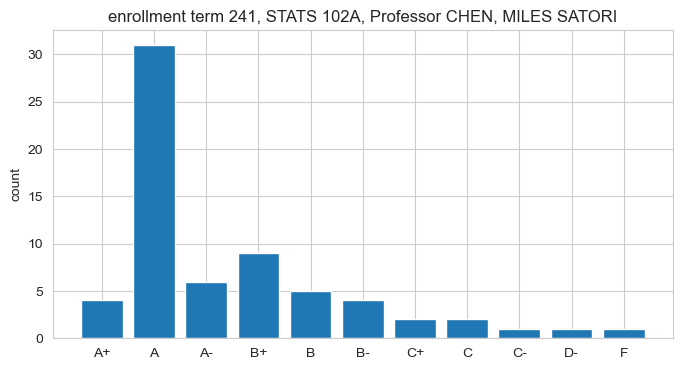

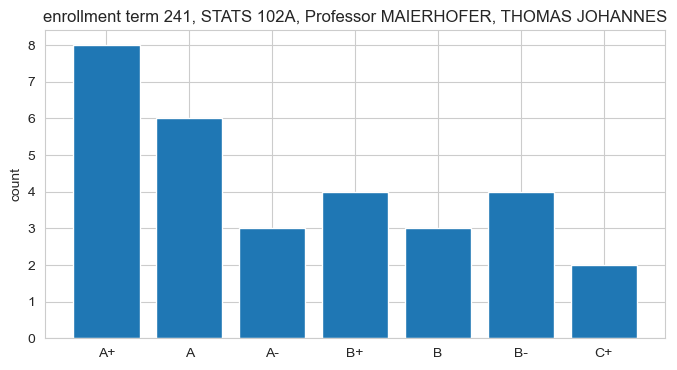

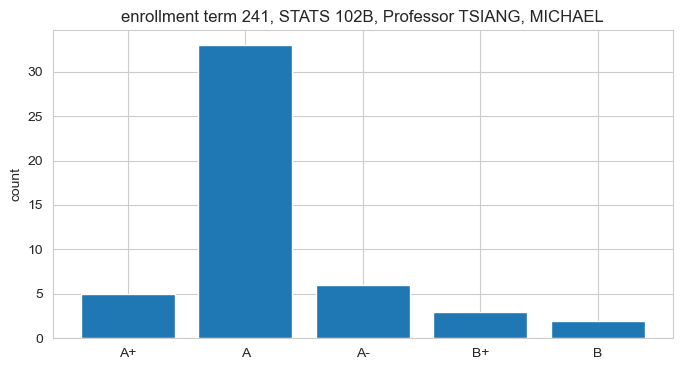

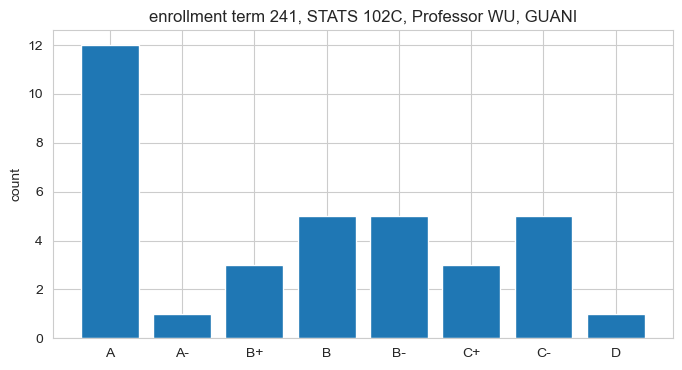

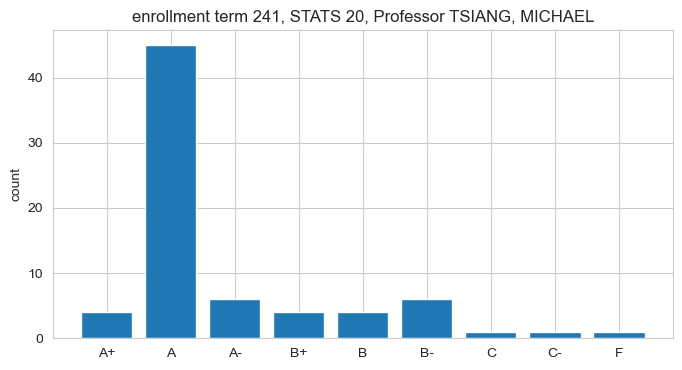

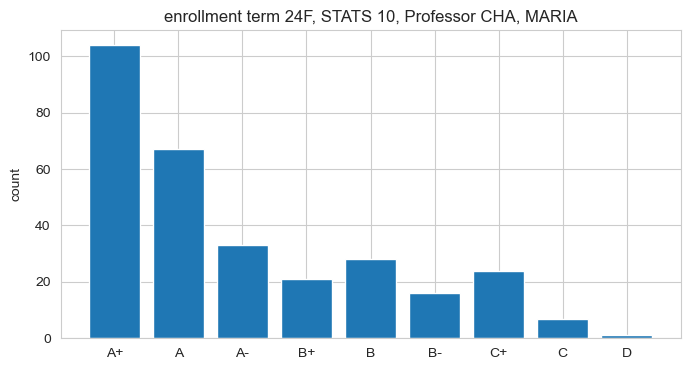

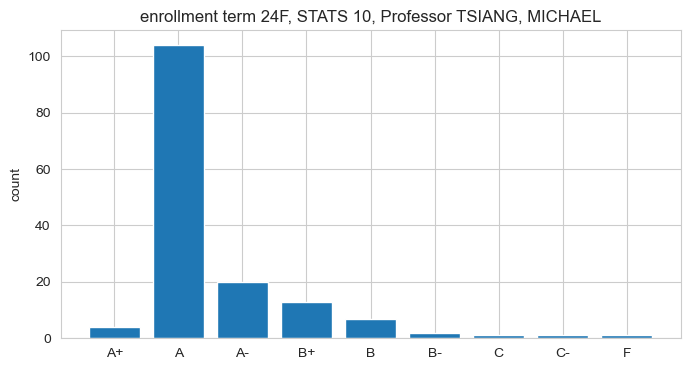

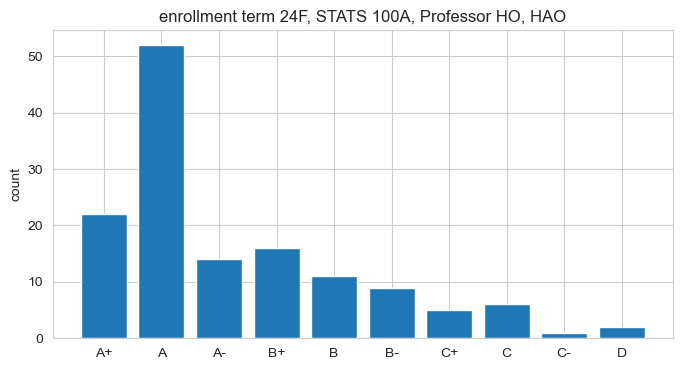

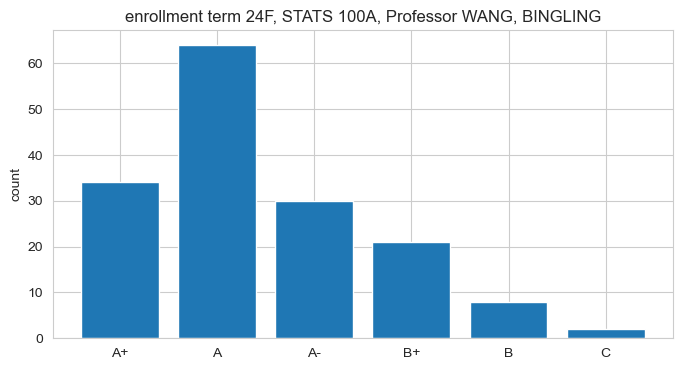

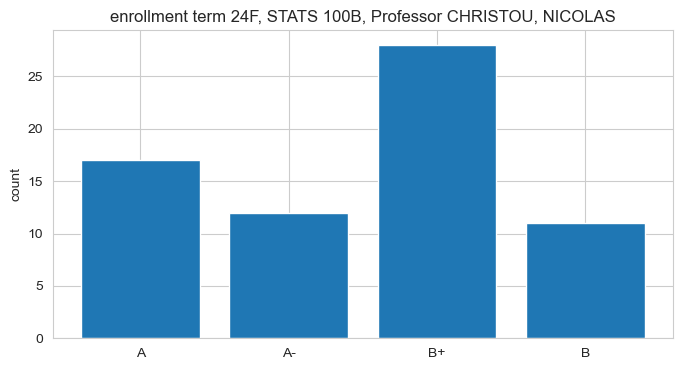

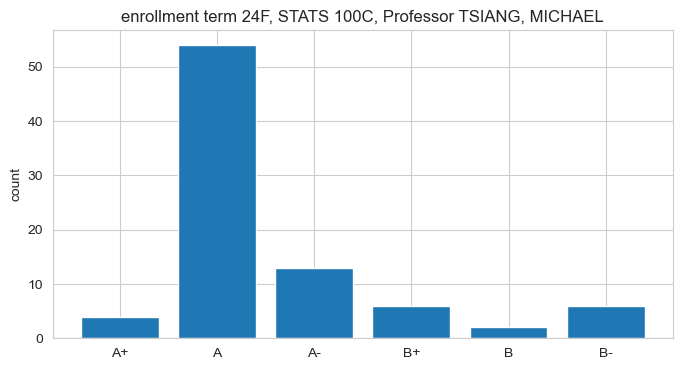

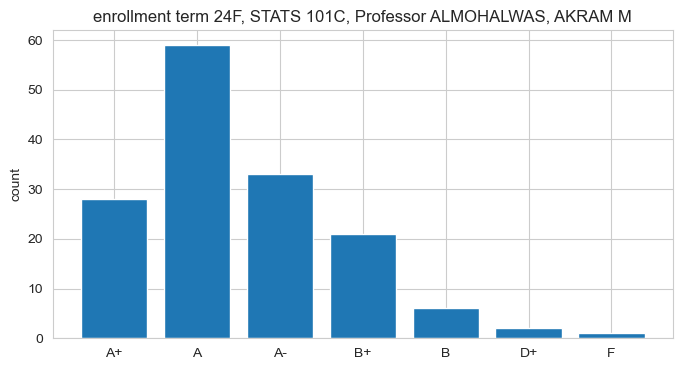

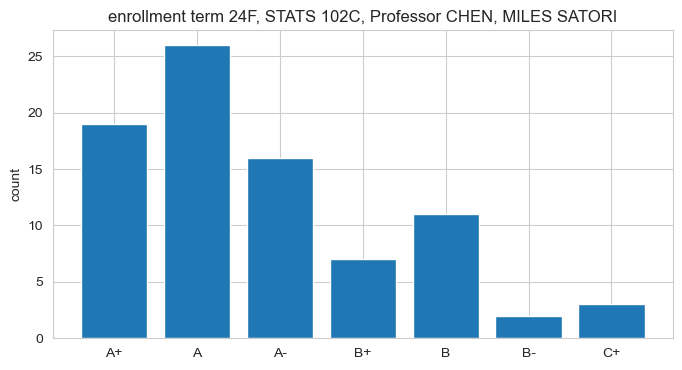

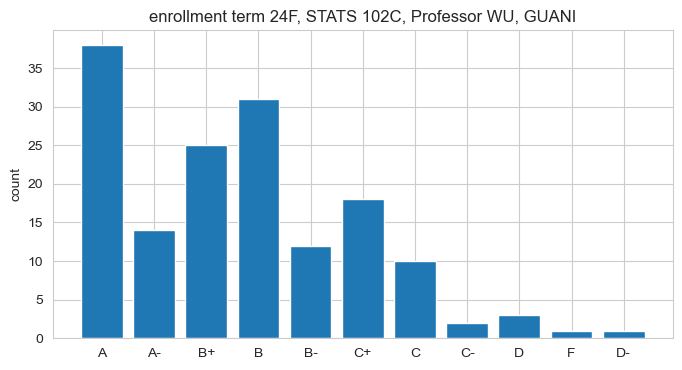

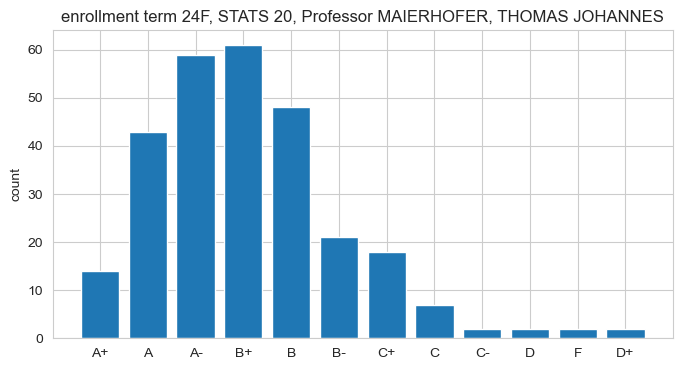

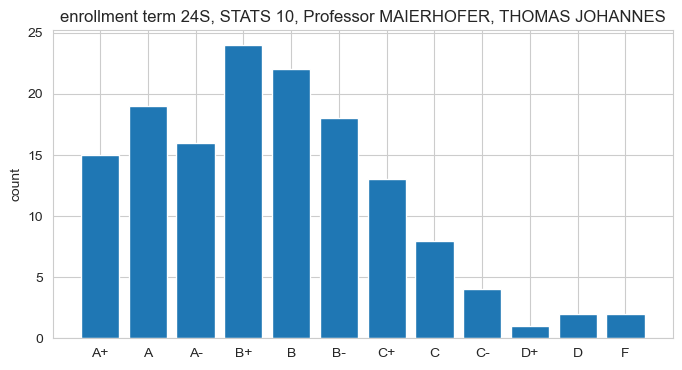

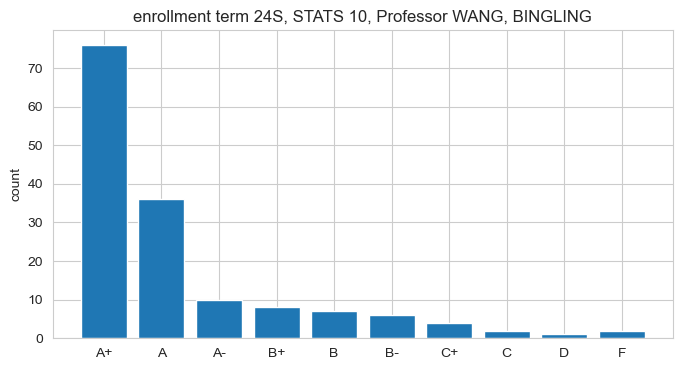

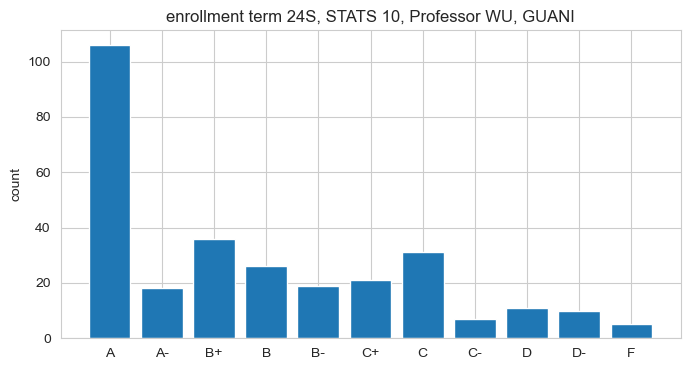

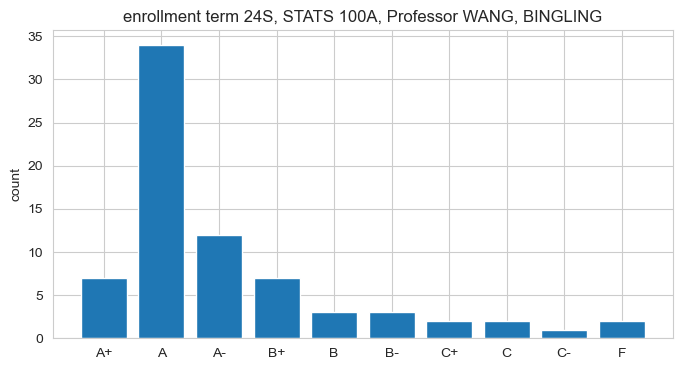

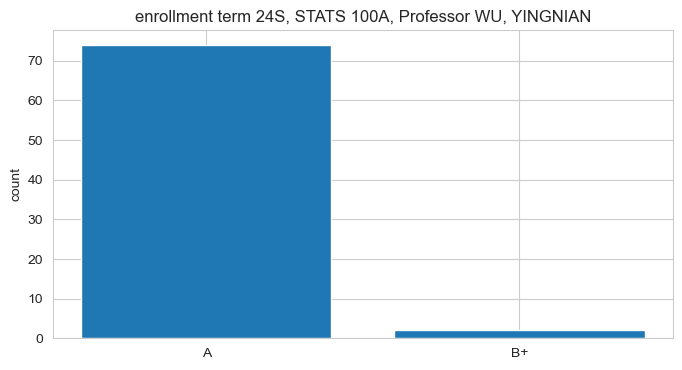

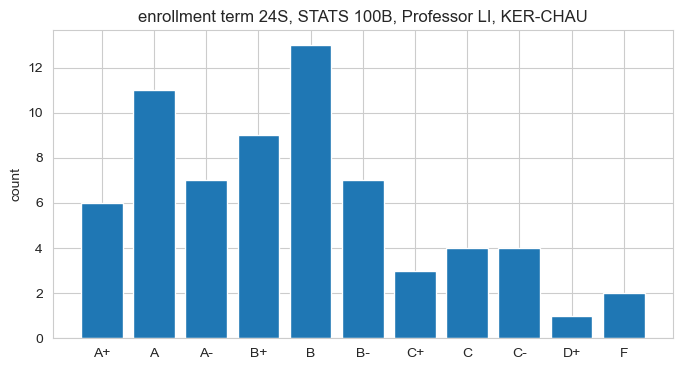

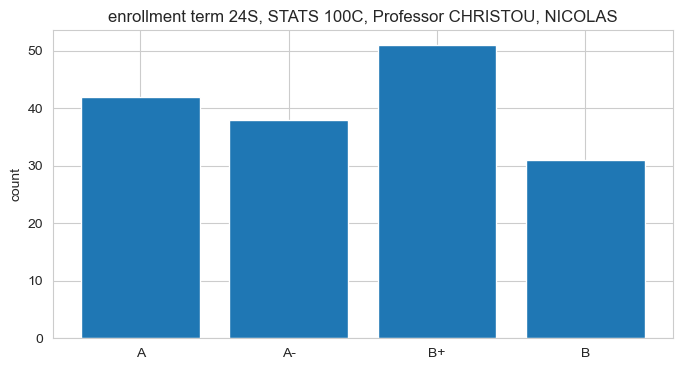

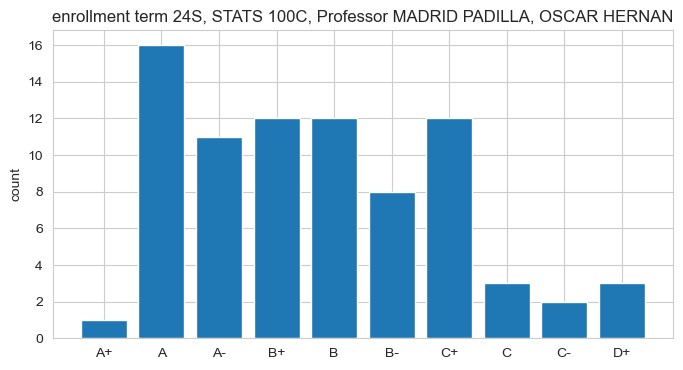

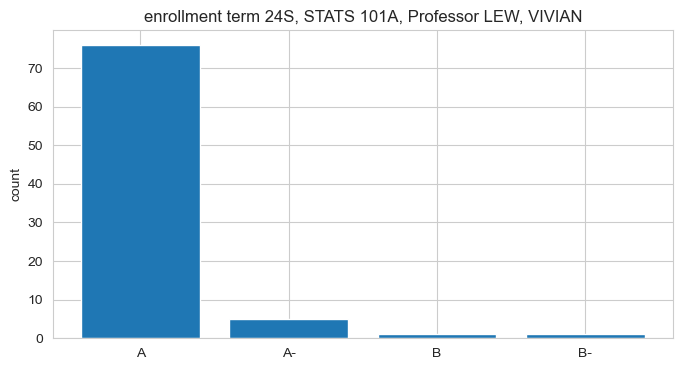

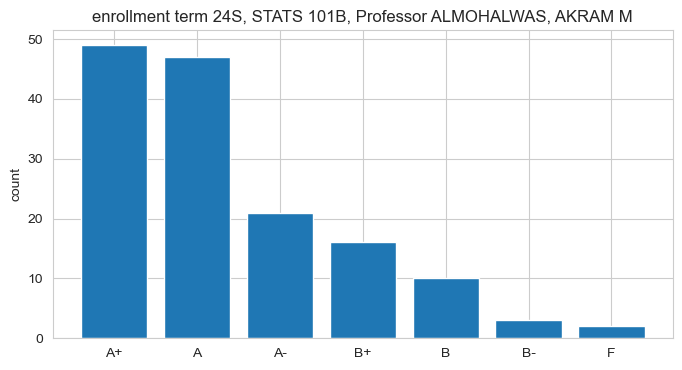

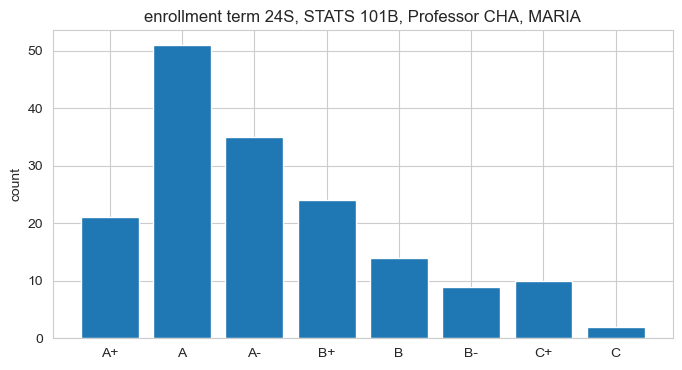

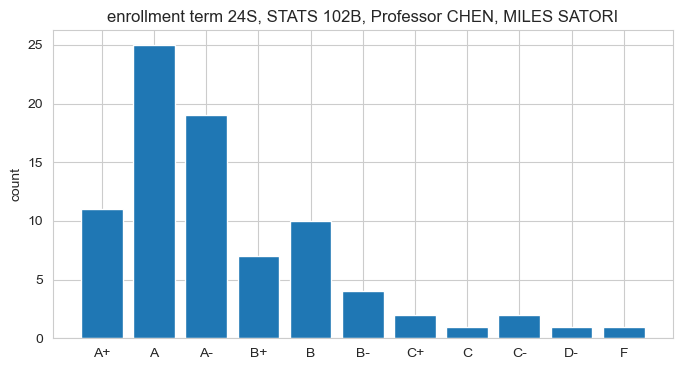

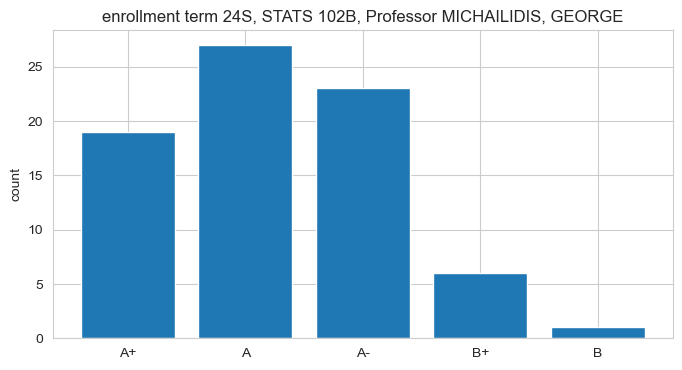

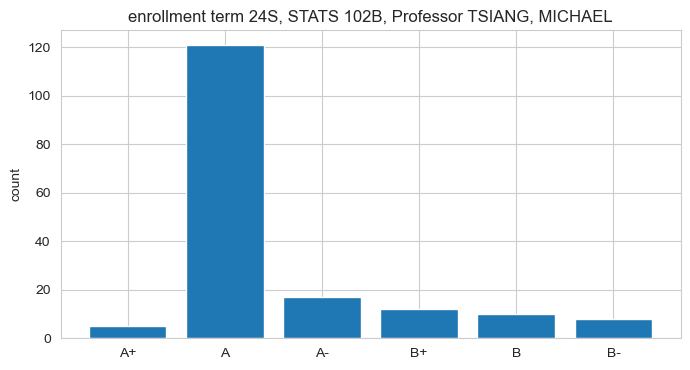

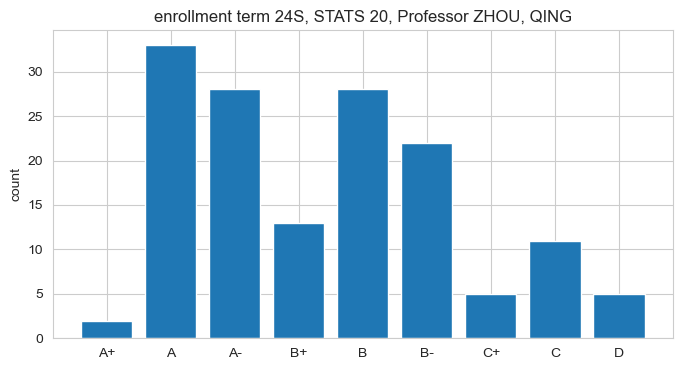

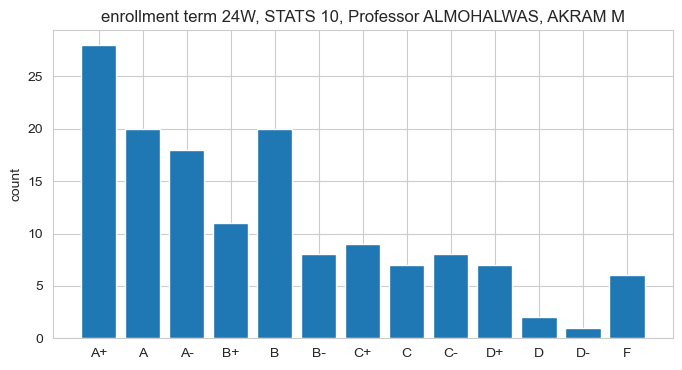

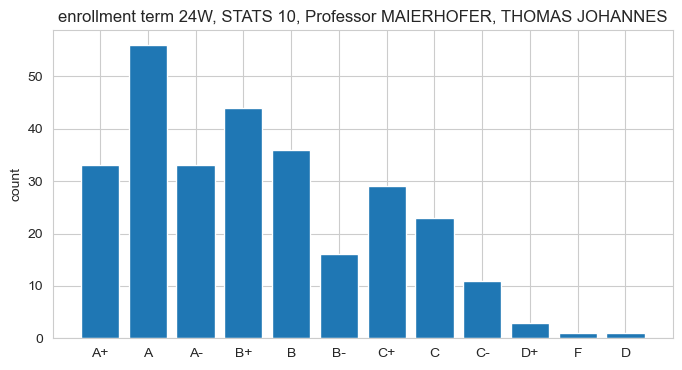

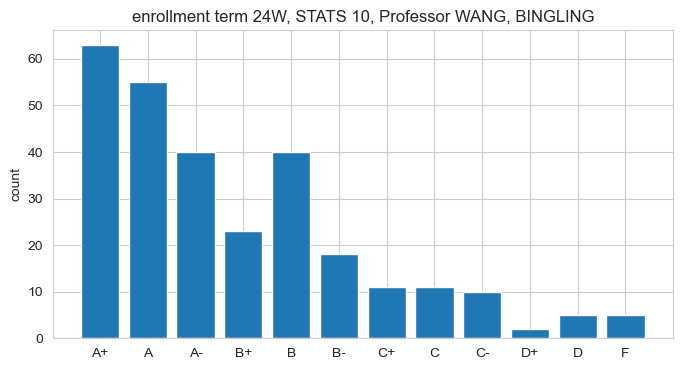

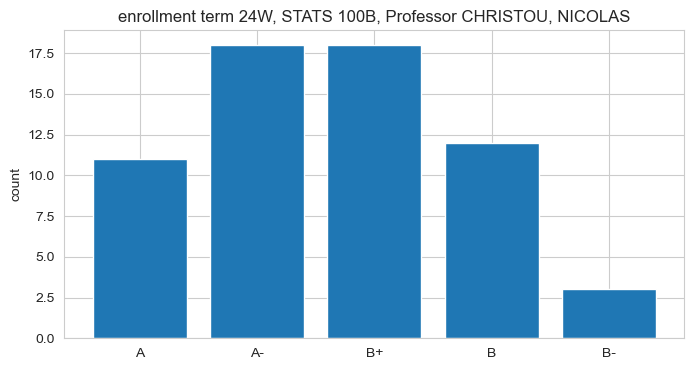

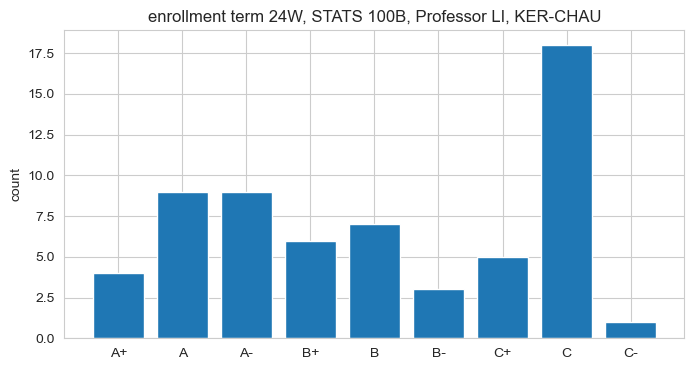

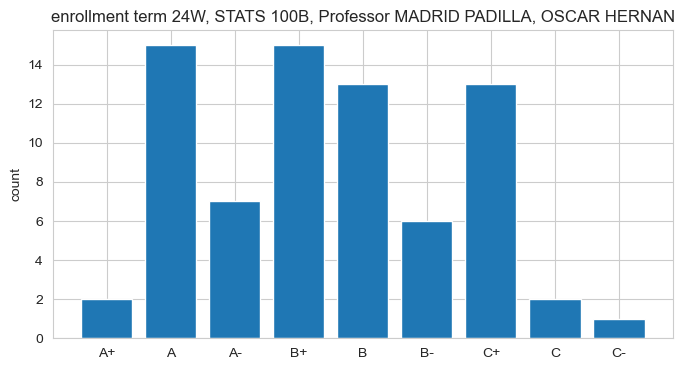

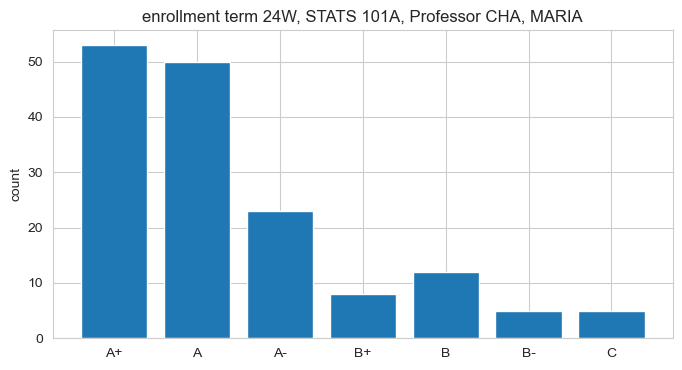

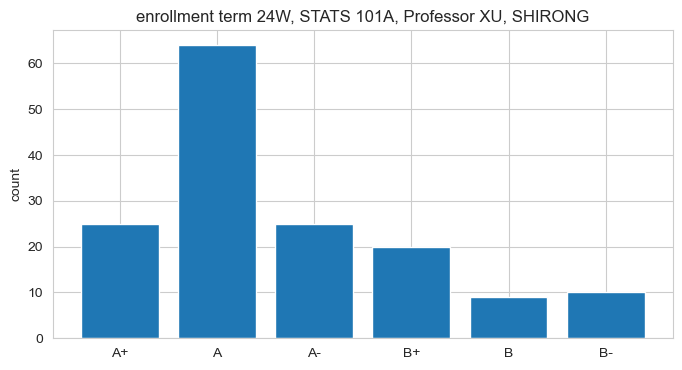

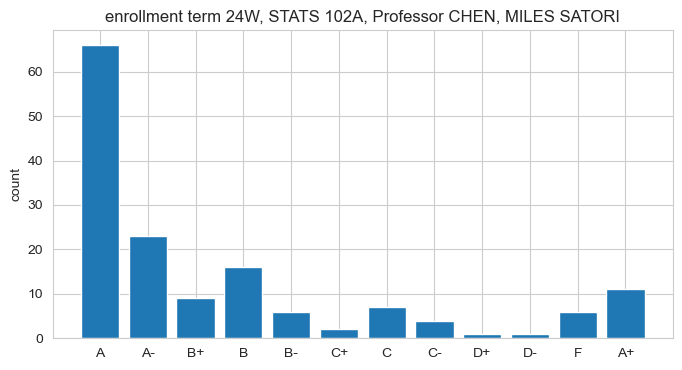

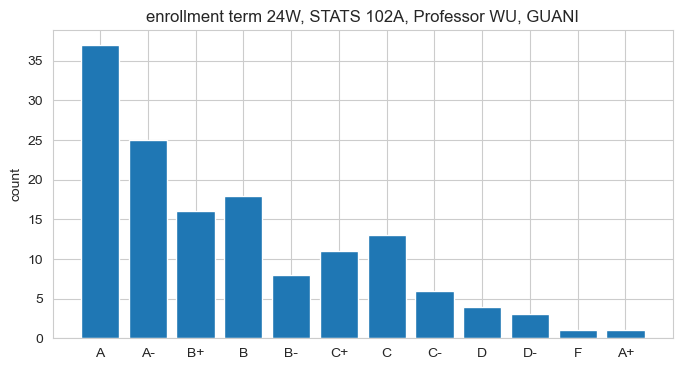

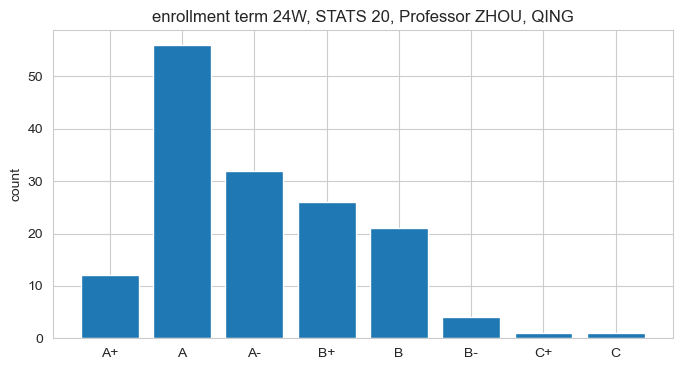

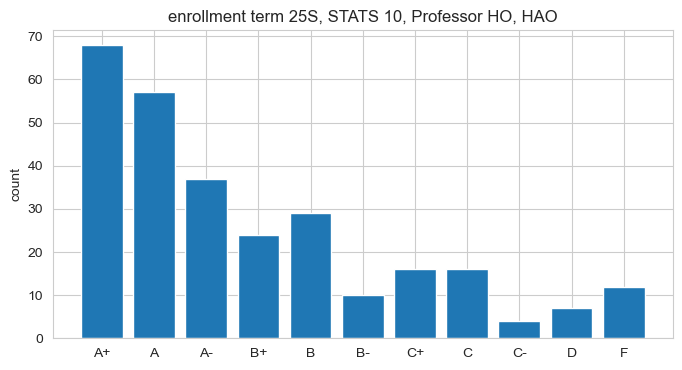

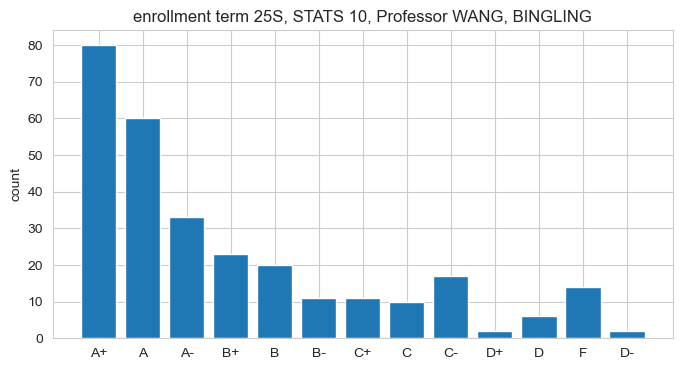

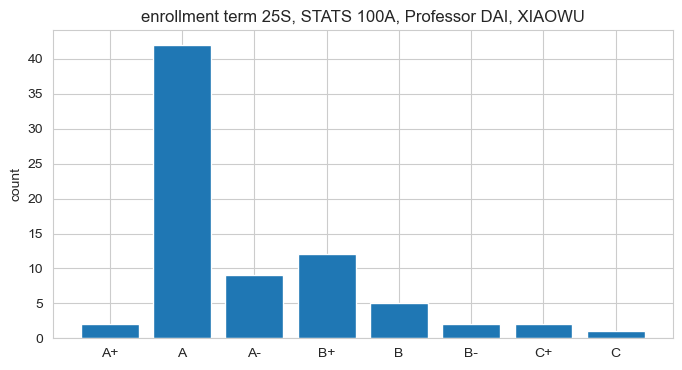

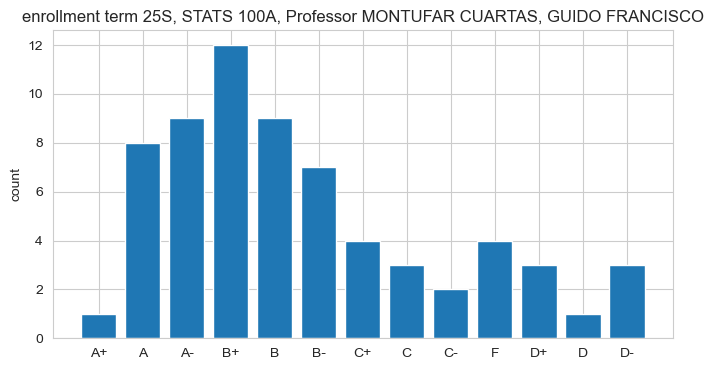

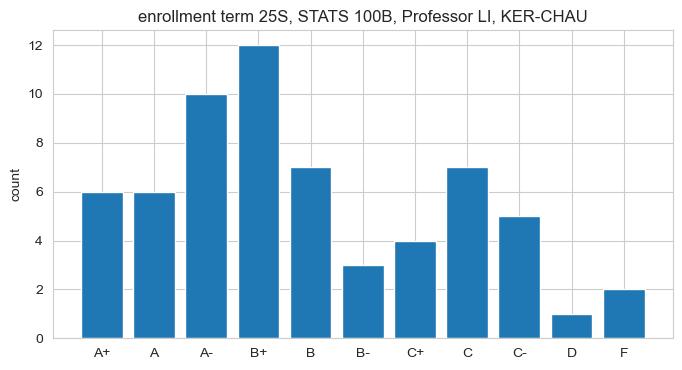

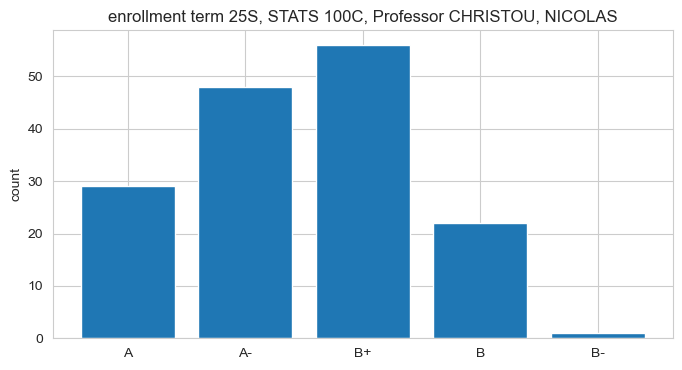

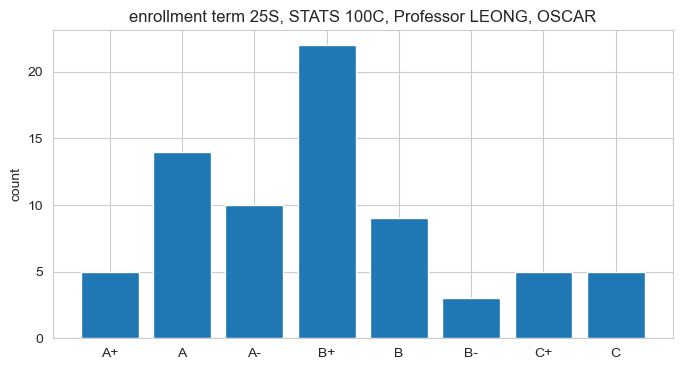

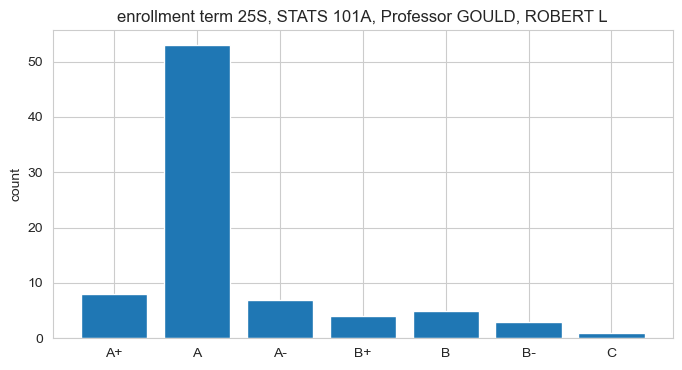

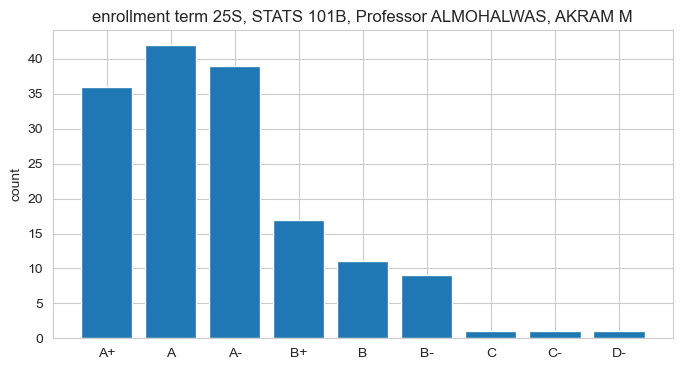

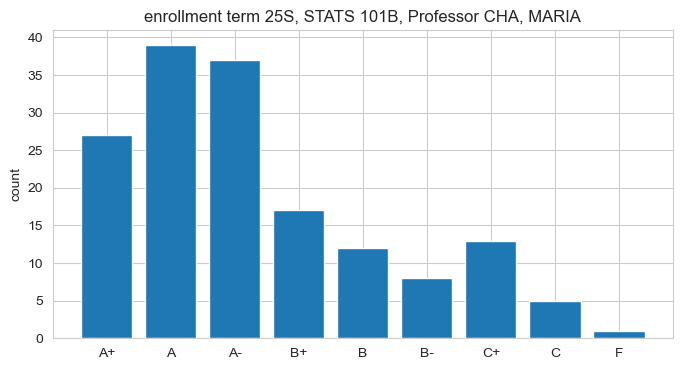

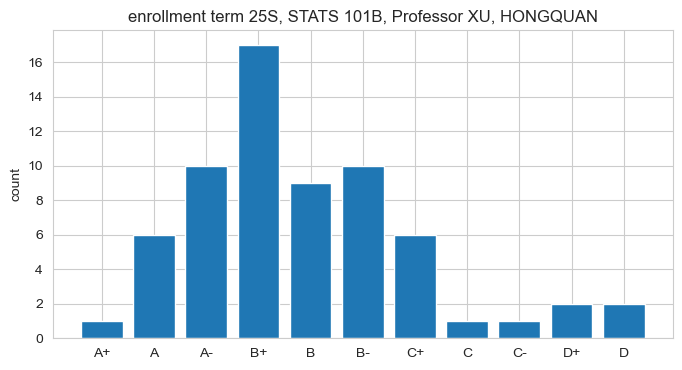

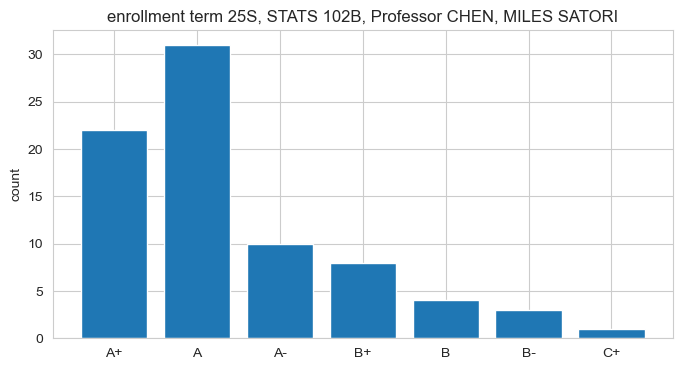

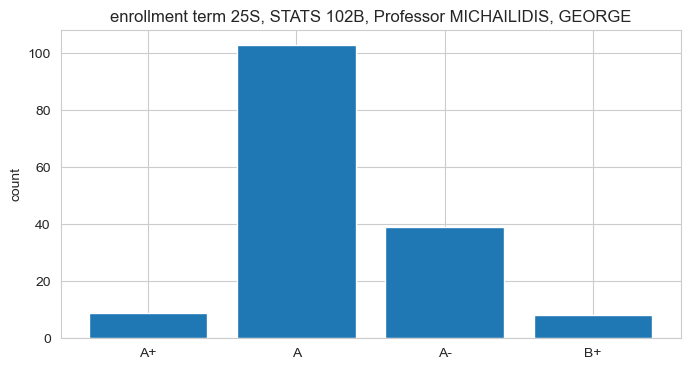

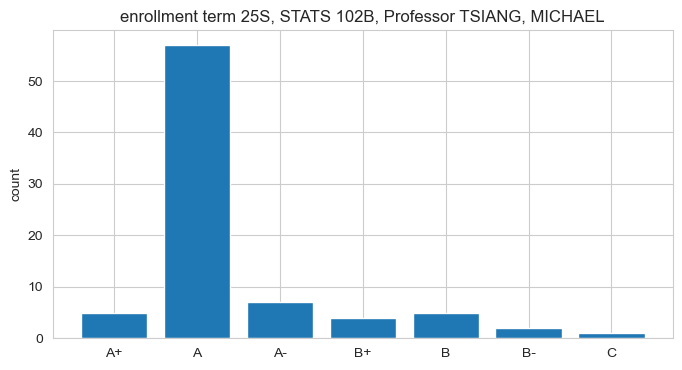

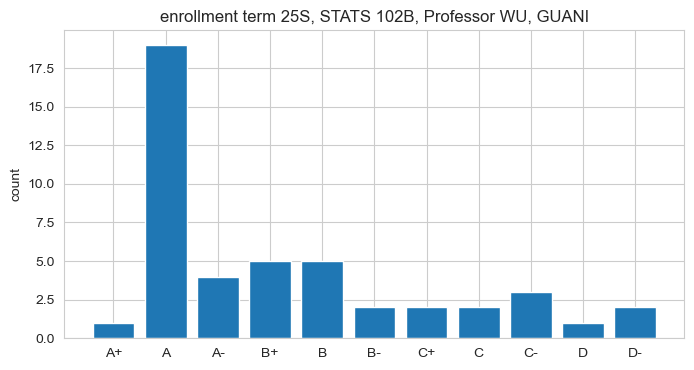

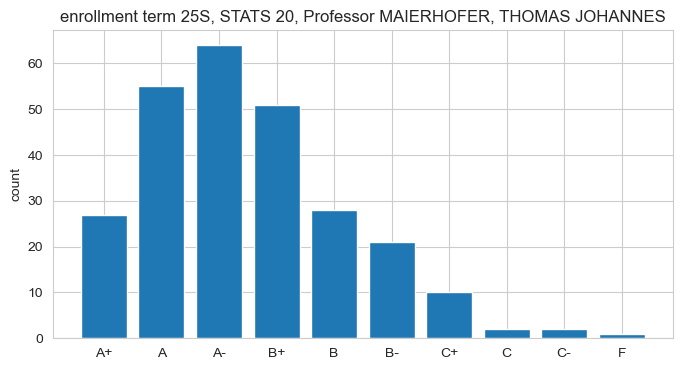

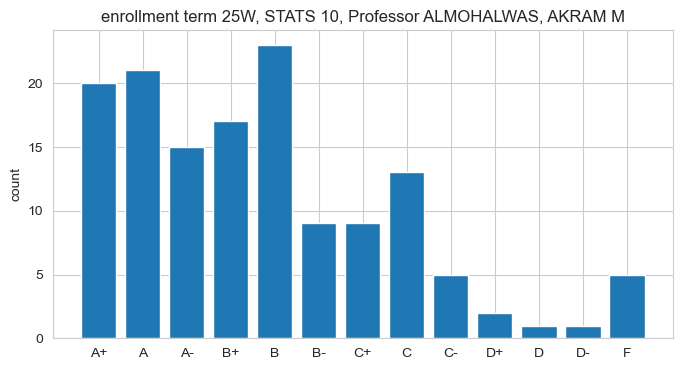

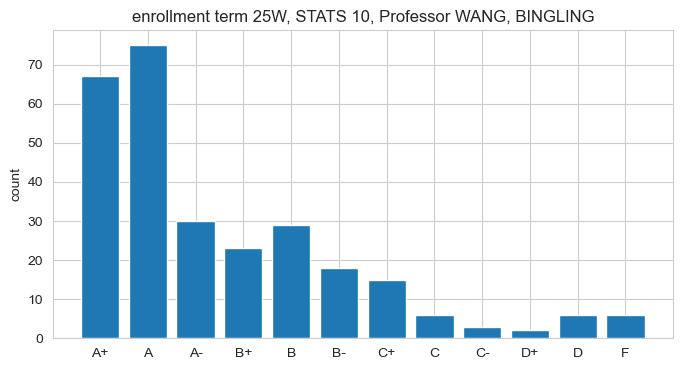

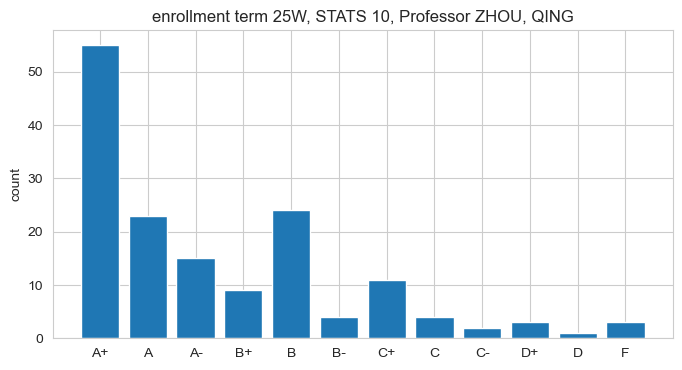

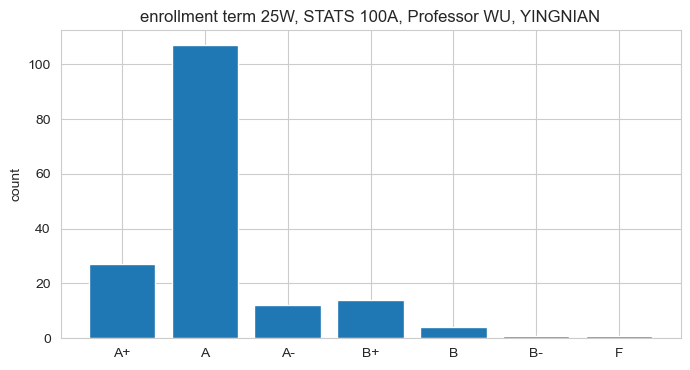

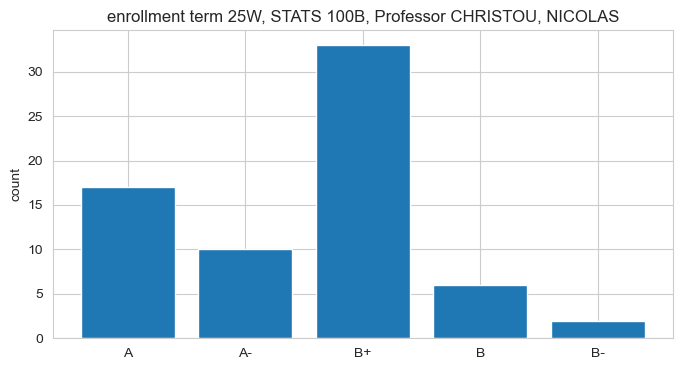

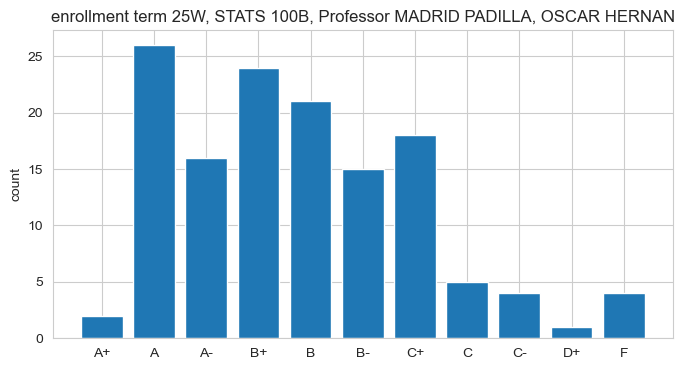

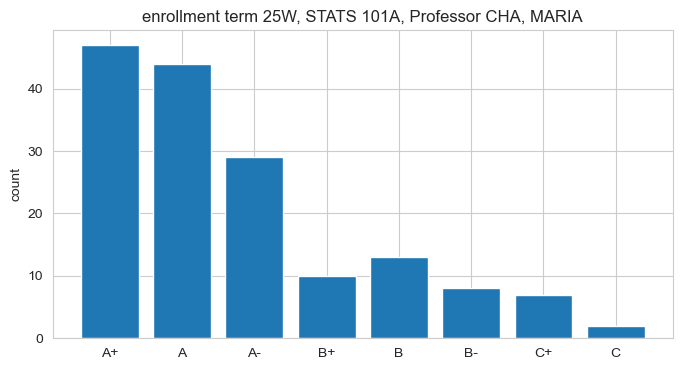

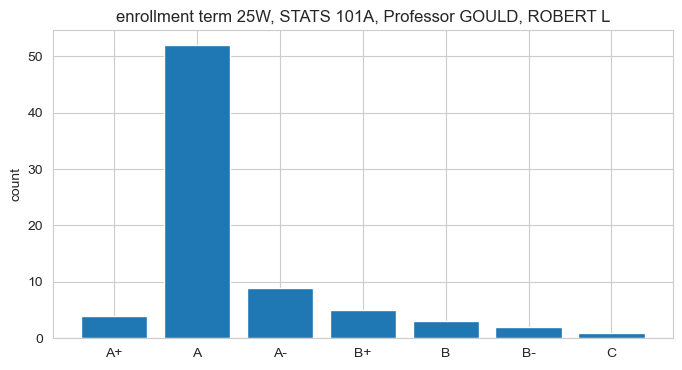

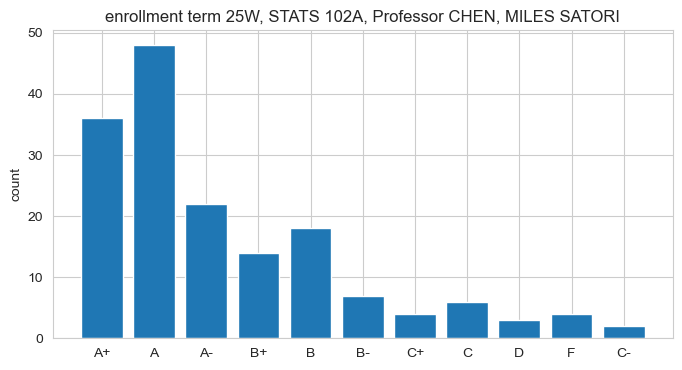

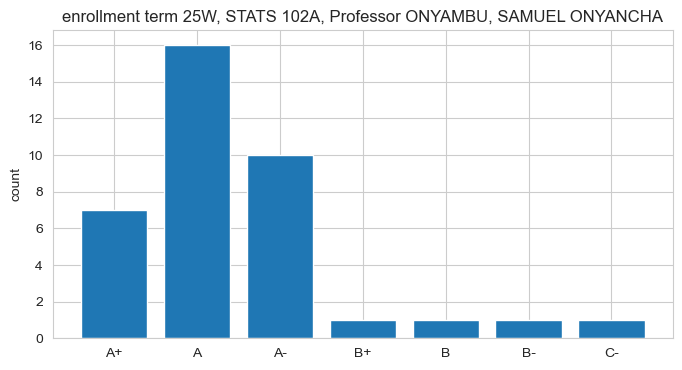

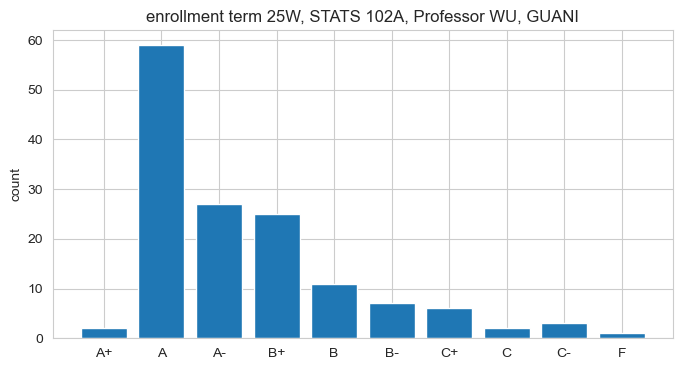

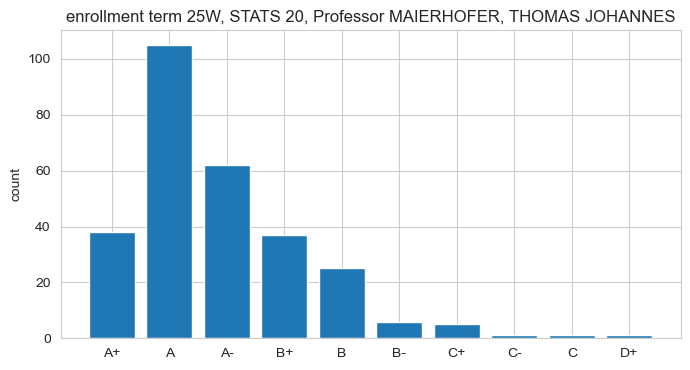

In [285]:
ucla_grades.head()

# classes are differentiated through their enrollment term and course number AND PROFESSOR
for (term, course, prof), group in ucla_grades.groupby(['ENROLLMENT TERM', 'CATLG NBR', 'INSTR NAME']):
    plt.figure(figsize=(8, 4))

    plt.bar(group['GRD OFF'], group['GRD COUNT'])
    plt.title(f"enrollment term {term}, STATS {course}, Professor {prof}")
    plt.ylabel('count')
    plt.show()


#### Data Visualizations! 

In [286]:
# Dictionary mapping of grades to gpa
d = {'A+': 4, 'A': 4, 'A-': 3.7, 'B+': 3.3, 'B': 3, 'B-': 2.7, 'C+': 2.3, 'C': 2, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'D-': 0.7, 'F': 0}
ucla_grades['AVG_GPA'] = [d[x] for x in ucla_grades['GRD OFF']]
ucla_grades.head()
berkeley_grades['AVG_GPA'] = [d[x] for x in berkeley_grades['GRD OFF']]
berkeley_grades.head()

ENROLLMENT TERM SUBJECT AREA CATLG NBR GRD OFF  GRD COUNT  ENRL TOT  \
0             20F        STATS         2      A+         31       257   
1             20F        STATS         2       A         76       257   
2             20F        STATS         2      A-         59       257   
3             20F        STATS         2      B+         27       257   
4             20F        STATS         2       B         27       257   

              LONG CRSE TITLE  AVG_GPA  
0  Introduction to Statistics      4.0  
1  Introduction to Statistics      4.0  
2  Introduction to Statistics      3.7  
3  Introduction to Statistics      3.3  
4  Introduction to Statistics      3.0

##### Katherine's Visualizations


In [287]:
# Keep only lines for A+s (aka 4.0s), then keep only the ones for STATS 10
gpas_to_remove = [3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]

ucla_grades_a = ucla_grades[~ucla_grades['AVG_GPA'].isin(gpas_to_remove)]
ucla_grades_a.head()

keep = ['10']
ucla_grades_a = ucla_grades_a[ucla_grades_a['CATLG NBR'].isin(keep)]
ucla_grades_a.head()
# ucla_grades_a.head(100)

ENROLLMENT TERM SUBJECT AREA CATLG NBR  \
0              21F        STATS        10   
1              21F        STATS        10   
9              21F        STATS        10   
10             21F        STATS        10   
22             21F        STATS        10   

                          LONG CRSE TITLE      INSTR NAME GRD OFF  GRD COUNT  \
0   INTRODUCTION TO STATISTICAL REASONING      CHA, MARIA      A+        104   
1   INTRODUCTION TO STATISTICAL REASONING      CHA, MARIA       A         87   
9   INTRODUCTION TO STATISTICAL REASONING  WANG, BINGLING      A+         63   
10  INTRODUCTION TO STATISTICAL REASONING  WANG, BINGLING       A        107   
22  INTRODUCTION TO STATISTICAL REASONING       WU, GUANI      A+          1   

    ENRL TOT  AVG_GPA  
0        291      4.0  
1        291      4.0  
9        270      4.0  
10       270      4.0  
22       136      4.0

In [288]:
# Map UCLA terms to equivalent years
term_to_year = {
    "21F" : 2021,
    "22W" : 2021,
    "22S" : 2021,
    "221" : 2021,
    "22F" : 2022,
    "23W" : 2022,
    "23S" : 2022,
    "231" : 2022,
    "23F" : 2023,
    "24W" : 2023,
    "24S" : 2023,
    "241" : 2023,
    "24F" : 2024,
    "25W" : 2024,
    "25S" : 2024
}

ucla_grades_a['YEAR'] = ucla_grades_a['ENROLLMENT TERM']

ucla_grades_a["YEAR"] = ucla_grades_a["YEAR"].map(lambda row: term_to_year[row])
ucla_grades_a.head()

ENROLLMENT TERM SUBJECT AREA CATLG NBR  \
0              21F        STATS        10   
1              21F        STATS        10   
9              21F        STATS        10   
10             21F        STATS        10   
22             21F        STATS        10   

                          LONG CRSE TITLE      INSTR NAME GRD OFF  GRD COUNT  \
0   INTRODUCTION TO STATISTICAL REASONING      CHA, MARIA      A+        104   
1   INTRODUCTION TO STATISTICAL REASONING      CHA, MARIA       A         87   
9   INTRODUCTION TO STATISTICAL REASONING  WANG, BINGLING      A+         63   
10  INTRODUCTION TO STATISTICAL REASONING  WANG, BINGLING       A        107   
22  INTRODUCTION TO STATISTICAL REASONING       WU, GUANI      A+          1   

    ENRL TOT  AVG_GPA  YEAR  
0        291      4.0  2021  
1        291      4.0  2021  
9        270      4.0  2021  
10       270      4.0  2021  
22       136      4.0  2021

In [289]:
# Group lines by year, then calculate the A+ rate and drop irrelevant columns
combined_ucla_grades = (
    ucla_grades_a
    .groupby("YEAR", as_index=False)[["GRD COUNT", "ENRL TOT"]]
    .sum()
)
combined_ucla_grades['A+ RATE'] = combined_ucla_grades['GRD COUNT'] / combined_ucla_grades['ENRL TOT']
combined_ucla_grades = combined_ucla_grades.drop(['GRD COUNT', 'ENRL TOT'], axis=1)
combined_ucla_grades.head()

YEAR   A+ RATE
0  2021  0.300266
1  2022  0.264982
2  2023  0.237630
3  2024  0.251877

In [290]:
# Edit CDS dataframe to only keep UCLA data about percentage of students with 4.0s
columns_to_keep = ['school', 'year', 'uw_gpa_400']
cds_40s_ucla = common_data_set[columns_to_keep]
ucla_rows = ['UCLA']
cds_40s_ucla = cds_40s_ucla[cds_40s_ucla['school'].isin(ucla_rows)]
years_to_keep = [2021, 2022, 2023, 2024]
cds_40s_ucla = cds_40s_ucla[cds_40s_ucla['year'].isin(years_to_keep)]
cds_40s_ucla = cds_40s_ucla.reset_index(drop=True)
combined_ucla_grades['4.0 RATE'] = cds_40s_ucla['uw_gpa_400']
combined_ucla_grades.head()

YEAR   A+ RATE  4.0 RATE
0  2021  0.300266     55.40
1  2022  0.264982     59.10
2  2023  0.237630     59.00
3  2024  0.251877     56.31

In [291]:
# Map Berkeley grades to GPA equivalents, keep only A+s (4.0s) for STATS 2
berkeley_grades_a = berkeley_grades[~berkeley_grades['AVG_GPA'].isin(gpas_to_remove)]
keep = ['2']
berkeley_grades_a = berkeley_grades_a[berkeley_grades_a['CATLG NBR'].isin(keep)]
berkeley_grades_a.tail()

ENROLLMENT TERM SUBJECT AREA CATLG NBR GRD OFF  GRD COUNT  ENRL TOT  \
120             24F        STATS         2       A        109       479   
129             25S        STATS         2      A+         22       503   
130             25S        STATS         2       A        126       503   
139             251        STATS         2      A+          5       163   
140             251        STATS         2       A         45       163   

                LONG CRSE TITLE  AVG_GPA  
120  Introduction to Statistics      4.0  
129  Introduction to Statistics      4.0  
130  Introduction to Statistics      4.0  
139  Introduction to Statistics      4.0  
140  Introduction to Statistics      4.0

In [292]:
# Map terms to year equivalents, drop irrelevant columns
term_to_year = {
    "20F" : 2020,
    "21S" : 2020,
    "211" : 2020,
    "21F" : 2021,
    "22S" : 2021,
    "221" : 2021,
    "22F" : 2022,
    "23S" : 2022,
    "231" : 2022,
    "23F" : 2023,
    "24S" : 2023,
    "241" : 2023,
    "24F" : 2024,
    "25S" : 2024,
    "251" : 2024
} # use new dictionary bc berkeley uses different terms than UCLA (bc semester system)
berkeley_grades_a['YEAR'] = berkeley_grades_a['ENROLLMENT TERM']
berkeley_grades_a["YEAR"] = berkeley_grades_a["YEAR"].map(lambda row: term_to_year[row])
berkeley_grades_a.reset_index()
berkeley_grades_a.head()

ENROLLMENT TERM SUBJECT AREA CATLG NBR GRD OFF  GRD COUNT  ENRL TOT  \
0              20F        STATS         2      A+         31       257   
1              20F        STATS         2       A         76       257   
10             21S        STATS         2      A+         25       268   
11             21S        STATS         2       A         99       268   
19             211        STATS         2      A+          9       110   

               LONG CRSE TITLE  AVG_GPA  YEAR  
0   Introduction to Statistics      4.0  2020  
1   Introduction to Statistics      4.0  2020  
10  Introduction to Statistics      4.0  2020  
11  Introduction to Statistics      4.0  2020  
19  Introduction to Statistics      4.0  2020

In [293]:
# Group by year, calculate A+ rates, drop irrelevant columns
combined_berkeley_grades = (
    berkeley_grades_a
    .groupby("YEAR", as_index=False)[["GRD COUNT", "ENRL TOT"]]
    .sum()
)
combined_berkeley_grades['A+ RATE'] = combined_berkeley_grades['GRD COUNT'] / combined_berkeley_grades['ENRL TOT']
combined_berkeley_grades = combined_berkeley_grades.drop(['GRD COUNT', 'ENRL TOT'], axis=1)
combined_berkeley_grades.head()

YEAR   A+ RATE
0  2020  0.207087
1  2021  0.096328
2  2022  0.119589
3  2023  0.123344
4  2024  0.139301

In [294]:
# Edit CDS dataframe to now only have data on % of admitted students with 4.0s for Berkeley
berk_rows = ['UC Berkeley']
cds_40s_berk = common_data_set[columns_to_keep]
cds_40s_berk = cds_40s_berk[cds_40s_berk['school'].isin(berk_rows)]
years_to_keep = [2020, 2021, 2022, 2023, 2024]
cds_40s_berk = cds_40s_berk[cds_40s_berk['year'].isin(years_to_keep)]
cds_40s_berk = cds_40s_berk.reset_index(drop=True)
combined_berkeley_grades['4.0 RATE'] = cds_40s_berk['uw_gpa_400']
combined_berkeley_grades.head()

YEAR   A+ RATE  4.0 RATE
0  2020  0.207087      37.0
1  2021  0.096328      33.0
2  2022  0.119589      38.8
3  2023  0.123344      38.3
4  2024  0.139301      37.7

In [295]:
# For both dataframes, make A+ rate into a percentage not decimal
combined_ucla_grades['A+ RATE'] = 100 * combined_ucla_grades['A+ RATE']
combined_berkeley_grades['A+ RATE'] = 100 * combined_berkeley_grades['A+ RATE']

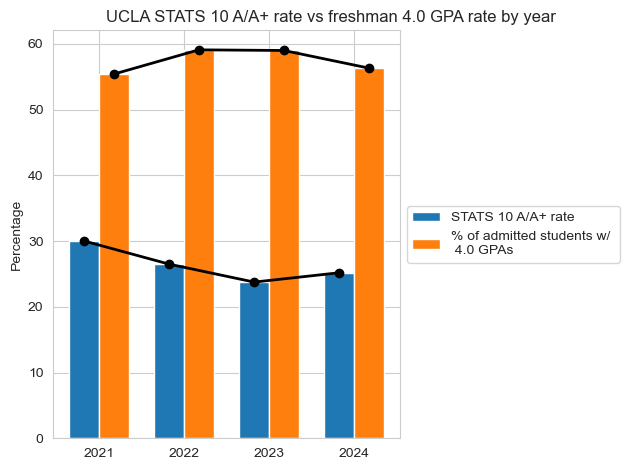

In [296]:
# Create UCLA graph
labels = combined_ucla_grades['YEAR']
ucla_a_rate = combined_ucla_grades['A+ RATE']
ucla_40_rate = combined_ucla_grades['4.0 RATE']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

# Bars
ax.bar(x - width/2, ucla_a_rate, width, label='STATS 10 A/A+ rate')
ax.bar(x + width/2, ucla_40_rate, width, label='% of admitted students w/ \n 4.0 GPAs')

# Labels & title
ax.set_ylabel('Percentage')
ax.set_title('UCLA STATS 10 A/A+ rate vs freshman 4.0 GPA rate by year', x=0.8)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Connecting line
ax.plot(x - width/2, ucla_a_rate, marker='o', linewidth=2, color='black')
ax.plot(x - width/2+0.35, ucla_40_rate, marker='o', linewidth=2, color='black')

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

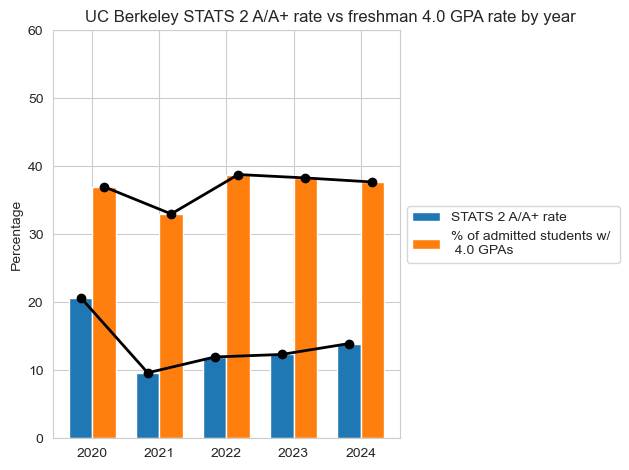

In [297]:
# Create Berkeley graph
labels = combined_berkeley_grades['YEAR']
berk_a_rate = combined_berkeley_grades['A+ RATE']
berk_40_rate = combined_berkeley_grades['4.0 RATE']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

# Bars
ax.bar(x - width/2, berk_a_rate, width, label='STATS 2 A/A+ rate')
ax.bar(x + width/2, berk_40_rate, width, label='% of admitted students w/ \n 4.0 GPAs')

# Labels & title
ax.set_ylabel('Percentage')
ax.set_title('UC Berkeley STATS 2 A/A+ rate vs freshman 4.0 GPA rate by year', x=0.8)
ax.set_xticks(x)
ax.set_ylim(0, 60)
ax.set_xticklabels(labels)
ax.legend()

# Connecting line
ax.plot(x - width/2, berk_a_rate, marker='o', linewidth=2, color='black')
ax.plot(x - width/2+0.35, berk_40_rate, marker='o', linewidth=2, color='black')

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

##### Shivani's Visualizations

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats10['GRD COUNT'] = pd.to_numeric(stats10['GRD COUNT'], errors='coerce')


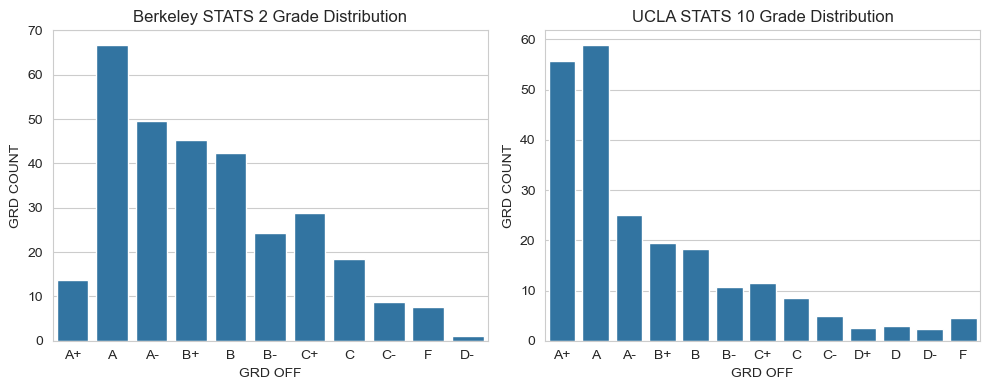

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats20['GRD COUNT'] = pd.to_numeric(stats20['GRD COUNT'], errors='coerce')


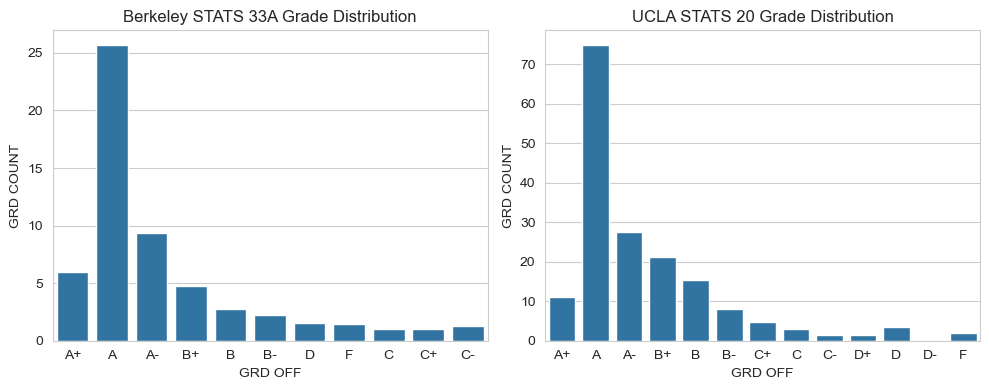

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats102Aucla['GRD COUNT'] = pd.to_numeric(stats102Aucla['GRD COUNT'], errors='coerce')
C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats102Bucla['GRD COUNT'] = pd.to_numeric(stats102Bucla['GRD COUNT'], errors='coerce')


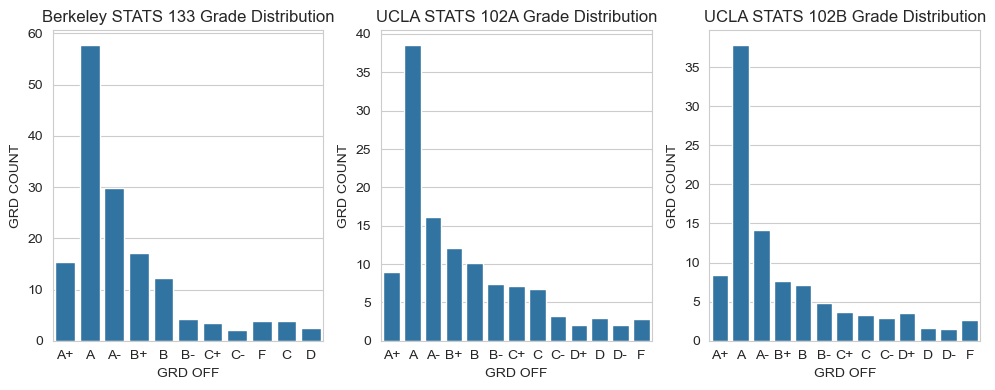

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats100Aucla['GRD COUNT'] = pd.to_numeric(stats100Aucla['GRD COUNT'], errors='coerce')


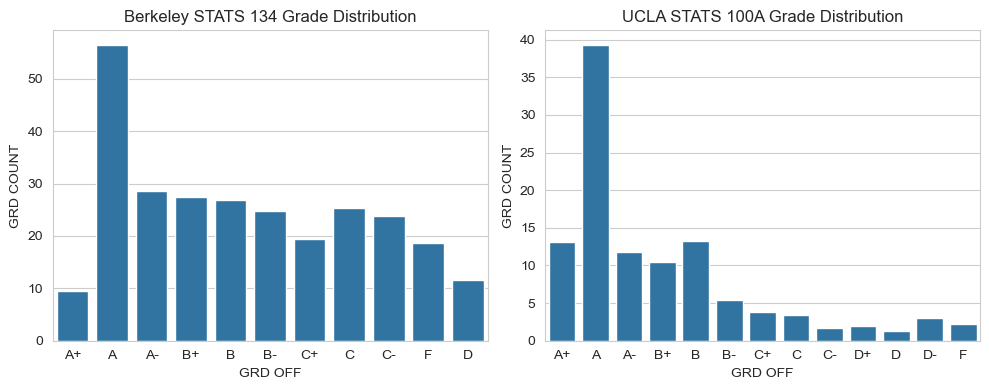

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats100Bucla['GRD COUNT'] = pd.to_numeric(stats100Bucla['GRD COUNT'], errors='coerce')


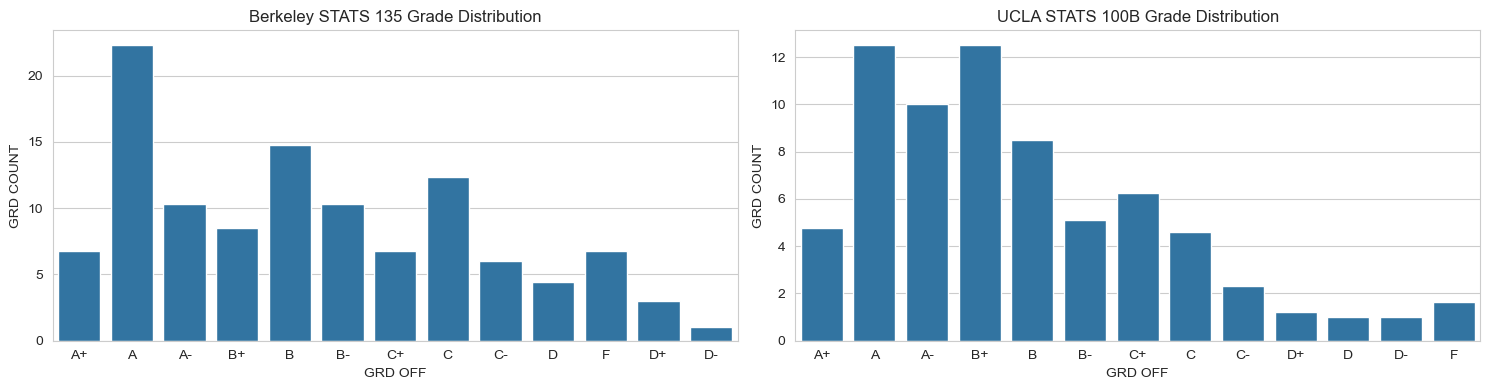

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats102Cucla['GRD COUNT'] = pd.to_numeric(stats102Cucla['GRD COUNT'], errors='coerce')


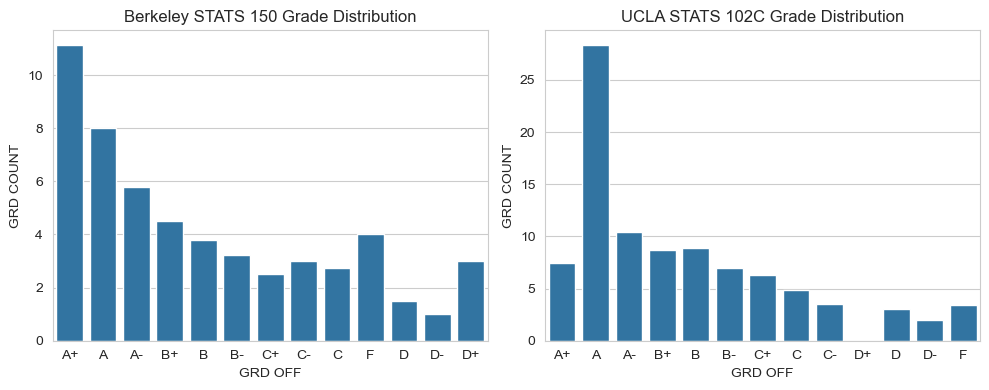

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats100Cucla['GRD COUNT'] = pd.to_numeric(stats100Cucla['GRD COUNT'], errors='coerce')
C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats101Aucla['GRD COUNT'] = pd.to_numeric(stats101Aucla['GRD COUNT'], errors='coerce')
C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:156: SettingWithCopyWarning: 
A valu

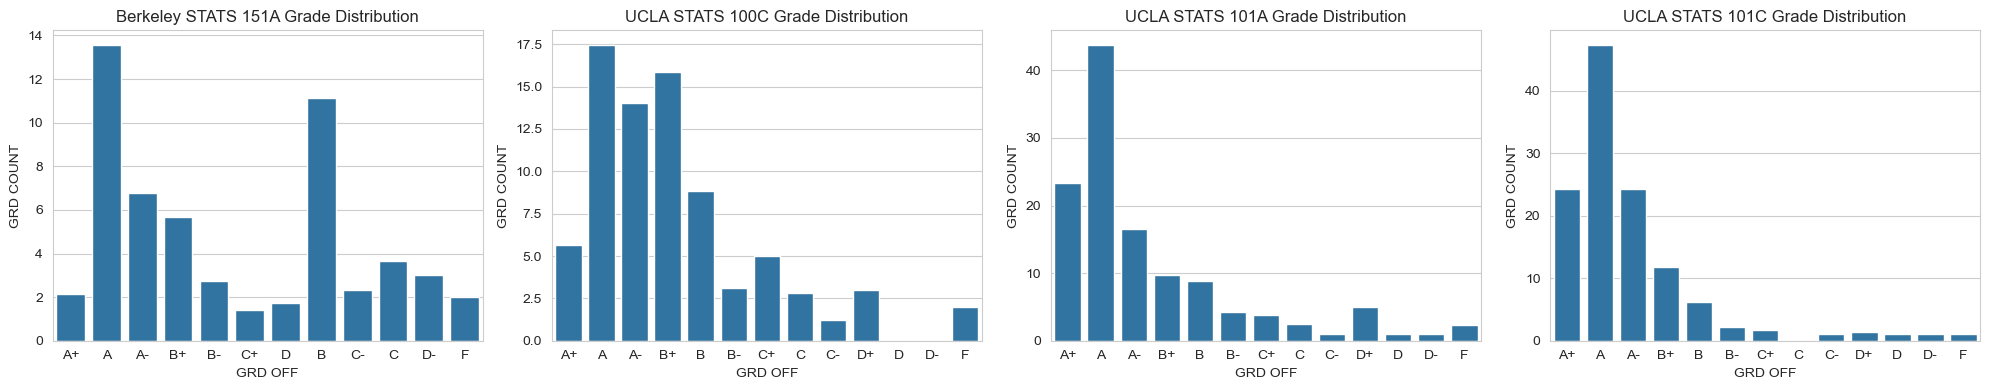

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats100Cucla['GRD COUNT'] = pd.to_numeric(stats100Cucla['GRD COUNT'], errors='coerce')


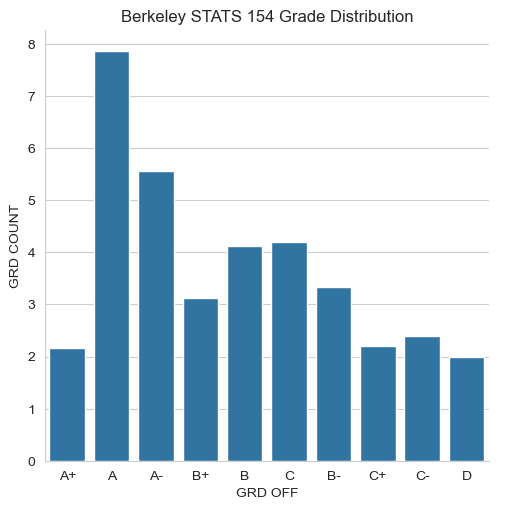

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3398932305.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats101Bucla['GRD COUNT'] = pd.to_numeric(stats101Bucla['GRD COUNT'], errors='coerce')


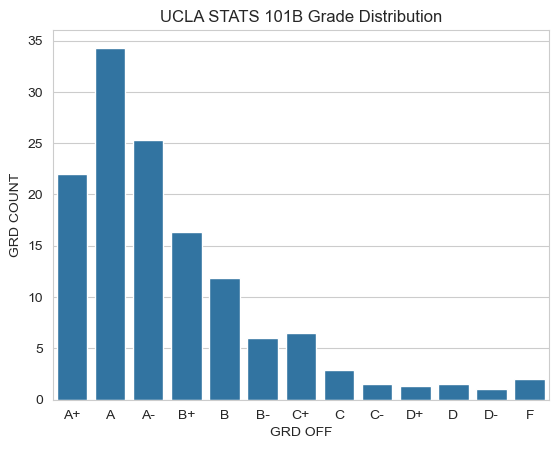

In [298]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


stats2berkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "2")]
sns.barplot(data=stats2berkeley, x='GRD OFF', y='GRD COUNT', errorbar=None, ax=axes[0])
axes[0].set_title('Berkeley STATS 2 Grade Distribution')


stats10 = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "10")]
stats10['GRD COUNT'] = pd.to_numeric(stats10['GRD COUNT'], errors='coerce')
stats10_sorted = stats10.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats10_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar=None, ax=axes[1])
axes[1].set_title('UCLA STATS 10 Grade Distribution')


plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 4))


stats33Aberkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "33A")]
sns.barplot(data = stats33Aberkeley, x = 'GRD OFF', y = 'GRD COUNT', errorbar = None, ax=axes[0])
axes[0].set_title('Berkeley STATS 33A Grade Distribution')


stats20 = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "20")]
stats20['GRD COUNT'] = pd.to_numeric(stats20['GRD COUNT'], errors='coerce')
stats20_sorted = stats20.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats20_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax=axes[1])
axes[1].set_title('UCLA STATS 20 Grade Distribution')


plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(10, 4))


stats133berkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "133")]
sns.barplot(data = stats133berkeley, x = 'GRD OFF', y = 'GRD COUNT', errorbar = None, ax = axes[0])
axes[0].set_title('Berkeley STATS 133 Grade Distribution')


stats102Aucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "102A")]
stats102Aucla['GRD COUNT'] = pd.to_numeric(stats102Aucla['GRD COUNT'], errors='coerce')
stats102Aucla_sorted = stats102Aucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats102Aucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[1])
axes[1].set_title('UCLA STATS 102A Grade Distribution')


stats102Bucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "102B")]
stats102Bucla['GRD COUNT'] = pd.to_numeric(stats102Bucla['GRD COUNT'], errors='coerce')
stats102Bucla_sorted = stats102Bucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats102Bucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[2])
axes[2].set_title('UCLA STATS 102B Grade Distribution')


plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 4))


stats134berkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "134")]
sns.barplot(data = stats134berkeley, x = 'GRD OFF', y = 'GRD COUNT', errorbar = None, ax = axes[0])
axes[0].set_title('Berkeley STATS 134 Grade Distribution')


stats100Aucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "100A")]
stats100Aucla['GRD COUNT'] = pd.to_numeric(stats100Aucla['GRD COUNT'], errors='coerce')
stats100Aucla_sorted = stats100Aucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats100Aucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[1])
axes[1].set_title('UCLA STATS 100A Grade Distribution')


plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(15, 4))


stats135berkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "135")]
sns.barplot(data = stats135berkeley, x = 'GRD OFF', y = 'GRD COUNT', errorbar = None, ax = axes[0])
axes[0].set_title('Berkeley STATS 135 Grade Distribution')


stats100Bucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "100B")]
stats100Bucla['GRD COUNT'] = pd.to_numeric(stats100Bucla['GRD COUNT'], errors='coerce')
stats100Bucla_sorted = stats100Bucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats100Bucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[1])
axes[1].set_title('UCLA STATS 100B Grade Distribution')




plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 4))


stats150berkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "150")]
sns.barplot(data = stats150berkeley, x = 'GRD OFF', y = 'GRD COUNT', errorbar = None, ax = axes[0])
axes[0].set_title('Berkeley STATS 150 Grade Distribution')


stats102Cucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "102C")]
stats102Cucla['GRD COUNT'] = pd.to_numeric(stats102Cucla['GRD COUNT'], errors='coerce')
stats102Cucla_sorted = stats102Cucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats102Cucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[1])
axes[1].set_title('UCLA STATS 102C Grade Distribution')


plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(20, 4))


stats151Aberkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "151A")]
sns.barplot(data = stats151Aberkeley, x = 'GRD OFF', y = 'GRD COUNT', errorbar = None, ax = axes[0])
axes[0].set_title('Berkeley STATS 151A Grade Distribution')


stats100Cucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "100C")]
stats100Cucla['GRD COUNT'] = pd.to_numeric(stats100Cucla['GRD COUNT'], errors='coerce')
stats100Cucla_sorted = stats100Cucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats100Cucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[1])
axes[1].set_title('UCLA STATS 100C Grade Distribution')


stats101Aucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "101A")]
stats101Aucla['GRD COUNT'] = pd.to_numeric(stats101Aucla['GRD COUNT'], errors='coerce')
stats101Aucla_sorted = stats101Aucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats101Aucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[2])
axes[2].set_title('UCLA STATS 101A Grade Distribution')


stats101Cucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "101C")]
stats101Cucla['GRD COUNT'] = pd.to_numeric(stats101Cucla['GRD COUNT'], errors='coerce')
stats101Cucla_sorted = stats101Cucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats101Cucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[3])
axes[3].set_title('UCLA STATS 101C Grade Distribution')


plt.tight_layout()
plt.show()


stats100Cucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "100C")]
stats100Cucla['GRD COUNT'] = pd.to_numeric(stats100Cucla['GRD COUNT'], errors='coerce')
stats100Cucla_sorted = stats100Cucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats100Cucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None, ax = axes[2])
axes[2].set_title('UCLA STATS 100C Grade Distribution')




stats154berkeley = berkeley_grades[(berkeley_grades["SUBJECT AREA"] == "STATS") & (berkeley_grades["CATLG NBR"] == "154")]
sns.catplot(data = stats154berkeley, x = 'GRD OFF', y = 'GRD COUNT', kind = 'bar', errorbar = None)
plt.title('Berkeley STATS 154 Grade Distribution')
plt.show() 




stats101Bucla = ucla_grades[(ucla_grades["SUBJECT AREA"] == "STATS") & (ucla_grades["CATLG NBR"] == "101B")]
stats101Bucla['GRD COUNT'] = pd.to_numeric(stats101Bucla['GRD COUNT'], errors='coerce')
stats101Bucla_sorted = stats101Bucla.sort_values("GRD COUNT", ascending=False)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.barplot(data=stats101Bucla_sorted, x='GRD OFF', y='GRD COUNT', order=grade_order, errorbar =None)
plt.title('UCLA STATS 101B Grade Distribution')
plt.show()


##### Adelaide's Visualizations

In [299]:
season_nbr = {
    "Winter": 0,
    "Spring": .25,
    "Summer": .5,
    "Fall": .75
}

season_nbr_sem = {
    "Spring": 0,
    "Summer": .33,
    "Fall": .67
}

def enrl_term_ucla(term):
    if term[-1] == 'F':
        a = 'Fall'
    elif term[-1] == 'W':
        a = 'Winter'
    elif term[-1] == 'S':
        a = 'Spring'
    elif term[-1] == '1':
        a ='Summer'
    else:
        a = ""
    return a + ' ' + '20' + (term[:-1])

In [300]:
# change/add rows to UCLA df
df_ucla = ucla_grades.copy()

# change to match Berkeley formatting
df_ucla['ENRL TERM'] = df_ucla['ENROLLMENT TERM'].apply(enrl_term_ucla)

# TERM NBR: term number: last two digits of year with the term number after the dot
df_ucla['TERM NBR'] = df_ucla['ENRL TERM'].str[-2:].astype(int) + df_ucla['ENRL TERM'].str[:-5].map(season_nbr)

df_ucla.head()

ENROLLMENT TERM SUBJECT AREA CATLG NBR  \
0             21F        STATS        10   
1             21F        STATS        10   
2             21F        STATS        10   
3             21F        STATS        10   
4             21F        STATS        10   

                         LONG CRSE TITLE  INSTR NAME GRD OFF  GRD COUNT  \
0  INTRODUCTION TO STATISTICAL REASONING  CHA, MARIA      A+        104   
1  INTRODUCTION TO STATISTICAL REASONING  CHA, MARIA       A         87   
2  INTRODUCTION TO STATISTICAL REASONING  CHA, MARIA      A-         36   
3  INTRODUCTION TO STATISTICAL REASONING  CHA, MARIA      B+         10   
4  INTRODUCTION TO STATISTICAL REASONING  CHA, MARIA       B         20   

   ENRL TOT  AVG_GPA  ENRL TERM  TERM NBR  
0       291      4.0  Fall 2021     21.75  
1       291      4.0  Fall 2021     21.75  
2       291      3.7  Fall 2021     21.75  
3       291      3.3  Fall 2021     21.75  
4       291      3.0  Fall 2021     21.75

In [301]:
# change/add rows to Berkeley df
df_berk = berkeley_grades.copy()

df_berk['ENRL TERM'] = df_berk['ENROLLMENT TERM']

df_berk['ENRL TERM'] = df_berk['ENRL TERM'].replace({
    '20F': 'Fall 2020',
    '21S': 'Spring 2021',
    '211': 'Summer 2021',
    '21F': 'Fall 2021',
    '22S': 'Spring 2022',
    '221': 'Summer 2022',
    '22F': 'Fall 2022',
    '23S': 'Spring 2023',
    '231': 'Summer 2023',
    '23F': 'Fall 2023',
    '24S': 'Spring 2024',
    '241': 'Summer 2024',
    '24F': 'Fall 2024',
    '25S': 'Spring 2025',
    '251': 'Summer 2025'})

df_berk.head()
# TERM NBR: term number: last two digits of year with the term number after the dot
df_berk['TERM NBR'] = df_berk['ENRL TERM'].str[-2:].astype(int) + df_berk['ENRL TERM'].str[:-5].map(season_nbr)
df_berk['TERM NBR SEM'] = df_berk['ENRL TERM'].str[-2:].astype(int) + df_berk['ENRL TERM'].str[:-5].map(season_nbr_sem)

df_berk.head()

ENROLLMENT TERM SUBJECT AREA CATLG NBR GRD OFF  GRD COUNT  ENRL TOT  \
0             20F        STATS         2      A+         31       257   
1             20F        STATS         2       A         76       257   
2             20F        STATS         2      A-         59       257   
3             20F        STATS         2      B+         27       257   
4             20F        STATS         2       B         27       257   

              LONG CRSE TITLE  AVG_GPA  ENRL TERM  TERM NBR  TERM NBR SEM  
0  Introduction to Statistics      4.0  Fall 2020     20.75         20.67  
1  Introduction to Statistics      4.0  Fall 2020     20.75         20.67  
2  Introduction to Statistics      3.7  Fall 2020     20.75         20.67  
3  Introduction to Statistics      3.3  Fall 2020     20.75         20.67  
4  Introduction to Statistics      3.0  Fall 2020     20.75         20.67

In [302]:
grouped_ucla = df_ucla.groupby(['ENRL TERM','CATLG NBR']).agg(
    avg_gpa = ('AVG_GPA', 'mean'),
    grade = ('GRD OFF', 'first'),
    term_nbr = ('TERM NBR', 'first')
).reset_index()

grouped_berk = df_berk.groupby(['ENRL TERM','CATLG NBR']).agg(
    avg_gpa = ('AVG_GPA', 'mean'),
    grade = ('GRD OFF', 'first'),
    term_nbr = ('TERM NBR', 'first'),
    term_nbr_sem = ('TERM NBR SEM', 'first')
).reset_index()

Text(0.5, 0, 'Term')

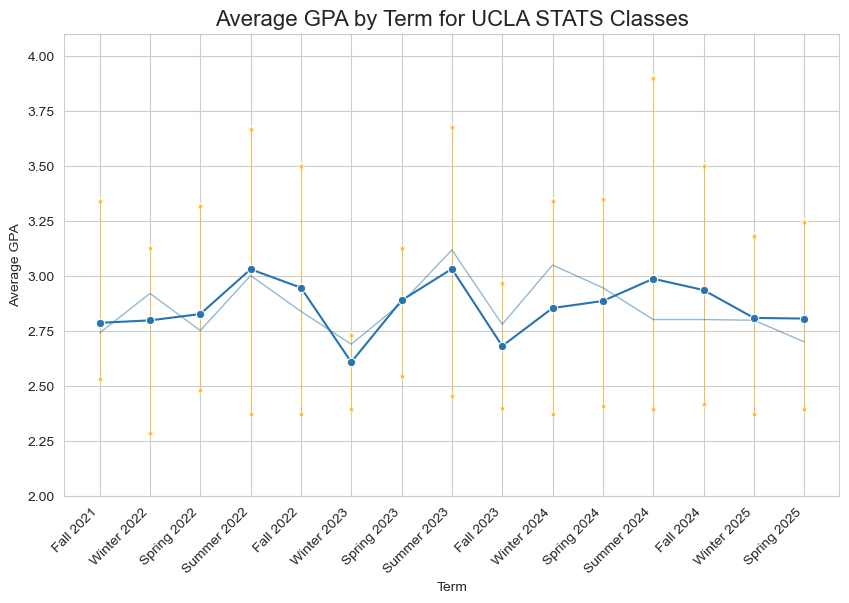

In [303]:
# group by term; find mean, min, max, med of the average gpas for each class; keep other columns

grouped_ucla_term = grouped_ucla.groupby(['ENRL TERM']).agg(
    avg_term_gpa = ('avg_gpa', 'mean'),
    min_class_gpa = ('avg_gpa', 'min' ),
    max_class_gpa = ('avg_gpa', 'max' ),
    med_class_gpa = ('avg_gpa', 'median'),
    catlg_nbr = ('CATLG NBR', 'first'),
    grade = ('grade', 'first'),
    term_nbr = ('term_nbr', 'first')
)

grouped_ucla_term = grouped_ucla_term.sort_values("term_nbr").reset_index()

fig, ax = plt.subplots(figsize=(10,6))

for i, row in grouped_ucla_term.iterrows():
    ax.vlines(
        x=row['term_nbr'],
        ymin=row['min_class_gpa'],
        ymax=row['max_class_gpa'],
        color='#FFB81C',
        linewidth=0.5
    )


# Strip plot (scatter for categorical)
sns.scatterplot(
    x="term_nbr", 
    y="avg_term_gpa",
    data=grouped_ucla_term,
    ax=ax
)

# max
sns.scatterplot(
    x="term_nbr", 
    y="max_class_gpa",
    data=grouped_ucla_term,
    color = "#FFB81C",
    marker="*",
    ax=ax
)

#min
sns.scatterplot(
    x="term_nbr", 
    y="min_class_gpa",
    data=grouped_ucla_term,
    color = "#FFB81C",
    marker='*',
    ax=ax
)

# Plot the medians
sns.lineplot(
    x = 'term_nbr', 
    y = 'med_class_gpa',
    data = grouped_ucla_term, 
    color = "#2774AE",
    alpha = .5,
    linewidth=1,
    ax=ax
)

# # Plot the averages
sns.lineplot(
    x = 'term_nbr', 
    y = 'avg_term_gpa',
    data = grouped_ucla_term, 
    marker="o",
    color = "#2774AE",
    ax=ax
)

# change height of y-axis
ax.set_ylim(2.0, 4.1)

# x tick labels aesthetics
tick_values = grouped_ucla_term["term_nbr"].unique()
tick_labels = grouped_ucla_term.drop_duplicates("term_nbr")["ENRL TERM"]

ax.set_xticks(tick_values)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

# titles
ax.set_title('Average GPA by Term for UCLA STATS Classes', fontsize=16)
ax.set_ylabel("Average GPA")
ax.set_xlabel("Term")


Text(0.5, 0, 'Term')

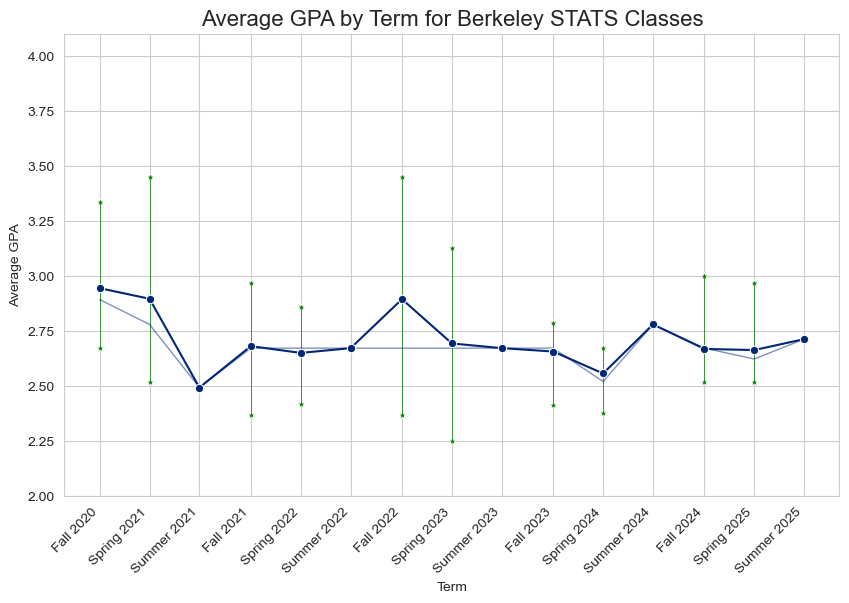

In [304]:
# group by term; find mean, min, max, med of the average gpas for each class; keep other columns

grouped_berk_term = grouped_berk.groupby(['ENRL TERM']).agg(
    avg_term_gpa = ('avg_gpa', 'mean'),
    min_class_gpa = ('avg_gpa', 'min' ),
    max_class_gpa = ('avg_gpa', 'max' ),
    med_class_gpa = ('avg_gpa', 'median'),
    catlg_nbr = ('CATLG NBR', 'first'),
    grade = ('grade', 'first'),
    term_nbr = ('term_nbr', 'first'),
    term_nbr_sem = ('term_nbr_sem', 'first')
)

grouped_berk_term = grouped_berk_term.sort_values("term_nbr").reset_index()

fig, ax = plt.subplots(figsize=(10,6))

for i, row in grouped_berk_term.iterrows():
    ax.vlines(
        x=row['term_nbr_sem'],
        ymin=row['min_class_gpa'],
        ymax=row['max_class_gpa'],
        color='green',
        linewidth=0.5
    )


# Strip plot (scatter for categorical)
sns.scatterplot(
    x="term_nbr_sem", 
    y="avg_term_gpa",
    data=grouped_berk_term,
    ax=ax

)

# max
sns.scatterplot(
    x="term_nbr_sem", 
    y="max_class_gpa",
    data=grouped_berk_term,
    color = "green",
    marker="*",
    ax=ax
)

#min
sns.scatterplot(
    x="term_nbr_sem", 
    y="min_class_gpa",
    data=grouped_berk_term,
    color = "green",
    marker='*',
    ax=ax
)

# Plot the medians
sns.lineplot(
    x = 'term_nbr_sem', 
    y = 'med_class_gpa',
    data = grouped_berk_term, 
    color = "#002676",
    alpha = .5,
    linewidth=1,
    ax=ax
)

# Plot the averages
sns.lineplot(
    x = 'term_nbr_sem', 
    y = 'avg_term_gpa',
    data = grouped_berk_term, 
    marker="o",
    color = "#002676",
    ax=ax
)

# change height of y-axis
ax.set_ylim(2.0, 4.1)

# x tick labels aesthetics
tick_values = grouped_berk_term["term_nbr_sem"].unique()
tick_labels = grouped_berk_term.drop_duplicates("term_nbr_sem")["ENRL TERM"]

ax.set_xticks(tick_values)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

# titles
ax.set_title('Average GPA by Term for Berkeley STATS Classes', fontsize=16)
ax.set_ylabel("Average GPA")
ax.set_xlabel("Term")

# note: summer sessions only offered one course, so the min, med, mean, max are all the same course

Text(0.5, 0, 'Term')

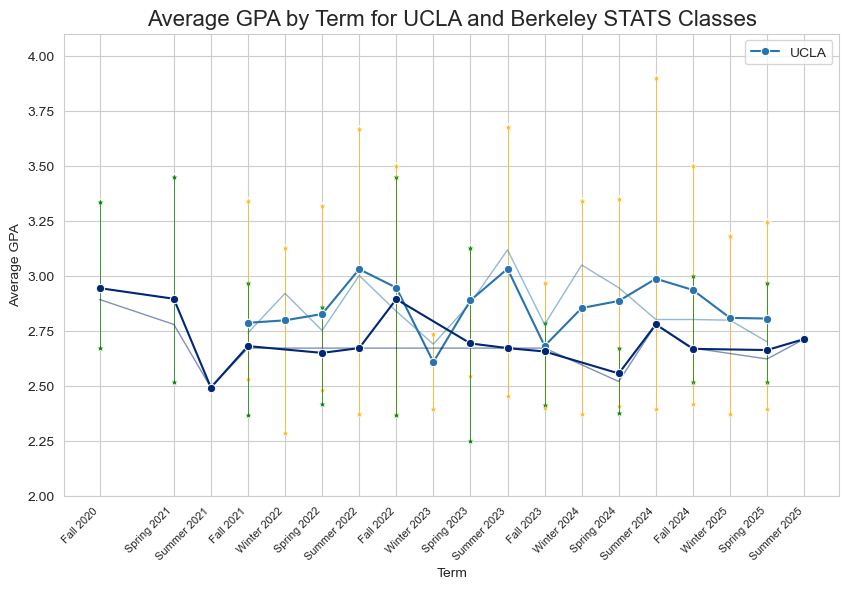

In [305]:
# both on the same graph
fig, ax = plt.subplots(figsize=(10,6))

# UCLA
for i, row in grouped_ucla_term.iterrows():
    ax.vlines(
        x=row['term_nbr'],
        ymin=row['min_class_gpa'],
        ymax=row['max_class_gpa'],
        color='#FFB81C',
        linewidth=0.5
    )

# Strip plot (scatter for categorical)
sns.scatterplot(
    x="term_nbr", 
    y="avg_term_gpa",
    data=grouped_ucla_term,
    ax=ax
)

# max
sns.scatterplot(
    x="term_nbr", 
    y="max_class_gpa",
    data=grouped_ucla_term,
    color = "#FFB81C",
    marker="*",
    ax=ax
)

#min
sns.scatterplot(
    x="term_nbr", 
    y="min_class_gpa",
    data=grouped_ucla_term,
    color = "#FFB81C",
    marker='*',
    ax=ax
)

# Berkeley
for i, row in grouped_berk_term.iterrows():
    ax.vlines(
        x=row['term_nbr'],
        ymin=row['min_class_gpa'],
        ymax=row['max_class_gpa'],
        color='green',
        linewidth=0.5
    )

# Strip plot (scatter for categorical)
sns.scatterplot(
    x="term_nbr", 
    y="avg_term_gpa",
    data=grouped_berk_term,
    ax=ax
)

# max
sns.scatterplot(
    x="term_nbr", 
    y="max_class_gpa",
    data=grouped_berk_term,
    color = "green",
    marker="*",
    ax=ax
)

#min
sns.scatterplot(
    x="term_nbr", 
    y="min_class_gpa",
    data=grouped_berk_term,
    color = "green",
    marker='*',
    ax=ax
)

# Plot the medians of UCLA
sns.lineplot(
    x = 'term_nbr', 
    y = 'med_class_gpa',
    data = grouped_ucla_term, 
    color = "#2774AE",
    alpha=.5,
    linewidth=1,
    ax=ax
)

# # Plot the averages of UCLA
sns.lineplot(
    x = 'term_nbr', 
    y = 'avg_term_gpa',
    data = grouped_ucla_term, 
    marker="o",
    color = "#2774AE",
    ax=ax,
    label = 'UCLA'
)

# Plot the medians of Berkeley
sns.lineplot(
    x = 'term_nbr', 
    y = 'med_class_gpa',
    data = grouped_berk_term, 
    color = "#002676",
    alpha=.5,
    linewidth=1,
    ax=ax
)

# Plot the averages of Berkeley
sns.lineplot(
    x = 'term_nbr', 
    y = 'avg_term_gpa',
    data = grouped_berk_term, 
    marker="o",
    color = "#002676",
    ax=ax
)

# change height of y-axis
ax.set_ylim(2.0, 4.1)

# x tick labels aesthetics
all_terms = pd.concat([
    grouped_ucla_term[['term_nbr','ENRL TERM']],
    grouped_berk_term[['term_nbr','ENRL TERM']]
]).drop_duplicates().sort_values('term_nbr')

tick_values = all_terms['term_nbr']
tick_labels = all_terms['ENRL TERM']

ax.set_xticks(tick_values)
ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=8)

# titles
ax.set_title('Average GPA by Term for UCLA and Berkeley STATS Classes', fontsize=16)
ax.set_ylabel("Average GPA")
ax.set_xlabel("Term")

##### Kavya's Visualizations


C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\1198768763.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_gpa = df.groupby("ENRL TERM")["AVG_GPA"].mean()


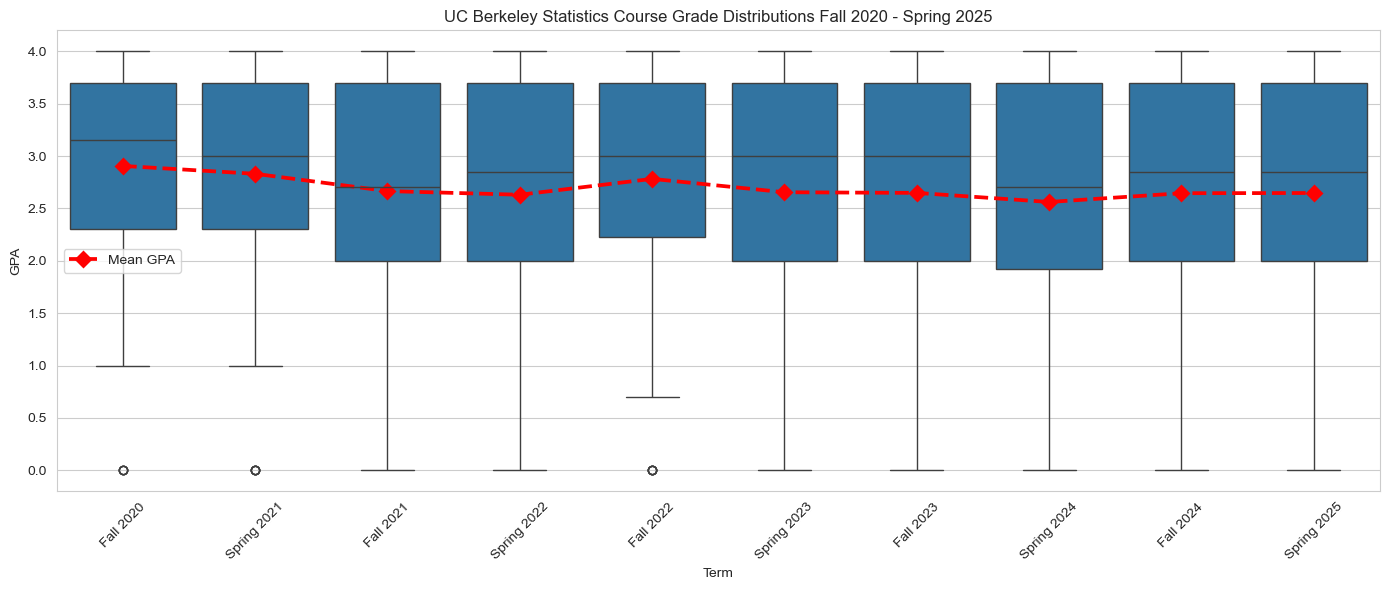

In [306]:
df = df_berk.copy()
df = df[~df["ENRL TERM"].str.contains("Summer", case=False, na=False)]

# Define term order (Fall → Spring only)
term_priority = {"Fall": 2, "Spring": 1}
term_order = sorted(
    df["ENRL TERM"].unique(),
    key=lambda t: (int(t.split()[1]), term_priority[t.split()[0]])
)
df["ENRL TERM"] = pd.Categorical(df["ENRL TERM"], categories=term_order, ordered=True)

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df,
    x="ENRL TERM",
    y="AVG_GPA"
)

mean_gpa = df.groupby("ENRL TERM")["AVG_GPA"].mean()
sns.pointplot(
    x=mean_gpa.index,
    y=mean_gpa.values,
    color="red",
    markers="D",
    linestyles="--",
    label="Mean GPA"
)

plt.title("UC Berkeley Statistics Course Grade Distributions Fall 2020 - Spring 2025")
plt.xlabel("Term")
plt.ylabel("GPA")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [307]:
# functions
def sample_skewness(series):
    x = series.dropna().values
    n = len(x)
    if n < 3:
        return np.nan  # not enough data for skew

    mean = np.mean(x)
    s = np.std(x, ddof=1)  # sample std dev

    # Fisher-Pearson sample skewness formula
    skew = (n / ((n - 1) * (n - 2))) * np.sum(((x - mean) / s)**3)

    return skew

# Term order map: Winter → Spring → Fall
term_order_map = {
    'W': 1,
    'S': 2,
    'F': 3,
}

def parse_term(term):
    """
    Handles ALL formats like:
    'F21', '21F', 'S20', '20S', 'W22', '22W'
    Returns a sortable numeric code or None.
    """
    if not isinstance(term, str):
        return None

    term = term.strip().upper()

    # Find the term letter (W, S, or F)
    letter_match = re.search(r'[WSF]', term)
    # Find the year (1–2 digits)
    year_match = re.search(r'(\d{1,2})$', term) or re.search(r'^(\d{1,2})', term)

    if not letter_match or not year_match:
        return None

    letter = letter_match.group(0)
    year_suffix = int(year_match.group(1))
    year_full = 2000 + year_suffix  # convert 21 → 2021

    # Drop summer or weird terms
    if letter not in term_order_map:
        return None

    # Final sortable value: year*10 + term number (1/2/3)
    return year_full * 10 + term_order_map[letter]



C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3828325287.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ENRL TERM")["AVG_GPA"]


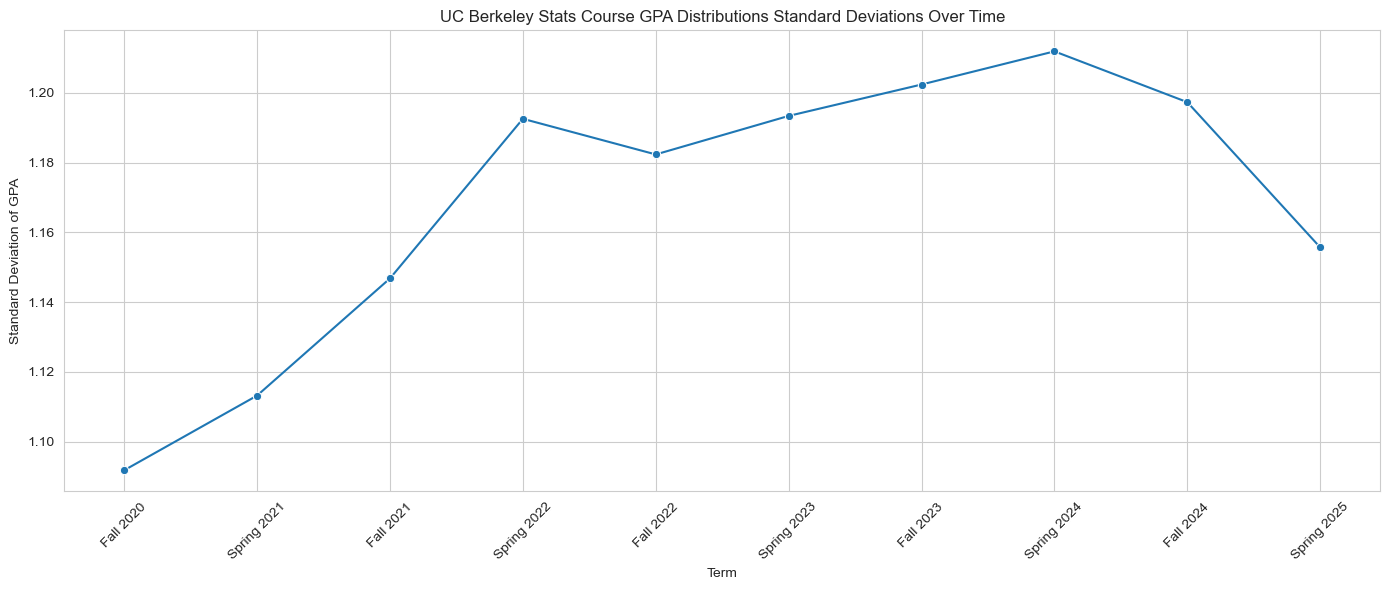

In [308]:
# Compute sample standard deviation per term
std_by_term = (
    df.groupby("ENRL TERM")["AVG_GPA"]
           .apply(lambda x: np.std(x.dropna().values, ddof=1))
           .reset_index(name="StdDev")
)

# Add TermOrder to sort correctly
std_by_term["TermOrder"] = std_by_term["ENRL TERM"].apply(parse_term)
std_by_term = std_by_term.dropna(subset=["TermOrder"]).sort_values("TermOrder")

# ---- Plot standard deviation over time ---- #
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=std_by_term,
    x="ENRL TERM",
    y="StdDev",
    marker="o"
)

plt.title("UC Berkeley Stats Course GPA Distributions Standard Deviations Over Time")
plt.xlabel("Term")
plt.ylabel("Standard Deviation of GPA")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\1453319765.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ENRL TERM")["AVG_GPA"]


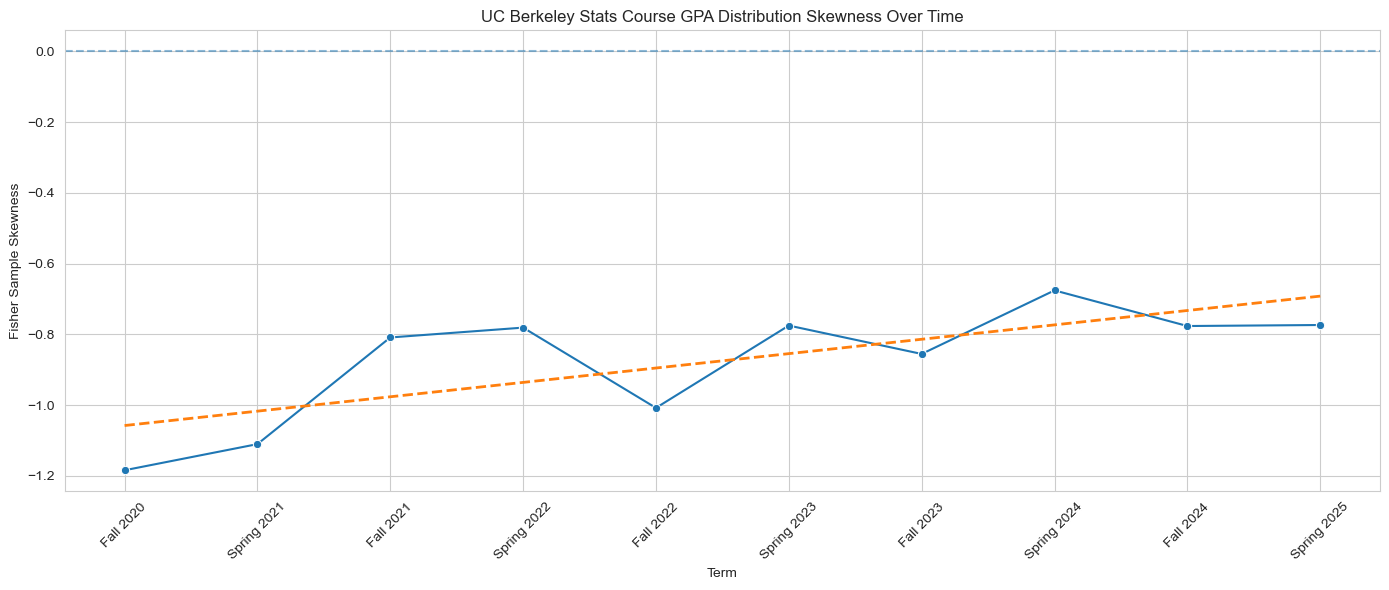

In [309]:
# Compute skew by term using the formula above
skew_by_term = (
    df.groupby("ENRL TERM")["AVG_GPA"]
           .apply(sample_skewness)
           .reset_index(name="Skew")
)

# Must sort by TermOrder for correct time series plotting
skew_by_term["TermOrder"] = skew_by_term["ENRL TERM"].apply(parse_term)
skew_by_term = skew_by_term.dropna(subset=["TermOrder"]).sort_values("TermOrder")

# ---- PLOT ---- #
plt.figure(figsize=(14, 6))

# Main skew time-series line
sns.lineplot(
    data=skew_by_term,
    x="ENRL TERM",
    y="Skew",
    marker="o"
)

# ---- ADD REGRESSION LINE ---- #
# Create a numeric index for the terms (0,1,2,...)
idx = np.arange(len(skew_by_term))

# Fit a simple linear regression on (index, skew)
coef = np.polyfit(idx, skew_by_term["Skew"], 1)
poly_fn = np.poly1d(coef)

# Plot regression line using same x positions as the categorical points
plt.plot(
    skew_by_term["ENRL TERM"],
    poly_fn(idx),
    linestyle="--",
    linewidth=2
)

plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("UC Berkeley Stats Course GPA Distribution Skewness Over Time")
plt.xlabel("Term")
plt.ylabel("Fisher Sample Skewness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

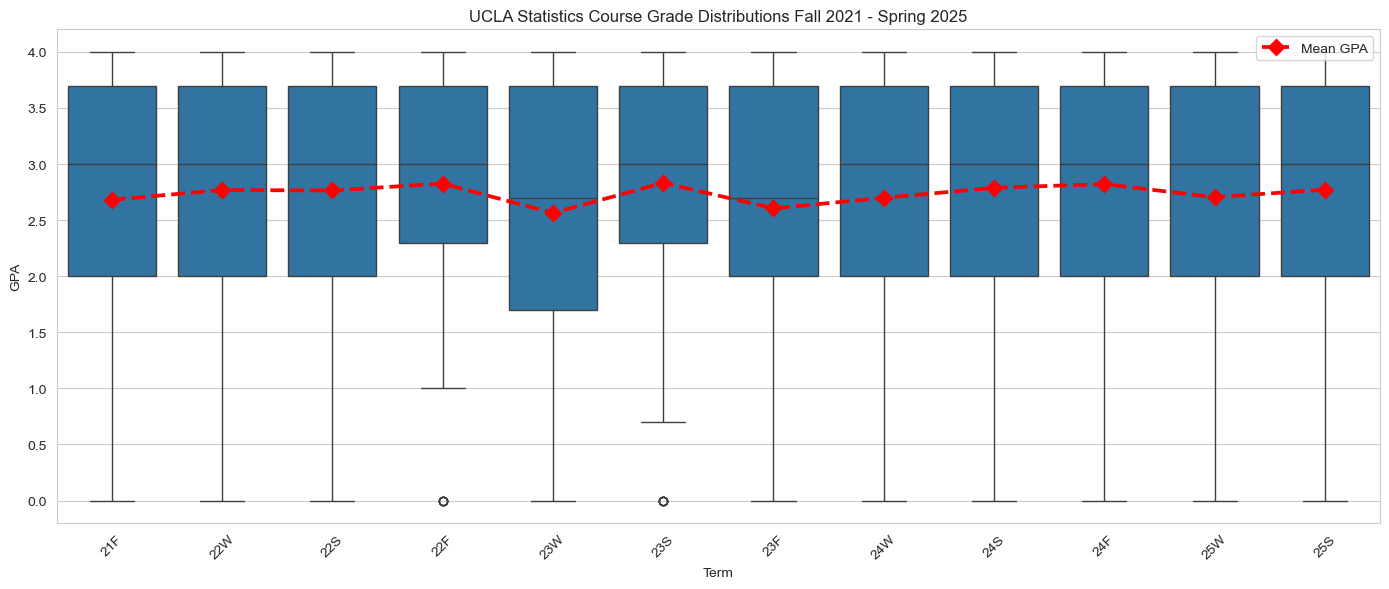

In [310]:
# Apply the term parser
ucla_df = ucla_grades.copy()
ucla_df["TermOrder"] = ucla_df["ENROLLMENT TERM"].apply(parse_term)

# Drop summer / invalid terms
ucla_df = ucla_df.dropna(subset=["TermOrder"])

# Sort chronologically
ucla_df = ucla_df.sort_values("TermOrder")

# ---- PLOT ---- #

plt.figure(figsize=(14, 6))

sns.boxplot(
    data=ucla_df,
    x="ENROLLMENT TERM",
    y="AVG_GPA"
)

# Mean GPA trend line
mean_gpa = ucla_df.groupby("ENROLLMENT TERM")["AVG_GPA"].mean()
sns.pointplot(
    x=mean_gpa.index,
    y=mean_gpa.values,
    color="red",
    markers="D",
    linestyles="--",
    label="Mean GPA"
)

plt.title("UCLA Statistics Course Grade Distributions Fall 2021 - Spring 2025")
plt.xlabel("Term")
plt.ylabel("GPA")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


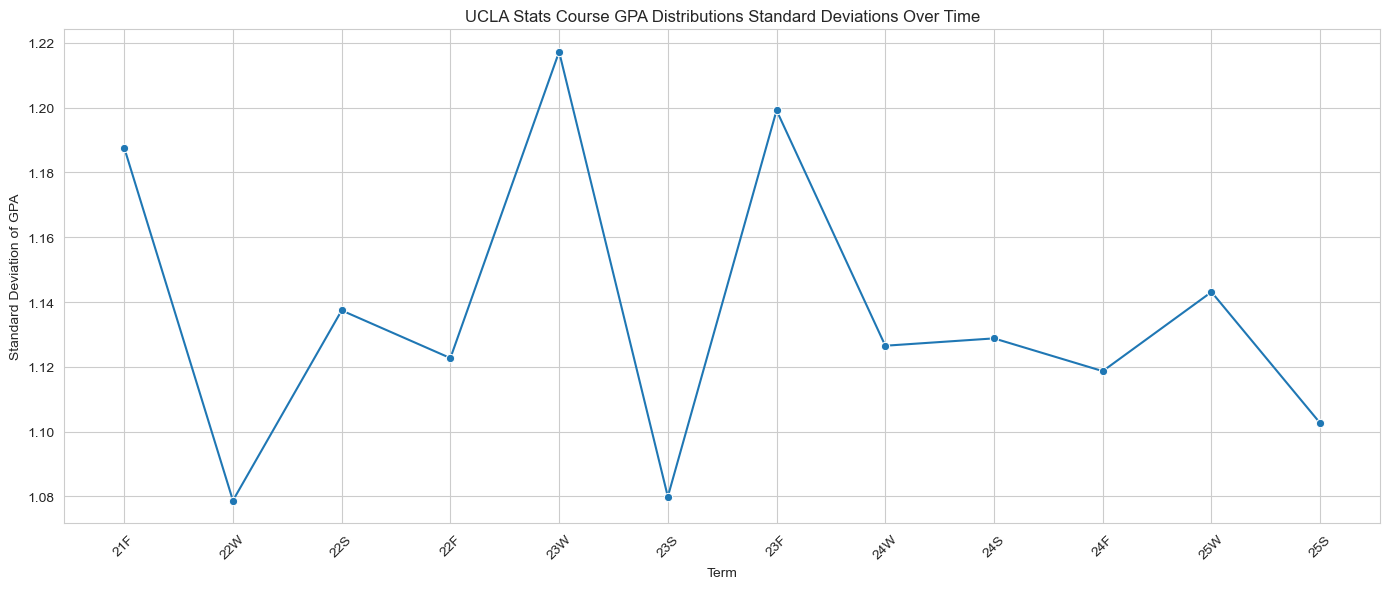

In [311]:
std_by_term = (
    ucla_df.groupby("ENROLLMENT TERM")["AVG_GPA"]
           .apply(lambda x: np.std(x.dropna().values, ddof=1))
           .reset_index(name="StdDev")
)

# Add TermOrder to sort correctly
std_by_term["TermOrder"] = std_by_term["ENROLLMENT TERM"].apply(parse_term)
std_by_term = std_by_term.dropna(subset=["TermOrder"]).sort_values("TermOrder")

# ---- Plot standard deviation over time ---- #
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=std_by_term,
    x="ENROLLMENT TERM",
    y="StdDev",
    marker="o"
)

plt.title("UCLA Stats Course GPA Distributions Standard Deviations Over Time")
plt.xlabel("Term")
plt.ylabel("Standard Deviation of GPA")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

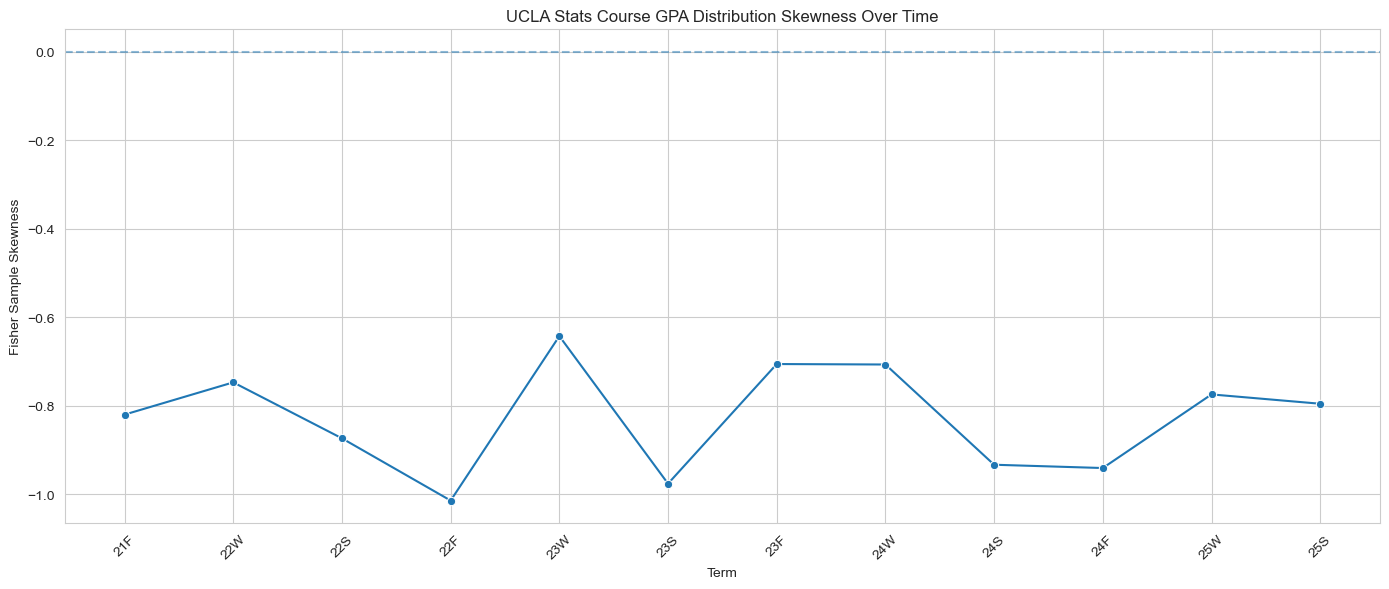

In [312]:
# Compute skew by term using the formula above
skew_by_term = (
    ucla_df.groupby("ENROLLMENT TERM")["AVG_GPA"]
           .apply(sample_skewness)
           .reset_index(name="Skew")
)

# Must sort by TermOrder for correct time series plotting
skew_by_term["TermOrder"] = skew_by_term["ENROLLMENT TERM"].apply(parse_term)
skew_by_term = skew_by_term.dropna(subset=["TermOrder"]).sort_values("TermOrder")

# ---- PLOT ---- #
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=skew_by_term,
    x="ENROLLMENT TERM",
    y="Skew",
    marker="o"
)

plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("UCLA Stats Course GPA Distribution Skewness Over Time")
plt.xlabel("Term")
plt.ylabel("Fisher Sample Skewness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Matthew's Visualizations

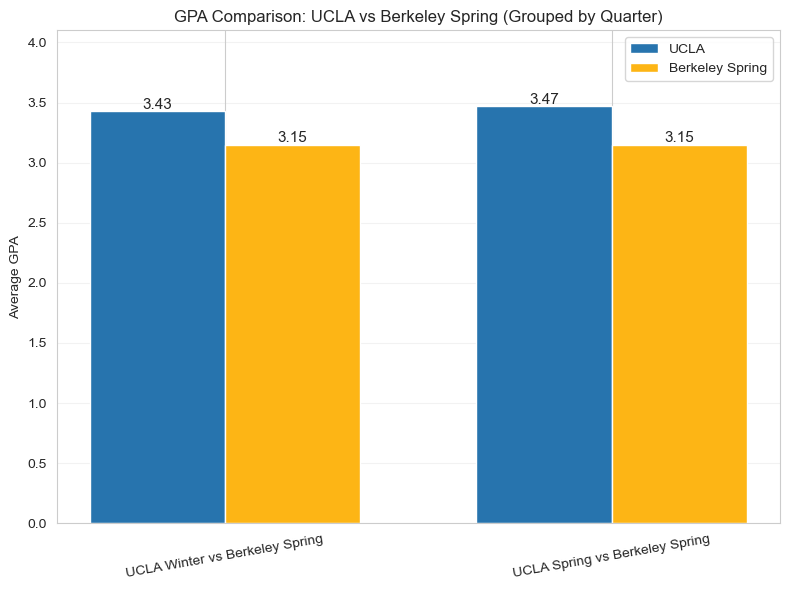

In [313]:
def compute_term_gpa(df):
    df = df.copy()
    df["GRD OFF"] = df["GRD OFF"].astype(str).str.strip()
    df = df[df["GRD OFF"].isin(d)].copy()
    df["GPA"] = df["GRD OFF"].map(d)
    df["weighted"] = df["GPA"] * df["GRD COUNT"]
    grouped = df.groupby("ENROLLMENT TERM").agg(
        total_weighted=("weighted", "sum"),
        total_count=("GRD COUNT", "sum")
    ).reset_index()
    grouped["avg_gpa"] = grouped["total_weighted"] / grouped["total_count"]
    return grouped
ucla_term = compute_term_gpa(ucla_grades)
berk_term = compute_term_gpa(berkeley_grades)
def ucla_season(term):
    t = str(term)
    if "W" in t:
        return "Winter"
    if "S" in t:
        return "Spring"
    return "Other"
def berk_season(term):
    t = str(term)
    if "S" in t:
        return "Spring"
    return "Other"
ucla_term["season"] = ucla_term["ENROLLMENT TERM"].apply(ucla_season)
berk_term["season"] = berk_term["ENROLLMENT TERM"].apply(berk_season)
ucla_winter = ucla_term[ucla_term["season"] == "Winter"]["avg_gpa"].mean()
ucla_spring = ucla_term[ucla_term["season"] == "Spring"]["avg_gpa"].mean()
berk_spring = berk_term[berk_term["season"] == "Spring"]["avg_gpa"].mean()
x = np.arange(2)
width = 0.35
ucla_vals = [ucla_winter, ucla_spring]
berk_vals = [berk_spring, berk_spring]
plt.figure(figsize=(8, 6))
plt.bar(x - width/2, ucla_vals, width, label="UCLA", color="#2774AE")
plt.bar(x + width/2, berk_vals, width, label="Berkeley Spring", color="#FDB515")
plt.xticks(x, ["UCLA Winter vs Berkeley Spring", "UCLA Spring vs Berkeley Spring"], rotation=10)
plt.ylabel("Average GPA")
plt.title("GPA Comparison: UCLA vs Berkeley Spring (Grouped by Quarter)")
plt.ylim(0, 4.1)
plt.grid(axis="y", alpha=0.25)
plt.legend()
for i, v in enumerate(ucla_vals):
    plt.text(x[i] - width/2, v + 0.02, f"{v:.2f}", ha="center", fontsize=11)
for i, v in enumerate(berk_vals):
    plt.text(x[i] + width/2, v + 0.02, f"{v:.2f}", ha="center", fontsize=11)
plt.tight_layout()
plt.show()

#### Nitin's Visualizations

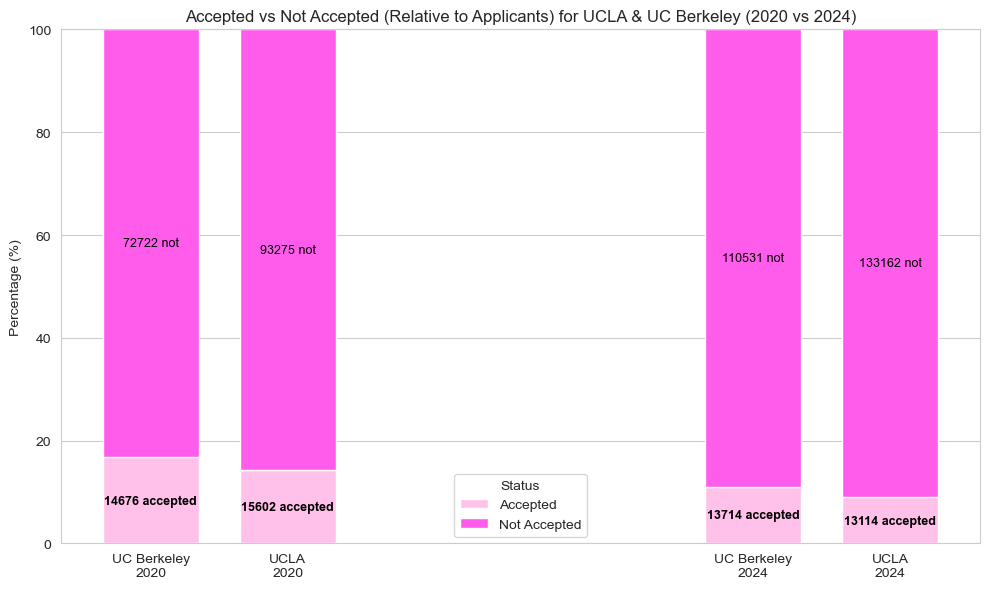

In [314]:
filtered_data = common_data_set[
    (common_data_set['school'].isin(['UCLA', 'UC Berkeley'])) &
    (common_data_set['year'].isin([2020, 2024]))
].copy()
filtered_data['accepted_pct'] = (filtered_data['total_accepted'] / filtered_data['total_applied']) * 100
filtered_data['not_accepted_pct'] = 100 - filtered_data['accepted_pct']
filtered_data = filtered_data.sort_values(['year', 'school']).reset_index(drop=True)
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
cluster_gap = 1.5
years = [2020, 2024]
schools = ['UC Berkeley', 'UCLA']
colors = ["#FFC1EA", "#FF5CEC"]
positions = []
labels = []
for i, year in enumerate(years):
    base = i * (len(schools) * bar_width + cluster_gap)
    for j, school in enumerate(schools):
        positions.append(base + j * (bar_width + 0.15))
        labels.append(f"{school}\n{year}")
for idx, row in enumerate(filtered_data.itertuples()):
    x_pos = positions[idx]
    ax.bar(x_pos, row.accepted_pct, width=bar_width, color=colors[0])
    ax.bar(x_pos, row.not_accepted_pct, width=bar_width, bottom=row.accepted_pct, color=colors[1])
    ax.text(x_pos, row.accepted_pct / 2, f"{row.total_accepted} accepted",
            ha='center', va='center', color='black', fontsize=9, weight='bold')
    ax.text(x_pos, row.accepted_pct + row.not_accepted_pct / 2,
            f"{row.total_applied - row.total_accepted} not",
            ha='center', va='center', color='black', fontsize=9)
ax.set_ylim(0, 100)
ax.set_ylabel("Percentage (%)")
ax.set_title("Accepted vs Not Accepted (Relative to Applicants) for UCLA & UC Berkeley (2020 vs 2024)")
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.legend(["Accepted", "Not Accepted"], title="Status")
plt.tight_layout()
plt.show()

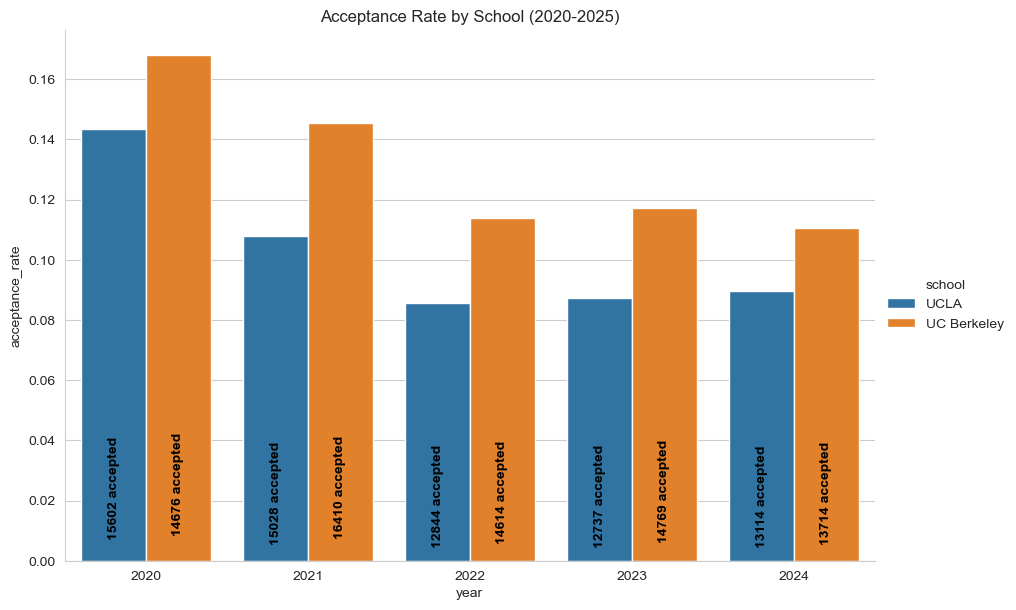

In [315]:
harvard_removed = common_data_set[common_data_set['school'] != 'Harvard']
data = harvard_removed[harvard_removed['year'] >= 2020]
g = sns.catplot(data=data, x='year', y='acceptance_rate', hue='school', kind='bar', height=6, aspect=1.5)
plt.title("Acceptance Rate by School (2020-2025)")
for ax in g.axes.flat:
    for patch, (_, row) in zip(ax.patches, data.iterrows()):
        label = f"{int(row['total_accepted'])} accepted"
        ax.annotate(
            label,
            (patch.get_x() + patch.get_width() / 2., patch.get_height() * 0.05),  # 5% from bottom
            ha='center', va='bottom', color='black', fontsize=10, weight='bold', rotation=90
        )
plt.show()

##### Dongyon's Visualizations

##### Michelle's Visualizations

##### Miscellaneous Visualizations

UCLA Stats 100B and 100C: Christou and Madrid Padilla

In [316]:
# group the grades by the class, then get the professors that teach each class
ucla_grades.groupby(by = ucla_grades['CATLG NBR'])['INSTR NAME'].value_counts()

CATLG NBR  INSTR NAME                       
10         WANG, BINGLING                       142
           CHA, MARIA                            83
           ALMOHALWAS, AKRAM M                   36
           MAIERHOFER, THOMAS JOHANNES           36
           WU, GUANI                             32
           ZES, DAVID ANTHONY                    19
           TSIANG, MICHAEL                       16
           XU, HONGQUAN                          12
           ZHOU, QING                            12
           HO, HAO                               11
           ODHIAMBO, COLLINS OJWANG              11
           CHEN, MILES SATORI                     9
           GOULD, ROBERT L                        8
100A       SANCHEZ, JUANA                        34
           MONTUFAR CUARTAS, GUIDO FRANCISCO     32
           CHENG, GUANG                          22
           WU, YINGNIAN                          22
           PAIK SCHOENBERG, FREDERIC ROLAND      21
           HO, HAO 

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\1466633600.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_christou_c = christou_c.groupby('ENROLLMENT TERM').apply(
C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\1466633600.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_christou_b = christou_b.groupby('ENROLLMENT TERM').apply(


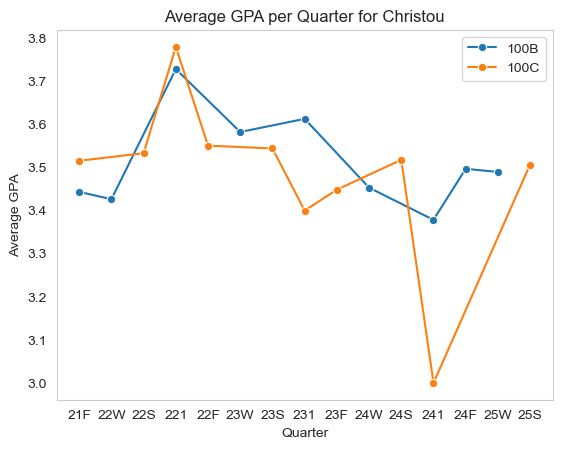

In [317]:
# get 100c values
# filtering the professors to christou only
christou = ucla_grades[ucla_grades['INSTR NAME'] == 'CHRISTOU, NICOLAS'] 
# getting 100c, reset indexes
christou_c = christou[christou['CATLG NBR'] == '100C'].reset_index(drop = True) 
# create a dictionary for the grade letters
# map each letter grade to the dictionary grade gpa in the dataframe
christou_c['AVG_GPA'] = [d[x] for x in christou_c['GRD OFF']]
# calculate the weight of each letter grade 
christou_c['GPA WEIGHT'] = christou_c['AVG_GPA'] * christou_c['GRD COUNT']
# since we already filtered by class and professor, each grade "chunk" is for a specific quarter
# group it by enrollment term, then apply a function
# the function we apply (lambda) is on the dataframe x (in this case x is our placeholder for the dataframe, similar to how for loops are like "for x in y")
# we get the gpa weight column and take the sum of those (since we )
avg_christou_c = christou_c.groupby('ENROLLMENT TERM').apply(
    lambda x: (x['GPA WEIGHT'].sum() / x['ENRL TOT'].iloc[0])
)
avg_christou_c

# get 100b values
christou = ucla_grades[ucla_grades['INSTR NAME'] == 'CHRISTOU, NICOLAS']
christou_b = christou[christou['CATLG NBR'] == '100B'].reset_index(drop = True)
christou_b
d = {'A+': 4, 'A': 4, 'A-': 3.7, 'B+': 3.3, 'B': 3, 'B-': 2.7, 'C+': 2.3, 'C': 2, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'D-': 0.7, 'F': 0}
christou_b['AVG_GPA'] = [d[x] for x in christou_b['GRD OFF']]
christou_b['GPA WEIGHT'] = christou_b['AVG_GPA'] * christou_b['GRD COUNT']
avg_christou_b = christou_b.groupby('ENROLLMENT TERM').apply(
    lambda x: (x['GPA WEIGHT'].sum() / x['ENRL TOT'].iloc[0])
)

quarter_order = ['21F', '22W', '22S', '221', '22F', '23W', '23S', '231', '23F', '24W', '24S', '241', '24F', '25W', '25S']

avg_christou_c = avg_christou_c.reindex(quarter_order)
avg_christou_b = avg_christou_b.reindex(quarter_order)

fig, ax = plt.subplots()
sns.lineplot(x=avg_christou_b.index, y=avg_christou_b.values, marker='o', label = '100B', sort = False)
sns.lineplot(x=avg_christou_c.index, y=avg_christou_c.values, marker='o', label = '100C', sort = False)

plt.xticks(quarter_order)
ax.set_xlabel("Quarter")
ax.set_ylabel("Average GPA")
ax.set_title("Average GPA per Quarter for Christou")
plt.grid()
plt.show()

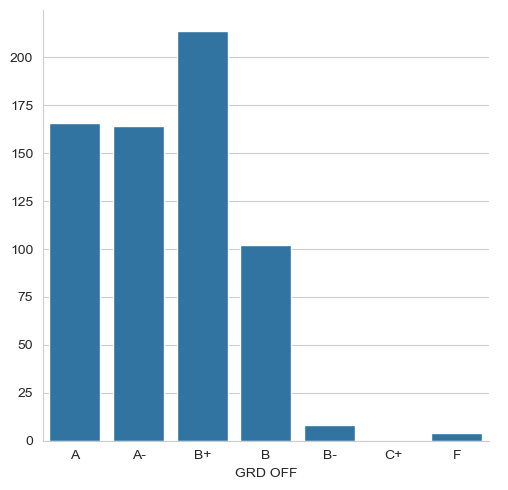

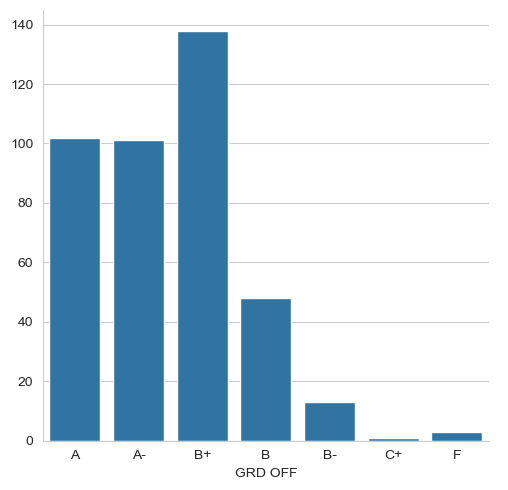

In [318]:
grade_counts_b = christou_b.groupby('GRD OFF')['GRD COUNT'].sum()
grade_counts_c = christou_c.groupby('GRD OFF')['GRD COUNT'].sum()

grades_simp = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'F']
grade_counts_b = grade_counts_b.reindex(grades_simp)
grade_counts_c = grade_counts_c.reindex(grades_simp)

sns.catplot(kind = 'bar', x = grade_counts_c.index, y = grade_counts_c.values)
plt.show()
sns.catplot(kind = 'bar', x = grade_counts_b.index, y = grade_counts_b.values)
plt.show()

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3749405834.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_mp_c = mp_c.groupby('ENROLLMENT TERM').apply(
C:\Users\Lillian\AppData\Local\Temp\ipykernel_30620\3749405834.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_mp_b = mp_b.groupby('ENROLLMENT TERM').apply(


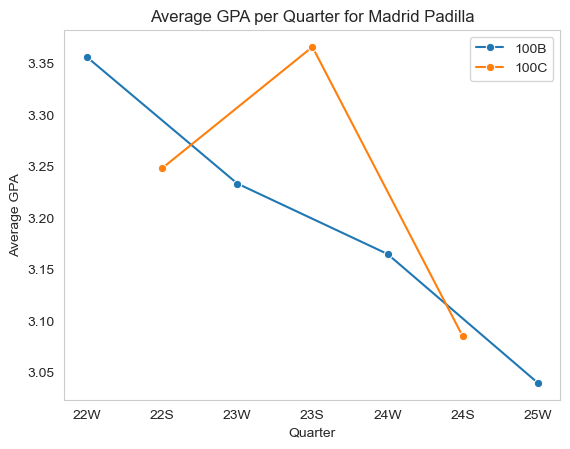

In [319]:
# MADRID PADILLA, OSCAR HERNAN
mp = ucla_grades[ucla_grades['INSTR NAME'] == 'MADRID PADILLA, OSCAR HERNAN']
# get 100c values
mp_c = mp[mp['CATLG NBR'] == '100C'].reset_index(drop = True)
mp_c
mp_c['AVG_GPA'] = [d[x] for x in mp_c['GRD OFF']]
mp_c['GPA WEIGHT'] = mp_c['AVG_GPA'] * mp_c['GRD COUNT']
mp_c
avg_mp_c = mp_c.groupby('ENROLLMENT TERM').apply(
   lambda x: (x['GPA WEIGHT'].sum() / x['ENRL TOT'].iloc[0])
)

# get 100b values
mp_b = mp[mp['CATLG NBR'] == '100B'].reset_index(drop = True)
mp_b['AVG_GPA'] = [d[x] for x in mp_b['GRD OFF']]
mp_b['GPA WEIGHT'] = mp_b['AVG_GPA'] * mp_b['GRD COUNT']

avg_mp_b = mp_b.groupby('ENROLLMENT TERM').apply(
   lambda x: (x['GPA WEIGHT'].sum() / x['ENRL TOT'].iloc[0])
)
avg_mp_b

quarter_order_simp = ['22W', '22S', '23W', '23S', '24W', '24S', '25W']
avg_mp_c = avg_mp_c.reindex(quarter_order_simp)
avg_mp_b = avg_mp_b.reindex(quarter_order_simp)

fig, ax = plt.subplots()
sns.lineplot(x=avg_mp_b.index, y=avg_mp_b.values, marker='o', label = '100B', sort = False)
sns.lineplot(x=avg_mp_c.index, y=avg_mp_c.values, marker='o', label = '100C', sort = False)

plt.xticks(quarter_order_simp)
ax.set_xlabel("Quarter")
ax.set_ylabel("Average GPA")
ax.set_title("Average GPA per Quarter for Madrid Padilla")
plt.grid()
plt.show()

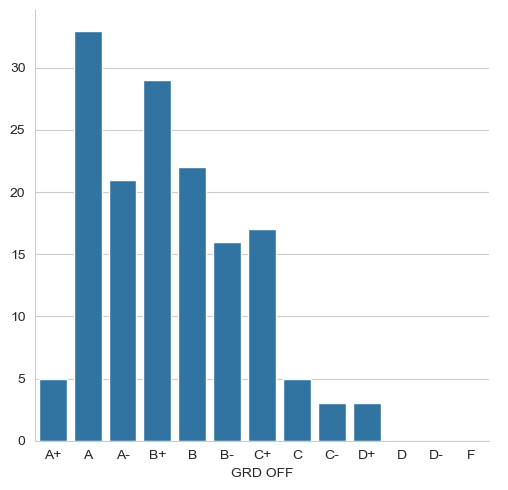

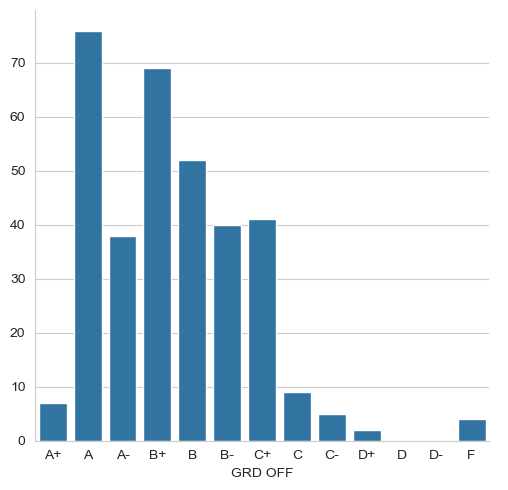

In [320]:
grade_counts_mp_b = mp_b.groupby('GRD OFF')['GRD COUNT'].sum()
grade_counts_mp_c = mp_c.groupby('GRD OFF')['GRD COUNT'].sum()
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
grade_counts_mp_b = grade_counts_mp_b.reindex(grade_order)
grade_counts_mp_c = grade_counts_mp_c.reindex(grade_order)
sns.catplot(kind = 'bar', x = grade_counts_mp_c.index, y = grade_counts_mp_c.values)
plt.show()
sns.catplot(kind = 'bar', x = grade_counts_mp_b.index, y = grade_counts_mp_b.values)
plt.show()


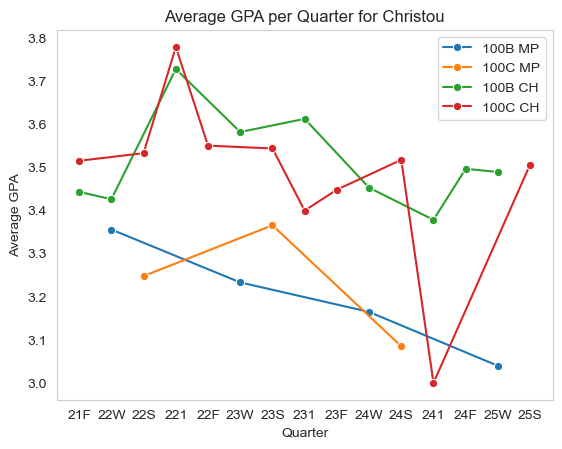

In [321]:
avg_mp_c = avg_mp_c.reindex(quarter_order)
avg_mp_b = avg_mp_b.reindex(quarter_order)
sns.lineplot(x=avg_mp_b.index, y=avg_mp_b.values, marker='o', label = '100B MP', sort = False)
sns.lineplot(x=avg_mp_c.index, y=avg_mp_c.values, marker='o', label = '100C MP', sort = False)
sns.lineplot(x=avg_christou_b.index, y=avg_christou_b.values, marker='o', label = '100B CH', sort = False)
sns.lineplot(x=avg_christou_c.index, y=avg_christou_c.values, marker='o', label = '100C CH', sort = False)

plt.xticks(quarter_order)
plt.xlabel("Quarter")
plt.ylabel("Average GPA")
plt.title("Average GPA per Quarter for Christou")
plt.grid()
plt.show()


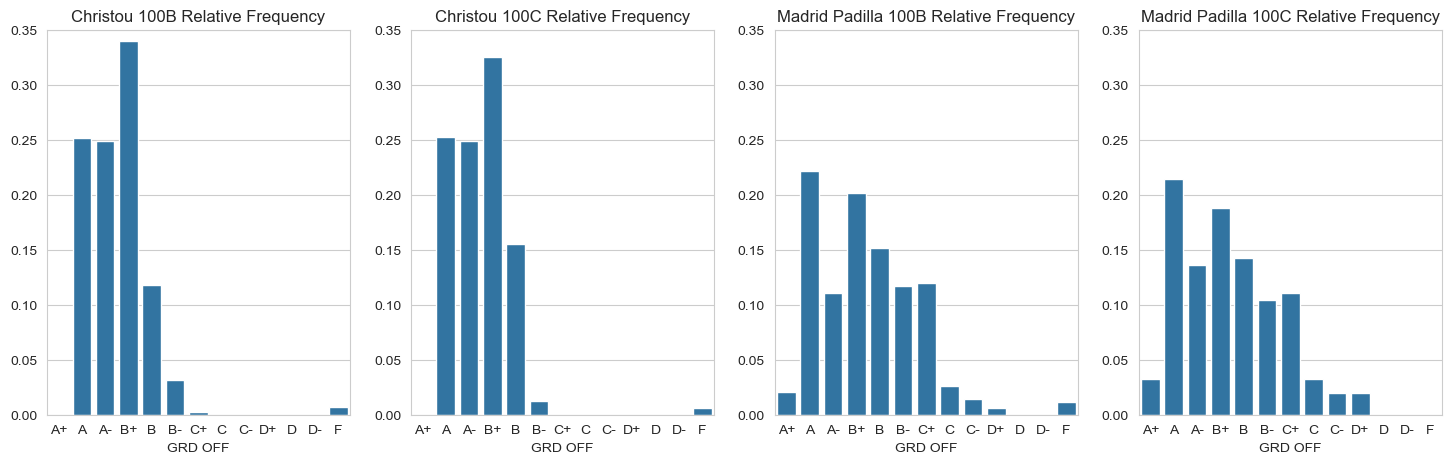

In [322]:
grade_counts_b = grade_counts_b.reindex(grade_order)
grade_counts_c = grade_counts_c.reindex(grade_order)

sns.set_style('whitegrid')

fig, ax2 = plt.subplots(1, 4, figsize = (18, 5))
rel_frq = grade_counts_b / grade_counts_b.sum()
sns.barplot(x = rel_frq.index, y = rel_frq.values, ax = ax2[0])
ax2[0].set_title("Christou 100B Relative Frequency")
ax2[0].set_ylim(0, 0.35)

rel_frq = grade_counts_c / grade_counts_c.sum()
sns.barplot(x = rel_frq.index, y = rel_frq.values, ax = ax2[1])
ax2[1].set_title("Christou 100C Relative Frequency")
ax2[1].set_ylim(0, 0.35)

rel_frq = grade_counts_mp_b / grade_counts_mp_b.sum()
sns.barplot(x = rel_frq.index, y = rel_frq.values, ax = ax2[2])
ax2[2].set_title("Madrid Padilla 100B Relative Frequency")
ax2[2].set_ylim(0, 0.35)

rel_frq = grade_counts_mp_c / grade_counts_mp_c.sum()
sns.barplot(x = rel_frq.index, y = rel_frq.values, ax = ax2[3])
ax2[3].set_title("Madrid Padilla 100C Relative Frequency")
ax2[3].set_ylim(0, 0.35)
plt.show()